In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import datetime

## Chennai Exploratory Data Analysis

In [2]:
chennai = pd.read_excel('C:/Users/ANSUMAN/Documents/AQI-Analysis-of-Indian-Cities-Using-Machine-Learning-main/AQI-Analysis-of-Indian-Cities-Using-Machine-Learning-main/Sitewise_original_data/Chennai.xlsx')    # reads the chennai file
chennai.head()

Date  PM2.5       PM10    NO2        NH3   SO2    CO  Ozone     AT  \
0 2019-05-31  25.06  65.682284  14.59  16.923567  6.47  1.59  70.14  33.94   
1 2019-06-01  20.22  65.682284  14.03  16.923567  5.07  1.01  59.48  34.88   
2 2019-06-02  19.05  65.682284  13.00  16.923567  5.03  0.83  70.92  35.21   
3 2019-06-03  63.53  65.682284  12.32  16.923567  5.47  2.60  48.43  33.16   
4 2019-06-04  65.08  65.682284  13.09  16.923567  3.87  1.46  59.14  33.65   

         AQI AQI_Standard  
0  24.316667         Good  
1  23.383333         Good  
2  21.666667         Good  
3  20.533333         Good  
4  21.816667         Good

In [3]:
chennai.describe()

Date        PM2.5         PM10          NO2  \
count                           1637  1637.000000  1637.000000  1637.000000   
mean   2021-08-26 00:00:00.000000256    36.644650    65.682284    23.808285   
min              2019-05-31 00:00:00     0.880000     1.970000     0.020000   
25%              2020-07-13 00:00:00    21.250000    52.970000    10.150000   
50%              2021-08-26 00:00:00    32.540000    65.682284    14.620000   
75%              2022-10-09 00:00:00    43.840000    65.682284    26.470000   
max              2023-11-22 00:00:00   353.200000   316.410000   223.420000   
std                              NaN    25.002149    27.468351    23.784078   

               NH3          SO2           CO        Ozone           AT  \
count  1637.000000  1637.000000  1637.000000  1637.000000  1637.000000   
mean     17.357770    11.305163     1.025856    23.542456    28.861737   
min       0.720000     0.010000     0.130000     0.210000    19.040000   
25%      14.820000     3.800000     0.680000    11.390000    26.920000   
50%      16.923567     6.740000     0.790000    18.040000    28.841004   
75%      16.923567    15.470000     1.230000    29.720000    30.540000   
max     152.250000   127.870000     5.290000   182.940000    38.750000   
std       8.934488    11.582896     0.680378    19.794513     2.679697   

               AQI  
count  1637.000000  
mean     43.253977  
min       0.033333  
25%      16.916667  
50%      24.366667  
75%      44.116667  
max     379.553846  
std      51.130492

In [4]:
print("Total number of days recorded at the chennai recording station is -",str(len(chennai)),
      "\nThe chennai record starts from ",str(chennai.iloc[0]['Date']),' ends on ',str(chennai.iloc[-1]['Date']),'.',
      "\nThe pollutants that we are dealing with, in  the dataset are:-")
for i in chennai.drop('Date', axis=1).drop('AT', axis=1).drop('AQI', axis=1).drop('AQI_Standard', axis=1).columns.values:
    print(i,end=" ")

Total number of days recorded at the chennai recording station is - 1637 
The chennai record starts from  2019-05-31 00:00:00  ends on  2023-11-22 00:00:00 . 
The pollutants that we are dealing with, in  the dataset are:-
PM2.5 PM10 NO2 NH3 SO2 CO Ozone 

In [5]:
# Here we separate the data month wise
chennai_jan = pd.DataFrame(columns=chennai.columns)
chennai_feb = pd.DataFrame(columns=chennai.columns)
chennai_mar = pd.DataFrame(columns=chennai.columns)
chennai_apr = pd.DataFrame(columns=chennai.columns)
chennai_may = pd.DataFrame(columns=chennai.columns)
chennai_jun = pd.DataFrame(columns=chennai.columns)
chennai_jul = pd.DataFrame(columns=chennai.columns)
chennai_aug = pd.DataFrame(columns=chennai.columns)
chennai_sep = pd.DataFrame(columns=chennai.columns)
chennai_oct = pd.DataFrame(columns=chennai.columns)
chennai_nov = pd.DataFrame(columns=chennai.columns)
chennai_dec = pd.DataFrame(columns=chennai.columns)
for d in chennai["Date"]:
    rows=chennai.loc[chennai["Date"] == d]
    if d.strftime('%m') == "01":
        chennai_jan = pd.concat([chennai_jan,rows],ignore_index=True)
    elif d.strftime('%m') == "02":
        chennai_feb = pd.concat([chennai_feb,rows],ignore_index=True)
    elif d.strftime('%m') == "03":
        chennai_mar = pd.concat([chennai_mar,rows],ignore_index=True)
    elif d.strftime('%m') == "04":
        chennai_apr = pd.concat([chennai_apr,rows],ignore_index=True)
    elif d.strftime('%m') == "05":
        chennai_may = pd.concat([chennai_may,rows],ignore_index=True)
    elif d.strftime('%m') == "06":
        chennai_jun = pd.concat([chennai_jun,rows],ignore_index=True)
    elif d.strftime('%m') == "07":
        chennai_jul = pd.concat([chennai_jul,rows],ignore_index=True)
    elif d.strftime('%m') == "08":
        chennai_aug = pd.concat([chennai_aug,rows],ignore_index=True)
    elif d.strftime('%m') == "09":
        chennai_sep = pd.concat([chennai_sep,rows],ignore_index=True)
    elif d.strftime('%m') == "10":
        chennai_oct = pd.concat([chennai_oct,rows],ignore_index=True)
    elif d.strftime('%m') == "11":
        chennai_nov = pd.concat([chennai_nov,rows],ignore_index=True)
    elif d.strftime('%m') == "12":
        chennai_dec = pd.concat([chennai_dec,rows],ignore_index=True)

C:\Users\ANSUMAN\AppData\Local\Temp\ipykernel_8152\3962865667.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  chennai_may = pd.concat([chennai_may,rows],ignore_index=True)
C:\Users\ANSUMAN\AppData\Local\Temp\ipykernel_8152\3962865667.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  chennai_jun = pd.concat([chennai_jun,rows],ignore_index=True)
C:\Users\ANSUMAN\AppData\Local\Temp\ipykernel_8152\3962865667.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA e

In [6]:
chennai['Date'] = pd.to_datetime(chennai['Date'], format="%Y-%m-%d") # converts the date values to proper date format from string for plotting purposes
# Here we separate the data by year
chennai_2019 = pd.DataFrame(columns=chennai.columns)
chennai_2020 = pd.DataFrame(columns=chennai.columns)
chennai_2021 = pd.DataFrame(columns=chennai.columns)
chennai_2022 = pd.DataFrame(columns=chennai.columns)
for d in chennai["Date"]:
    rows=chennai.loc[chennai["Date"] == d]
    if d <= datetime.datetime.strptime("31/12/2019", "%d/%m/%Y"):
        chennai_2019 = pd.concat([chennai_2019,rows],ignore_index=True)
    elif d >= datetime.datetime.strptime("01/01/2020", "%d/%m/%Y") and d <= datetime.datetime.strptime("31/12/2020", "%d/%m/%Y"):
        chennai_2020 = pd.concat([chennai_2020,rows],ignore_index=True)
    elif d >= datetime.datetime.strptime("01/01/2021", "%d/%m/%Y") and d <= datetime.datetime.strptime("31/12/2021", "%d/%m/%Y"):
        chennai_2021 = pd.concat([chennai_2021,rows],ignore_index=True)
    elif d >= datetime.datetime.strptime("01/01/2022", "%d/%m/%Y") and d <= datetime.datetime.strptime("31/12/2022", "%d/%m/%Y"):
        chennai_2022 = pd.concat([chennai_2022,rows],ignore_index=True)

C:\Users\ANSUMAN\AppData\Local\Temp\ipykernel_8152\3415170936.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  chennai_2019 = pd.concat([chennai_2019,rows],ignore_index=True)
C:\Users\ANSUMAN\AppData\Local\Temp\ipykernel_8152\3415170936.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  chennai_2020 = pd.concat([chennai_2020,rows],ignore_index=True)
C:\Users\ANSUMAN\AppData\Local\Temp\ipykernel_8152\3415170936.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-

In [7]:
##1. PM2.5 Sub-Index calculation
def PM25(x):
    x = float(x)
    
    if x <= 30:
        return round(x * 50 / 30,2)
    elif x <= 60:
        return round(50 + (x - 30) * 50 / 30,2)
    elif x <= 90:
        return round(100 + (x - 60) * 100 / 30,2)
    elif x <= 120:
        return round(200 + (x - 90) * 100 / 30,2)
    elif x <= 250:
        return round(300 + (x - 120) * 100 / 130,2)
    elif x > 250:
        return round(400 + (x - 250) * 100 / 130,2)

##2. PM10 Sub-Index calculation
def PM10(x):
    x = float(x)
    
    if x <= 50:
        return round(x,2)
    elif x <= 100:
        return round(x,2)
    elif x <= 250:
        return round(100 + (x - 100) * 100 / 150,2)
    elif x <= 350:
        return round(200 + (x - 250),2)
    elif x <= 430:
        return round(300 + (x - 350) * 100 / 80,2)
    elif x > 430:
        return round(400 + (x - 430) * 100 / 80,2)

##3. NO2 Sub-Index calculation
def NO2(x):
    x = float(x)
    
    if x <= 40:
        return round(x * 50 / 40,2)
    elif x <= 80:
        return round(50 + (x - 40) * 50 / 40,2)
    elif x <= 180:
        return round(100 + (x - 80) * 100 / 100,2)
    elif x <= 280:
        return round(200 + (x - 180) * 100 / 100,2)
    elif x <= 400:
        return round(300 + (x - 280) * 100 / 120,2)
    elif x > 400:
        return round(400 + (x - 400) * 100 / 120,2)


##4. NH3 Sub-Index calculation
def NH3(x):
    x = float(x)
    
    if x <= 200:
        return round(x * 50 / 200,2)
    elif x <= 400:
        return round(50 + (x - 200) * 50 / 200,2)
    elif x <= 800:
        return round(100 + (x - 400) * 100 / 400,2)
    elif x <= 1200:
        return round(200 + (x - 800) * 100 / 400,2)
    elif x <= 1800:
        return round(300 + (x - 1200) * 100 / 600,2)
    elif x > 1800:
        return round(400 + (x - 1800) * 100 / 600,2)

##5. SO2 Sub-Index calculation
def SO2(x):
    x = float(x)
    
    if x <= 40:
        return round(x * 50 / 40,2)
    elif x <= 80:
        return round(50 + (x - 40) * 50 / 40,2)
    elif x <= 380:
        return round(100 + (x - 80) * 100 / 300,2)
    elif x <= 800:
        return round(200 + (x - 380) * 100 / 420,2)
    elif x <= 1600:
        return round(300 + (x - 800) * 100 / 800,2)
    elif x > 1600:
        return round(400 + (x - 1600) * 100 / 800,2)

##6. CO Sub-Index calculation
def CO(x):
    x = float(x)
    
    if x <= 1:
        return round(x * 50 / 1,2)
    elif x <= 2:
        return round(50 + (x - 1) * 50 / 1,2)
    elif x <= 10:
        return round(100 + (x - 2) * 100 / 8,2)
    elif x <= 17:
        return round(200 + (x - 10) * 100 / 7,2)
    elif x <= 34:
        return round(300 + (x - 17) * 100 / 17,2)
    elif x > 34:
        return round(400 + (x - 34) * 100 / 17,2)

##7. O3 Sub-Index calculation
def Ozone(x):
    x = float(x)
    
    if x <= 50:
        return round(x * 50 / 50,2)
    elif x <= 100:
        return round(50 + (x - 50) * 50 / 50,2)
    elif x <= 168:
        return round(100 + (x - 100) * 100 / 68,2)
    elif x <= 208:
        return round(200 + (x - 168) * 100 / 40,2)
    elif x <= 748:
        return round(300 + (x - 208) * 100 / 539,2)
    elif x > 748:
        return round(400 + (x - 400) * 100 / 539,2)

In [8]:
def aqi(final):
    if final >=0 and final<=50:
        return("Good")
    elif final>50 and final<=100:
        return("Satisfactory")
    elif final>100 and final<= 200:
        return("Moderately Polluted")
    elif final>200 and final<=300:
        return("Poor")
    elif final>300 and final<=400:
        return("Very poor")
    elif final>400:
        return("Severe")

### Complete AQI insight

In [9]:
chennai['Date'] = pd.to_datetime(chennai['Date'], format="%Y-%m-%d") # converts the date values to proper date format from string for plotting purposes
print ("When we look at the entire "+str(len(chennai))+" days time period :-"+
       "\nThe highest value of AQI was ",chennai["AQI"].max(),
       " recorded on", str(chennai["Date"].loc[chennai['AQI'].idxmax()])[:10],
       ' and the lowest value was ',chennai["AQI"].min(), 
       " recorded on",str(chennai["Date"].loc[chennai['AQI'].idxmin()])[:10],'.'+
       "\nThe Average AQI value between "+str(chennai.iloc[0]['Date'])[:10]+" and "+
      str(chennai.iloc[-1]['Date'])[:10]+" time period is "+str(round(chennai["AQI"].mean(),2))+
      " which lies in the "+aqi(chennai["AQI"].mean())+" range."+
      "\nThe Median AQI value is "+str(round(chennai["AQI"].median(),2))+
      "\nThe AQI value has a standard deviation of "+str(round(chennai["AQI"].std(),2)))

When we look at the entire 1637 days time period :-
The highest value of AQI was  379.55384615384617  recorded on 2023-05-19  and the lowest value was  0.03333333333333333  recorded on 2021-07-09 .
The Average AQI value between 2019-05-31 and 2023-11-22 time period is 43.25 which lies in the Good range.
The Median AQI value is 24.37
The AQI value has a standard deviation of 51.13


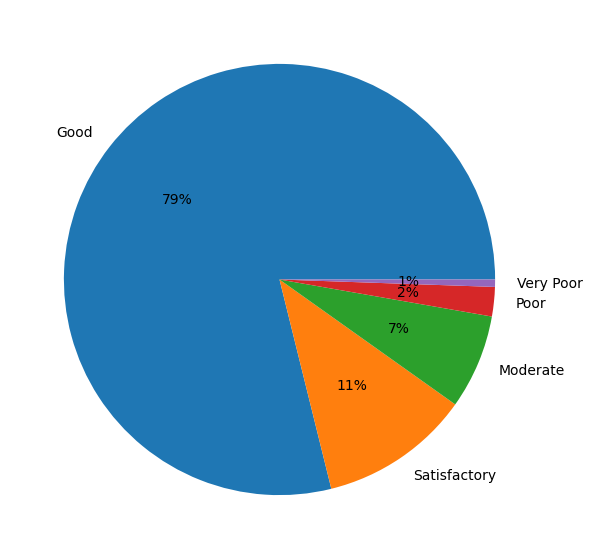

In [10]:
m = chennai['AQI_Standard'].value_counts()
stand =chennai['AQI_Standard'].unique()
count = []
for i in stand:
    count.append(m[i])

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(count, labels = stand,autopct='%1.0f%%')
plt.show()

[]

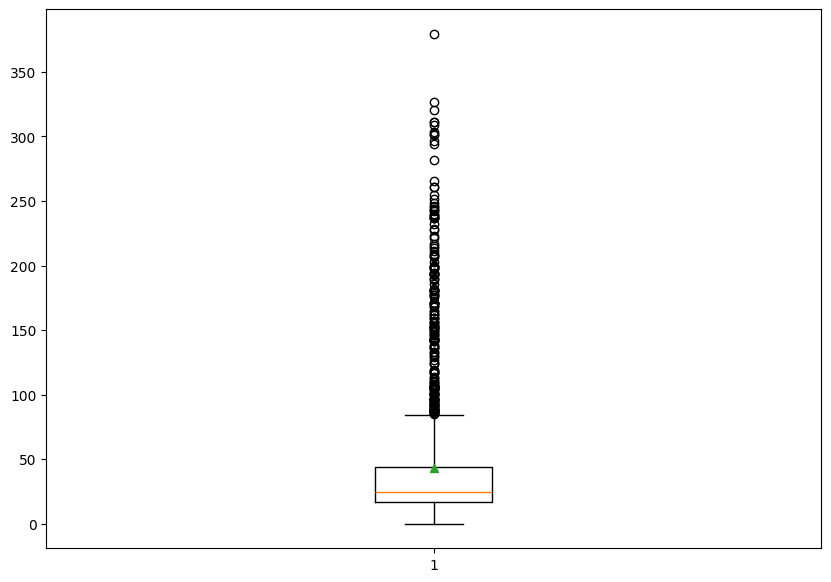

In [11]:
plt.figure(figsize =(10, 7))
plt.boxplot(chennai["AQI"],showmeans=True)
plt.plot()

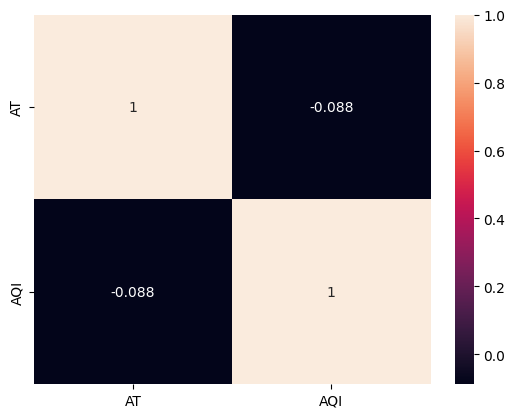

In [12]:
dataplot = sb.heatmap(chennai[['AT','AQI']].corr(), annot=True)
plt.show()

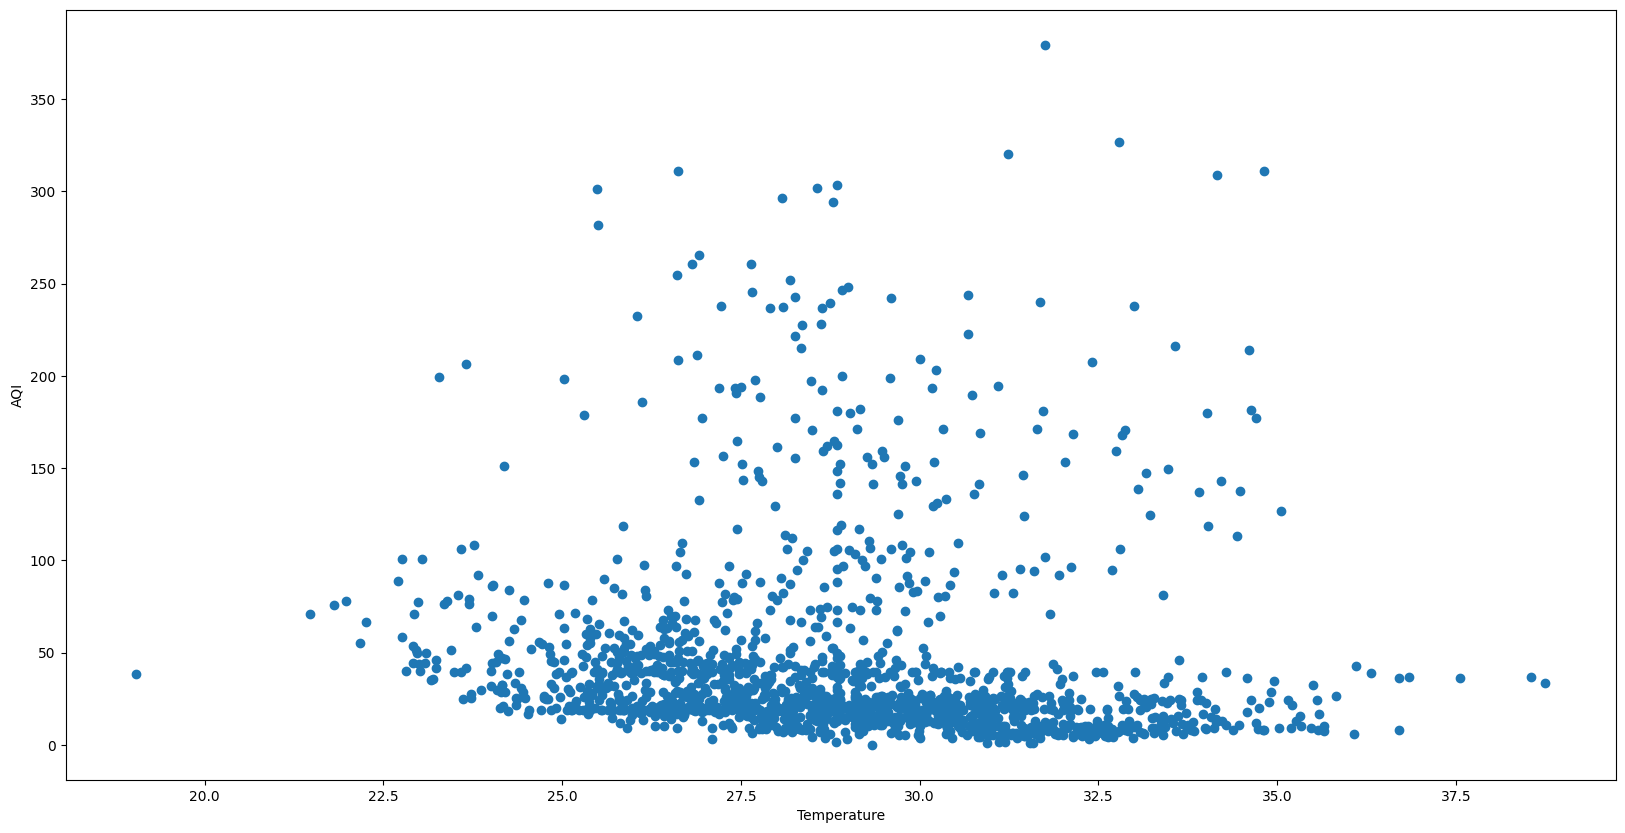

In [13]:
plt.figure(figsize=(20,10))
plt.scatter(x=chennai["AT"],y=chennai['AQI'])
plt.xlabel("Temperature")
plt.ylabel("AQI")
plt.show()

AQI_Standard
Good            1291
Satisfactory     185
Moderate         116
Poor              36
Very Poor          9
Name: count, dtype: int64


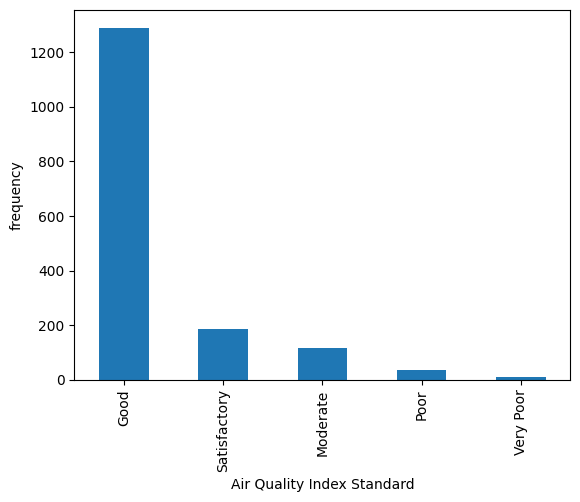

In [14]:
print(chennai['AQI_Standard'].value_counts())
chennai['AQI_Standard'].value_counts().plot(kind='bar', xlabel='Air Quality Index Standard', ylabel='frequency')
plt.show()

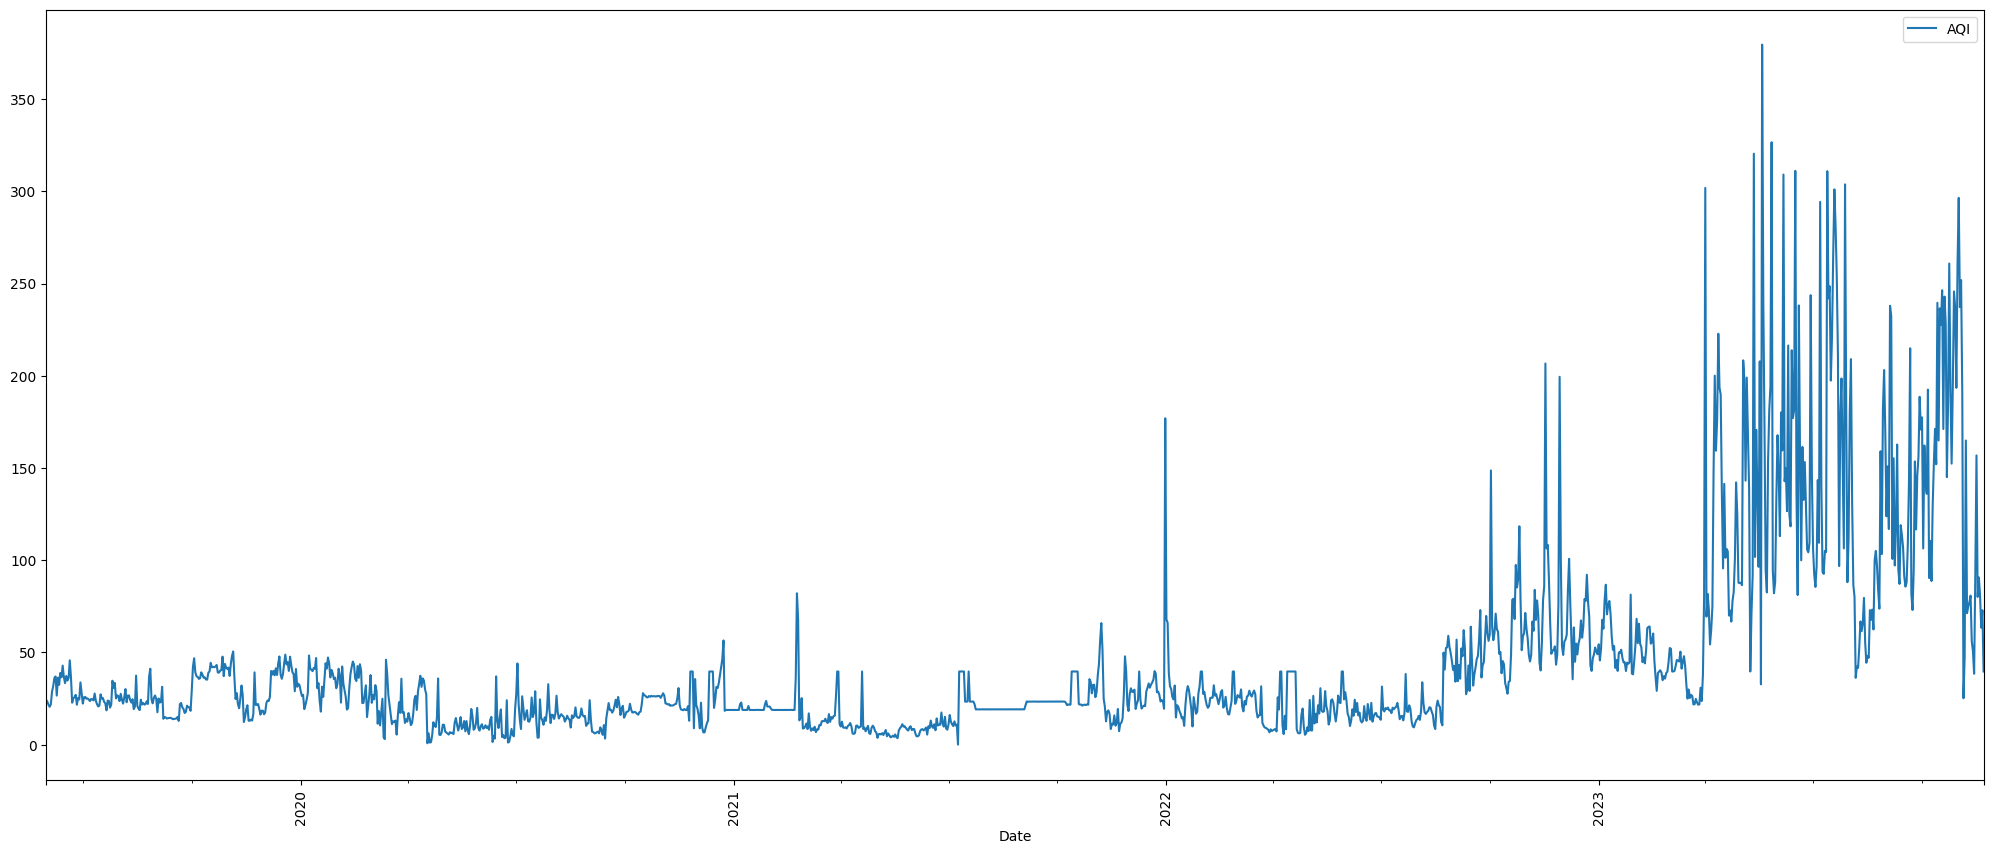

In [15]:
chennai['Date'] = pd.to_datetime(chennai['Date'], format="%Y-%m-%d") # converts the date values to proper date format from string for plotting purposes
a = chennai.plot(x='Date',y='AQI',figsize=(25, 10))
plt.xticks(rotation='vertical')
plt.show()

### Year-wise AQI data insight

##### AQI 2019

In [16]:
print("######################## chennai_2019 ########################")
print ("When we look at the entire "+str(len(chennai_2019))+" days time period :-"+
       "\nThe highest value of AQI was ",chennai_2019["AQI"].max(),
       " recorded on", str(chennai_2019["Date"].loc[chennai_2019["AQI"] == chennai_2019["AQI"].max()])[4:15],
       '\nand the lowest value was ',chennai_2019["AQI"].min(), 
       " recorded on",str(chennai_2019["Date"].loc[chennai_2019["AQI"] == chennai_2019["AQI"].min()])[4:15],
       "\nThe Average AQI value between "+str(chennai_2019.iloc[0]['Date'])[:10]+" and "+
      str(chennai_2019.iloc[-1]['Date'])[:10]+" time period is "+str(round(chennai_2019["AQI"].mean(),2))+
      " which lies in the "+aqi(chennai_2019["AQI"].mean())+" range"+
      "\nThe AQI value has a standard deviation of "+str(round(chennai_2019["AQI"].std(),2)))

######################## chennai_2019 ########################
When we look at the entire 215 days time period :-
The highest value of AQI was  50.516666666666666  recorded on   2019-11-0 
and the lowest value was  12.266666666666667  recorded on   2019-11-1 
The Average AQI value between 2019-05-31 and 2019-12-31 time period is 28.57 which lies in the Good range
The AQI value has a standard deviation of 9.61


AQI_Standard
Good            214
Satisfactory      1
Name: count, dtype: int64


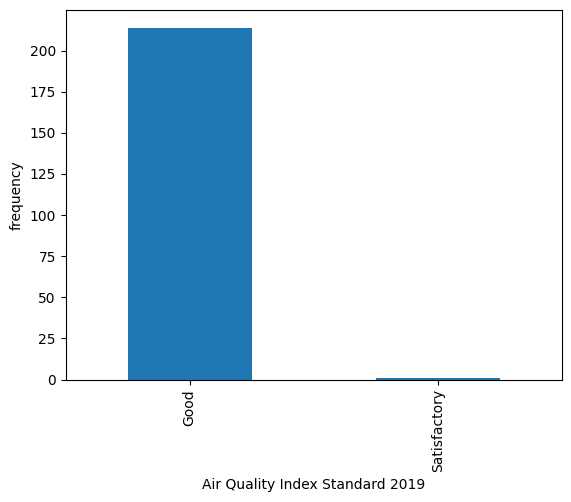

In [17]:
print(chennai_2019['AQI_Standard'].value_counts())
chennai_2019['AQI_Standard'].value_counts().plot(kind='bar', xlabel='Air Quality Index Standard 2019', ylabel='frequency')
plt.show()

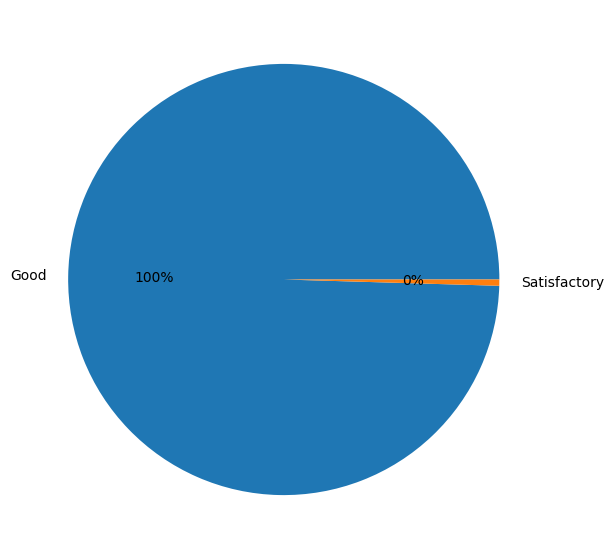

In [18]:
m = chennai_2019['AQI_Standard'].value_counts()
stand =chennai_2019['AQI_Standard'].unique()
count = []
for i in stand:
    count.append(m[i])

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(count, labels = stand,autopct='%1.0f%%')
plt.show()

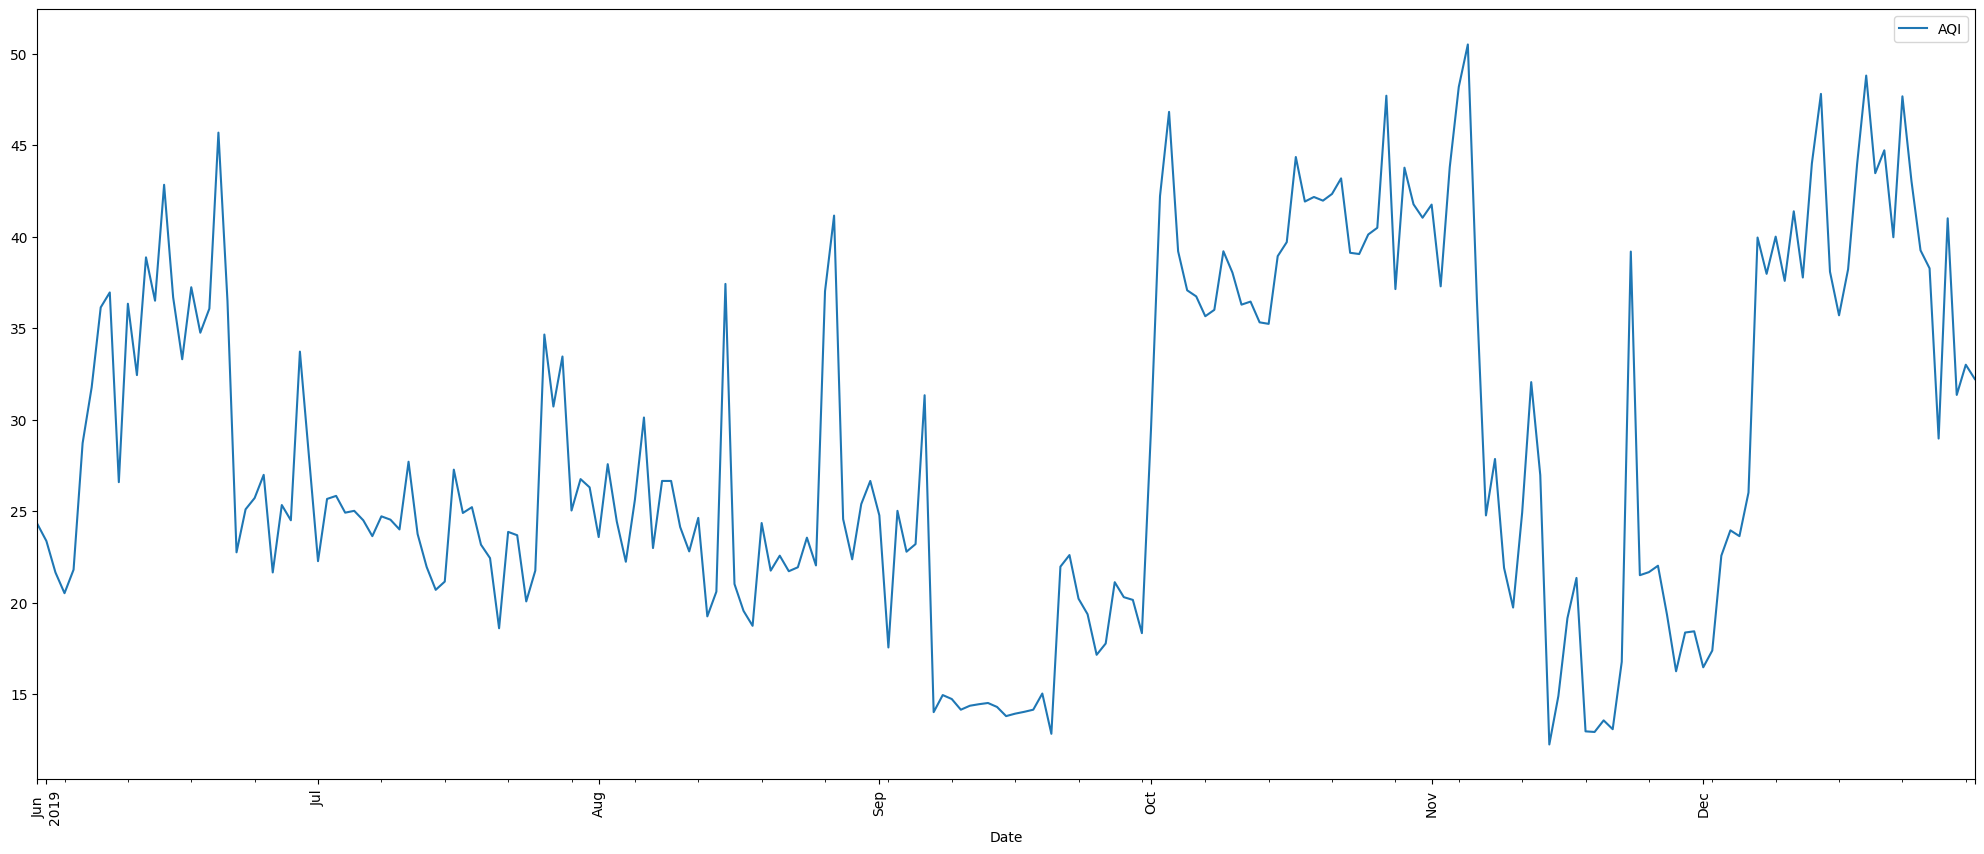

In [19]:
a = chennai_2019.plot(x='Date',y='AQI',figsize=(25, 10))
plt.xticks(rotation='vertical')
plt.show()

#### AQI 2020

In [20]:
print("######################## chennai_2020 ########################")
print ("When we look at the entire "+str(len(chennai_2020))+" days time period :-"+
       "\nThe highest value of AQI was ",chennai_2020["AQI"].max(),
       " recorded on", str(chennai_2020["Date"].loc[chennai_2020["AQI"] == chennai_2020["AQI"].max()])[4:15],
       ' and the lowest value was ',chennai_2020["AQI"].min(), 
       " recorded on",str(chennai_2020["Date"].loc[chennai_2020["AQI"] == chennai_2020["AQI"].min()])[4:15],'.'+
       "\nThe Average AQI value between "+str(chennai_2020.iloc[0]['Date'])[:10]+" and "+
      str(chennai_2020.iloc[-1]['Date'])[:10]+" time period is "+str(round(chennai_2020["AQI"].mean(),2))+
      " which lies in the "+aqi(chennai_2020["AQI"].mean())+" range."+
      "\nThe AQI value has a standard deviation of "+str(round(chennai_2020["AQI"].std(),2)))

######################## chennai_2020 ########################
When we look at the entire 366 days time period :-
The highest value of AQI was  56.5  recorded on   2020-12-2  and the lowest value was  0.75  recorded on   2020-04-1 .
The Average AQI value between 2020-01-01 and 2020-12-31 time period is 20.04 which lies in the Good range.
The AQI value has a standard deviation of 11.11


AQI_Standard
Good            365
Satisfactory      1
Name: count, dtype: int64


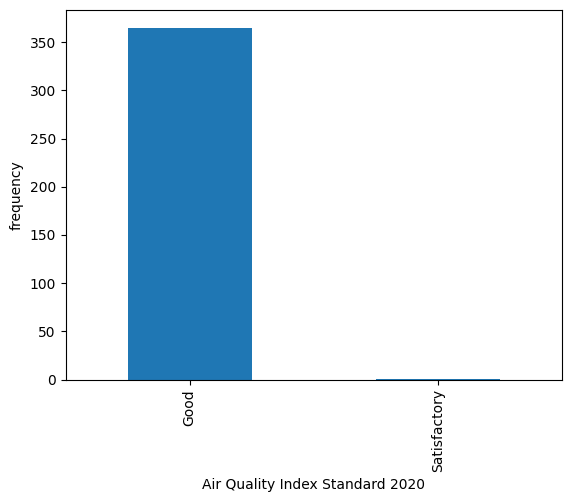

In [21]:
print(chennai_2020['AQI_Standard'].value_counts())
chennai_2020['AQI_Standard'].value_counts().plot(kind='bar', xlabel='Air Quality Index Standard 2020', ylabel='frequency')
plt.show()

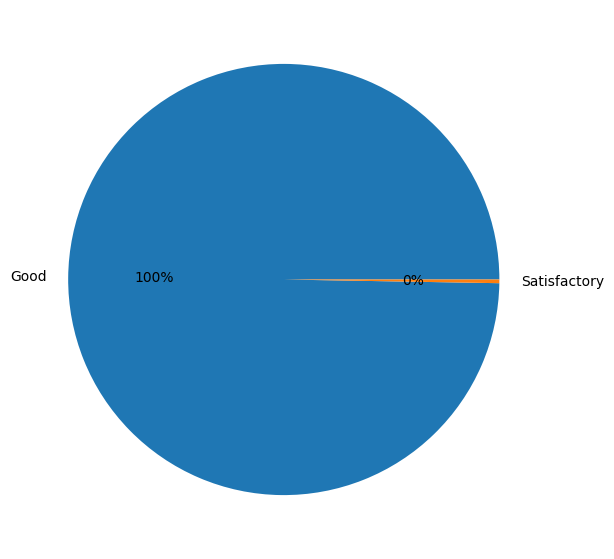

In [22]:
m = chennai_2020['AQI_Standard'].value_counts()
stand =chennai_2020['AQI_Standard'].unique()
count = []
for i in stand:
    count.append(m[i])

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(count, labels = stand,autopct='%1.0f%%')
plt.show()

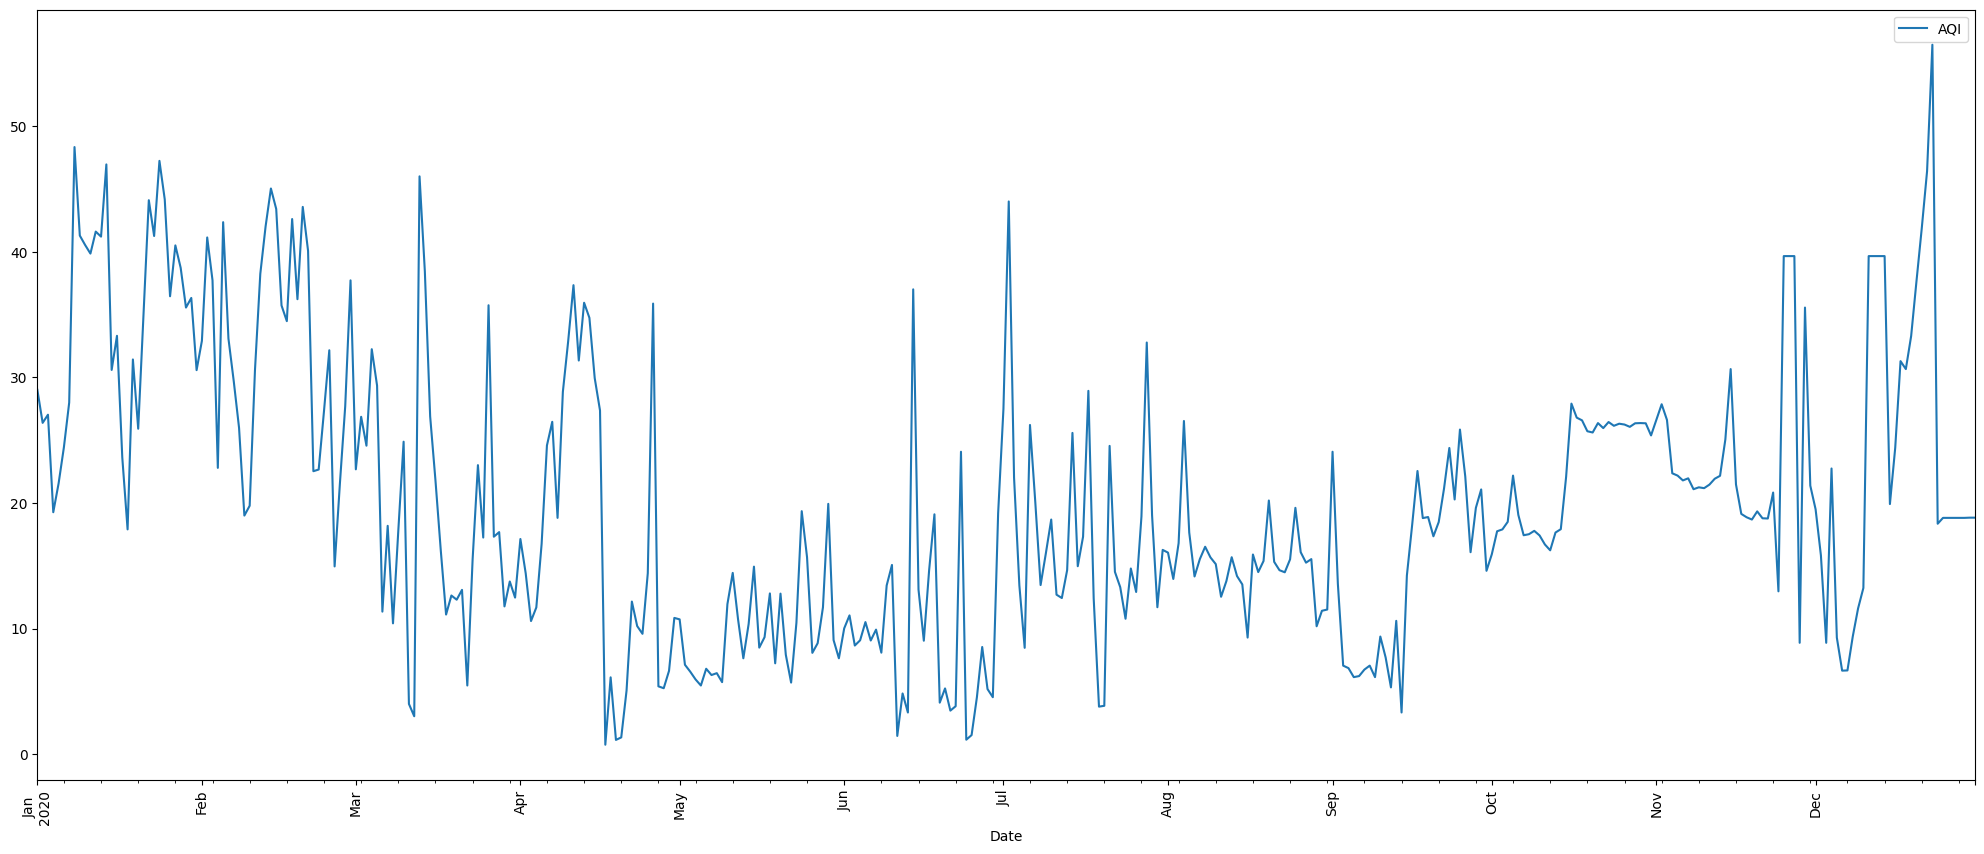

In [23]:
a = chennai_2020.plot(x='Date',y='AQI',figsize=(25, 10))
plt.xticks(rotation='vertical')
plt.show()

#### AQI 2021

In [24]:
print("######################## chennai_2021 ########################")
print ("When we look at the entire "+str(len(chennai_2021))+" days time period :-"+
       "\nThe highest value of AQI was ",chennai_2021["AQI"].max(),
       " recorded on", str(chennai_2021["Date"].loc[chennai_2021["AQI"] == chennai_2021["AQI"].max()])[4:15],
       'and the lowest value was ',chennai_2021["AQI"].min(), 
       " recorded on",str(chennai_2021["Date"].loc[chennai_2021["AQI"] == chennai_2021["AQI"].min()])[4:15],'.'+
       "\nThe Average AQI value between "+str(chennai_2021.iloc[0]['Date'])[:10]+" and "+
      str(chennai_2021.iloc[-1]['Date'])[:10]+" time period is "+str(round(chennai_2021["AQI"].mean(),2))+
      " which lies in the "+aqi(chennai_2021["AQI"].mean())+" range."+
      "\nThe AQI value has a standard deviation of "+str(round(chennai_2021["AQI"].std(),2)))

######################## chennai_2021 ########################
When we look at the entire 365 days time period :-
The highest value of AQI was  176.96666666666667  recorded on   2021-12-3 and the lowest value was  0.03333333333333333  recorded on   2021-07-0 .
The Average AQI value between 2021-01-01 and 2021-12-31 time period is 19.18 which lies in the Good range.
The AQI value has a standard deviation of 13.35


AQI_Standard
Good            359
Satisfactory      5
Moderate          1
Name: count, dtype: int64


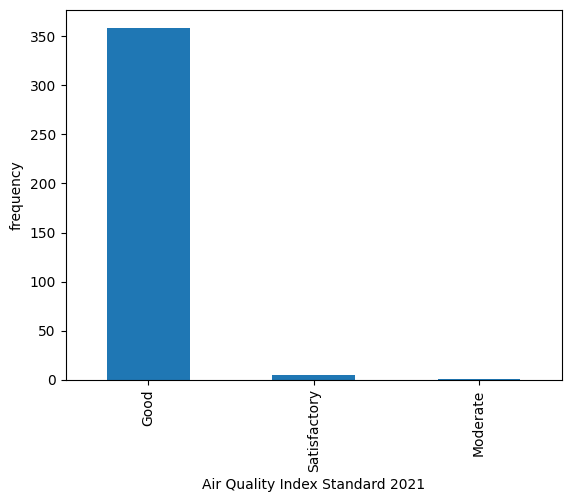

In [25]:
print(chennai_2021['AQI_Standard'].value_counts())
chennai_2021['AQI_Standard'].value_counts().plot(kind='bar', xlabel='Air Quality Index Standard 2021', ylabel='frequency')
plt.show()

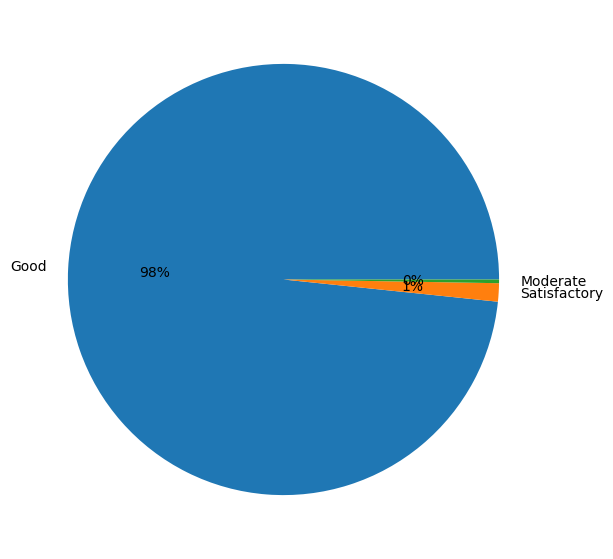

In [26]:
m = chennai_2021['AQI_Standard'].value_counts()
stand =chennai_2021['AQI_Standard'].unique()
count = []
for i in stand:
    count.append(m[i])

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(count, labels = stand,autopct='%1.0f%%')
plt.show()

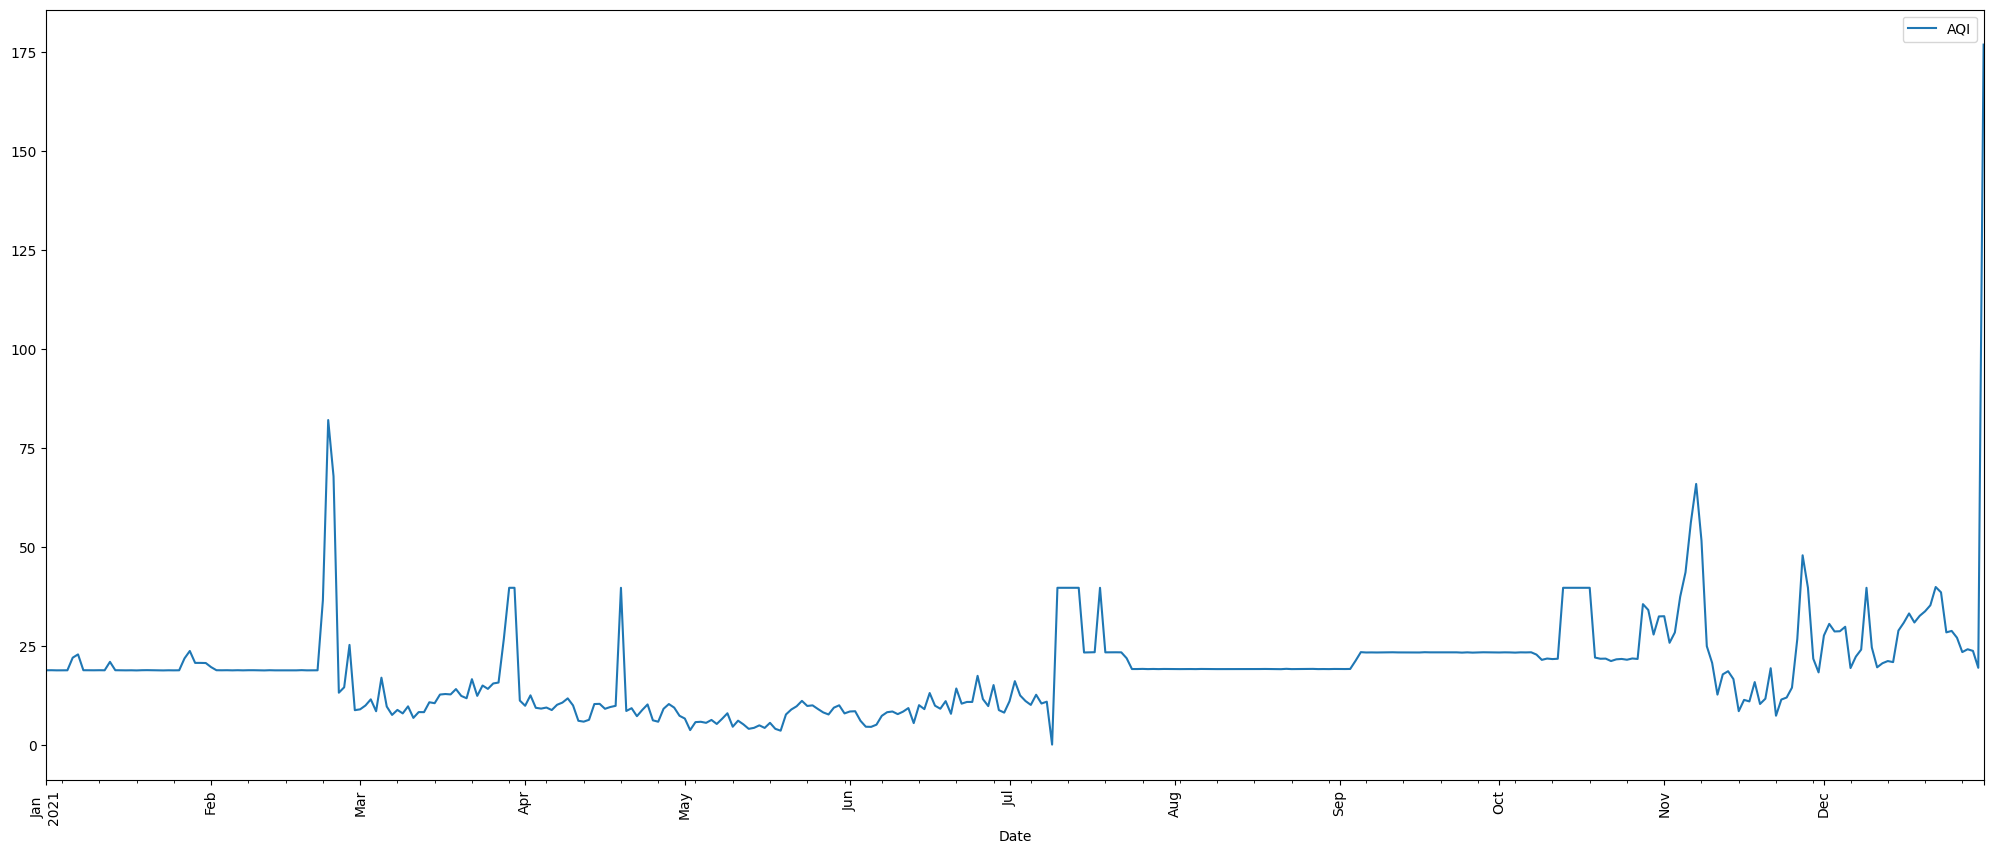

In [27]:
a = chennai_2021.plot(x='Date',y='AQI',figsize=(25, 10))
plt.xticks(rotation='vertical')
plt.show()

#### AQI 2022

In [28]:
print("######################## chennai_2022 ########################")
print ("When we look at the entire "+str(len(chennai_2022))+" days time period :-"+
       "\nThe highest value of AQI was ",chennai_2022["AQI"].max(),
       " recorded on", str(chennai_2022["Date"].loc[chennai_2022["AQI"] == chennai_2022["AQI"].max()])[4:15],
       ' and the lowest value was ',chennai_2022["AQI"].min(), 
       " recorded on",str(chennai_2022["Date"].loc[chennai_2022["AQI"] == chennai_2022["AQI"].min()])[4:15],'.'+
       "\nThe Average AQI value between "+str(chennai_2022.iloc[0]['Date'])[:10]+" and "+
      str(chennai_2022.iloc[-1]['Date'])[:10]+" time period is "+str(round(chennai_2022["AQI"].mean(),2))+
      " which lies in the "+aqi(chennai_2022["AQI"].mean())+" range."+
      "\nThe AQI value has a standard deviation of "+str(round(chennai_2022["AQI"].std(),2)))

######################## chennai_2022 ########################
When we look at the entire 365 days time period :-
The highest value of AQI was  206.63333333333333  recorded on   2022-11-1  and the lowest value was  5.35  recorded on   2022-04-2 .
The Average AQI value between 2022-01-01 and 2022-12-31 time period is 34.95 which lies in the Good range.
The AQI value has a standard deviation of 25.96


AQI_Standard
Good            283
Satisfactory     74
Moderate          7
Poor              1
Name: count, dtype: int64


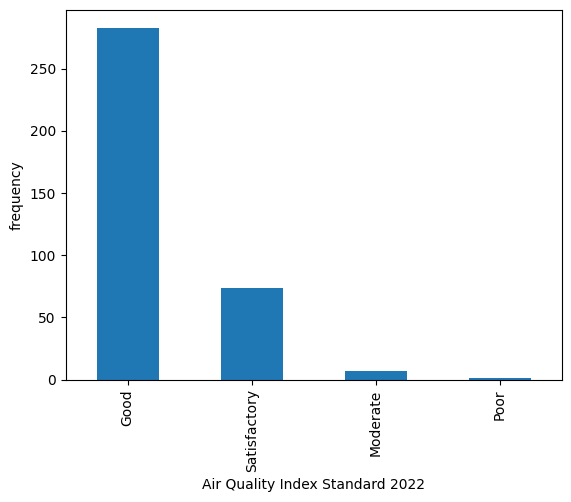

In [29]:
print(chennai_2022['AQI_Standard'].value_counts())
chennai_2022['AQI_Standard'].value_counts().plot(kind='bar', xlabel='Air Quality Index Standard 2022', ylabel='frequency')
plt.show()

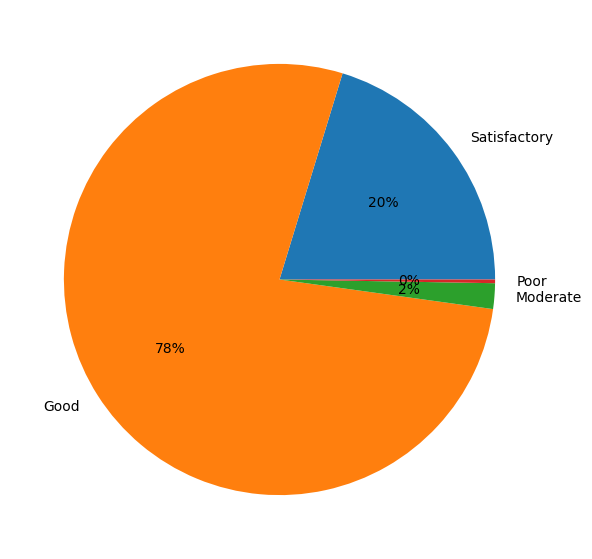

In [30]:
m = chennai_2022['AQI_Standard'].value_counts()
stand =chennai_2022['AQI_Standard'].unique()
count = []
for i in stand:
    count.append(m[i])

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(count, labels = stand,autopct='%1.0f%%')
plt.show()

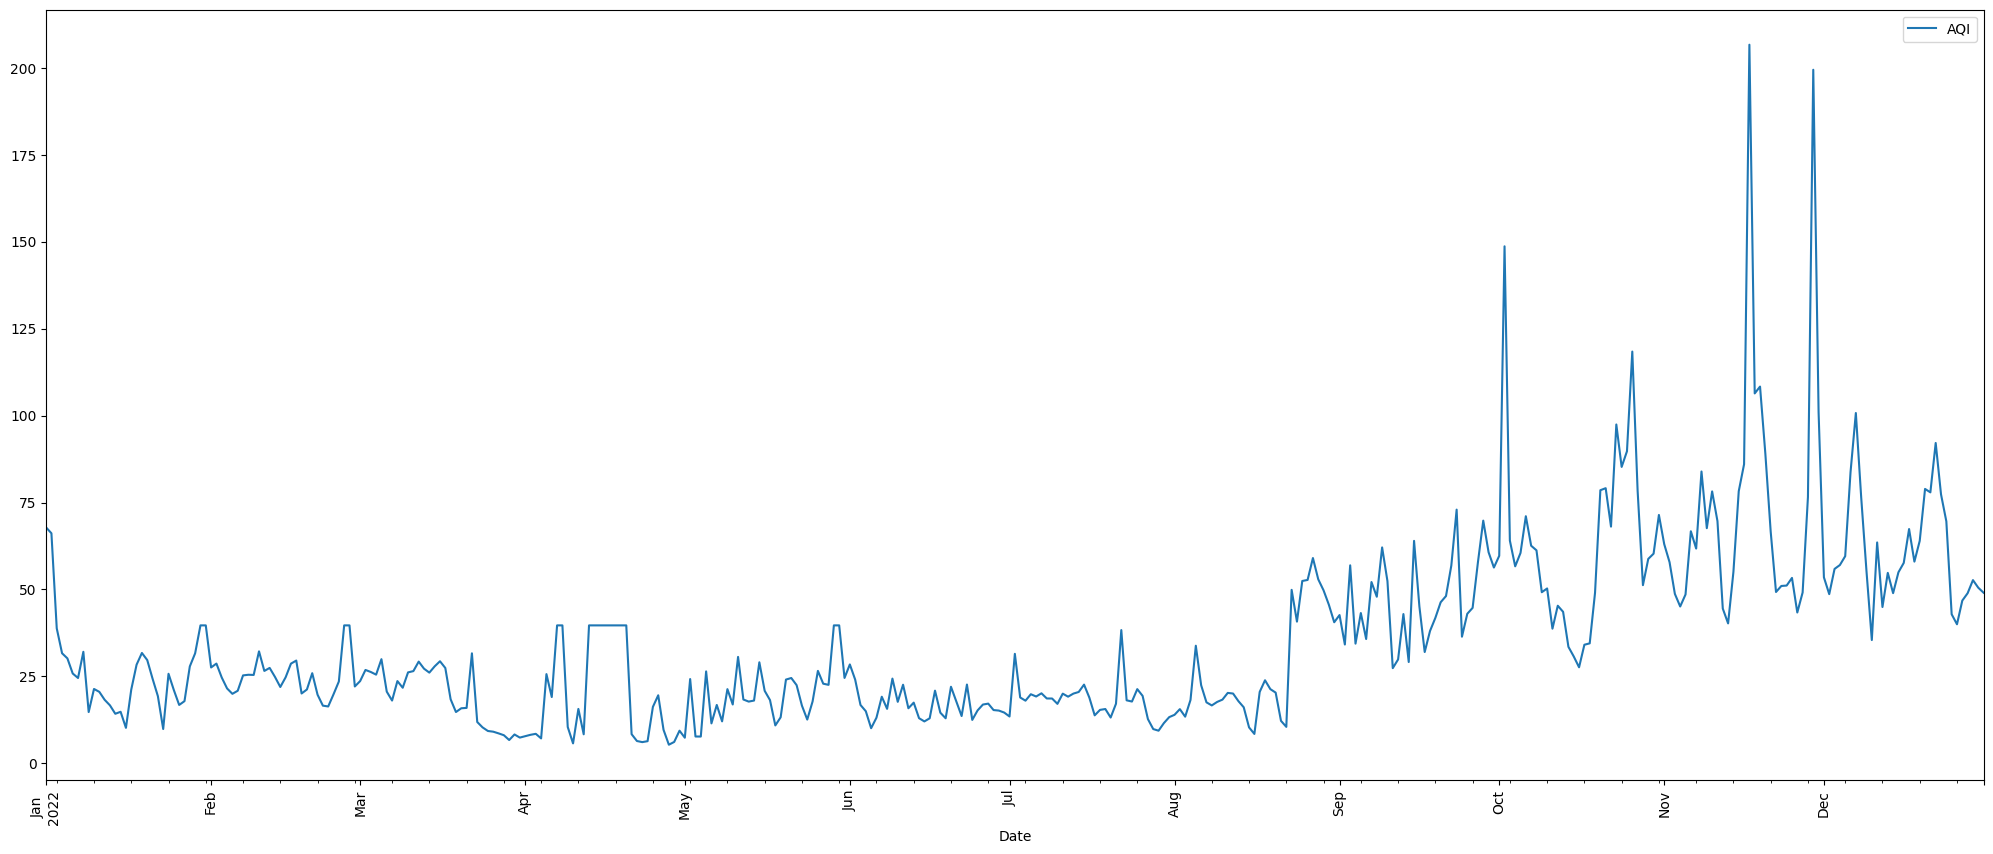

In [31]:
a = chennai_2022.plot(x='Date',y='AQI',figsize=(25, 10))
plt.xticks(rotation='vertical')
plt.show()

### Month by Month AQI Standard Analysis.

##### January

In the January Months:-
Total number of days : 124
Good : 107 days
Satisfactory : 17 days


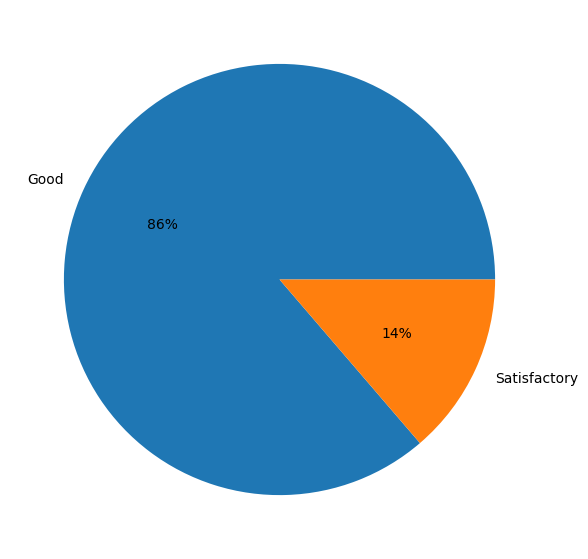

In [32]:
m = chennai_jan['AQI_Standard'].value_counts()
stand =chennai_jan['AQI_Standard'].unique()
count = []
print("In the January Months:-\nTotal number of days : "+str(len(chennai_jan)))
for i in stand:
    count.append(m[i])
    print(str(i) +" : "+str(m[i])+" days")

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(count, labels = stand,autopct='%1.0f%%')
plt.show()

##### February

In the February Months:-
Total number of days : 113
Good : 98 days
Satisfactory : 15 days


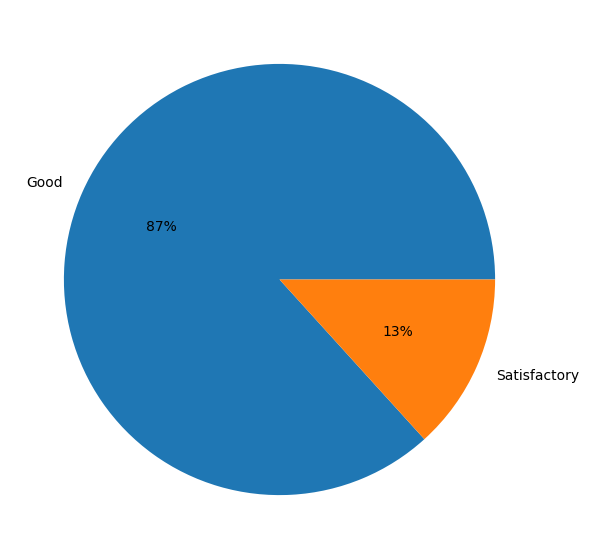

In [33]:

m = chennai_feb['AQI_Standard'].value_counts()
stand =chennai_feb['AQI_Standard'].unique()
count = []
print("In the February Months:-\nTotal number of days : "+str(len(chennai_feb)))
for i in stand:
    count.append(m[i])
    print(str(i) +" : "+str(m[i])+" days")

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(count, labels = stand,autopct='%1.0f%%')
plt.show()

##### March

In the March Months:-
Total number of days : 124
Good : 120 days
Satisfactory : 4 days


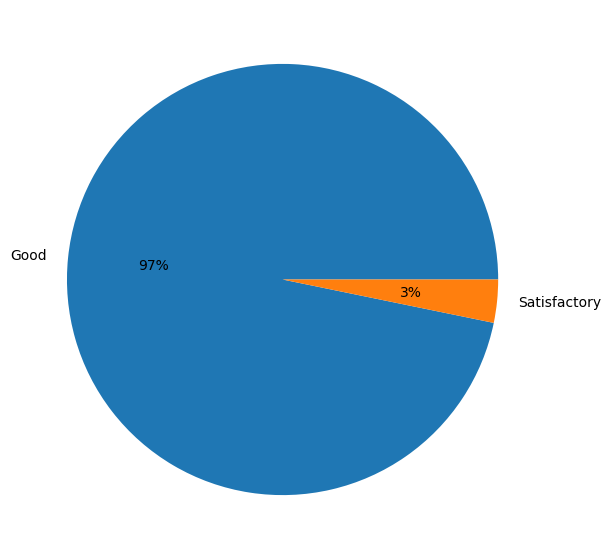

In [34]:
m = chennai_mar['AQI_Standard'].value_counts()
stand =chennai_mar['AQI_Standard'].unique()
count = []
print("In the March Months:-\nTotal number of days : "+str(len(chennai_mar)))
for i in stand:
    count.append(m[i])
    print(str(i) +" : "+str(m[i])+" days")

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(count, labels = stand,autopct='%1.0f%%')
plt.show()

##### April

In the April Months:-
Total number of days : 120
Good : 90 days
Very Poor : 1 days
Satisfactory : 14 days
Moderate : 13 days
Poor : 2 days


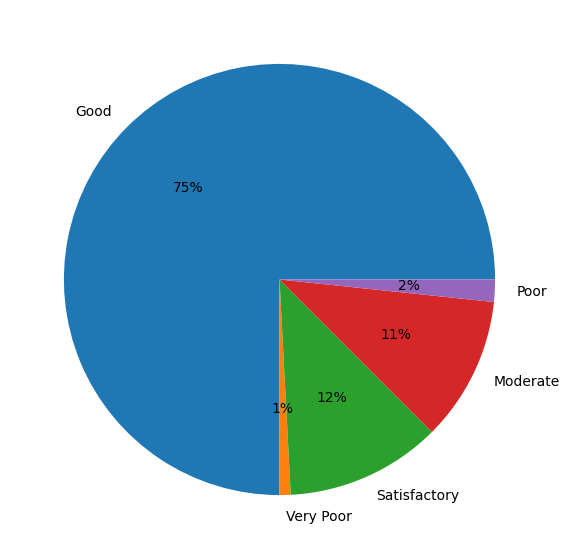

In [35]:
m = chennai_apr['AQI_Standard'].value_counts()
stand =chennai_apr['AQI_Standard'].unique()
count = []
print("In the April Months:-\nTotal number of days : "+str(len(chennai_apr)))
for i in stand:
    count.append(m[i])
    print(str(i) +" : "+str(m[i])+" days")

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(count, labels = stand,autopct='%1.0f%%')
plt.show()

##### May

In the May Months:-
Total number of days : 125
Good : 96 days
Satisfactory : 10 days
Poor : 3 days
Moderate : 13 days
Very Poor : 3 days


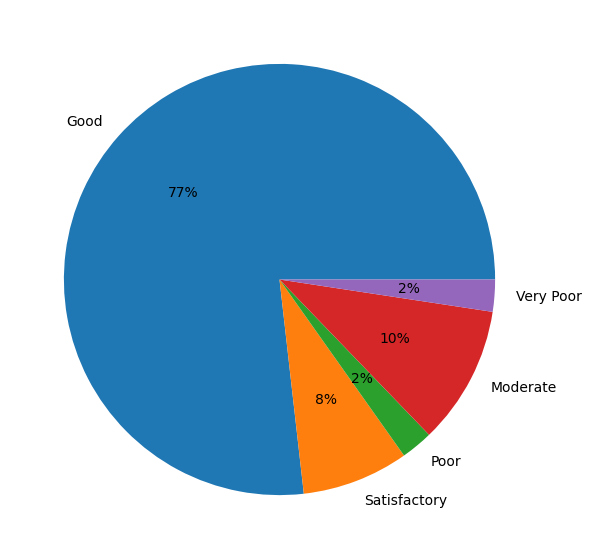

In [36]:
m = chennai_may['AQI_Standard'].value_counts()
stand =chennai_may['AQI_Standard'].unique()
count = []
print("In the May Months:-\nTotal number of days : "+str(len(chennai_may)))
for i in stand:
    count.append(m[i])
    print(str(i) +" : "+str(m[i])+" days")

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(count, labels = stand,autopct='%1.0f%%')
plt.show()

##### June

In the June Months:-
Total number of days : 150
Good : 120 days
Moderate : 22 days
Very Poor : 2 days
Poor : 4 days
Satisfactory : 2 days


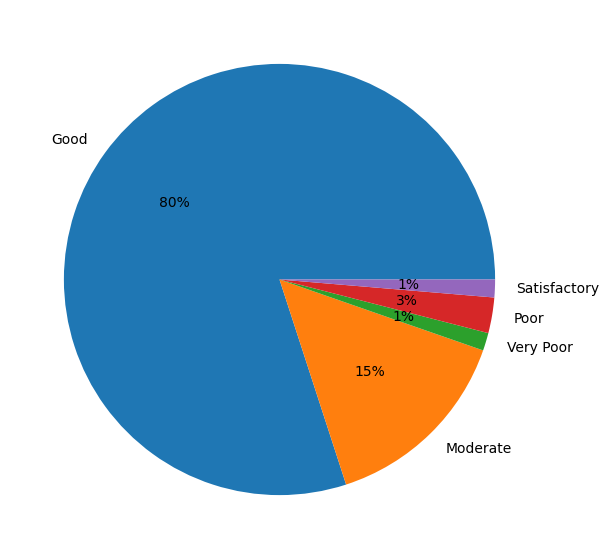

In [37]:
m = chennai_jun['AQI_Standard'].value_counts()
stand =chennai_jun['AQI_Standard'].unique()
count = []
print("In the June Months:-\nTotal number of days : "+str(len(chennai_jun)))
for i in stand:
    count.append(m[i])
    print(str(i) +" : "+str(m[i])+" days")

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(count, labels = stand,autopct='%1.0f%%')
plt.show()

##### July

In the July Months:-
Total number of days : 155
Good : 124 days
Moderate : 13 days
Satisfactory : 7 days
Poor : 8 days
Very Poor : 3 days


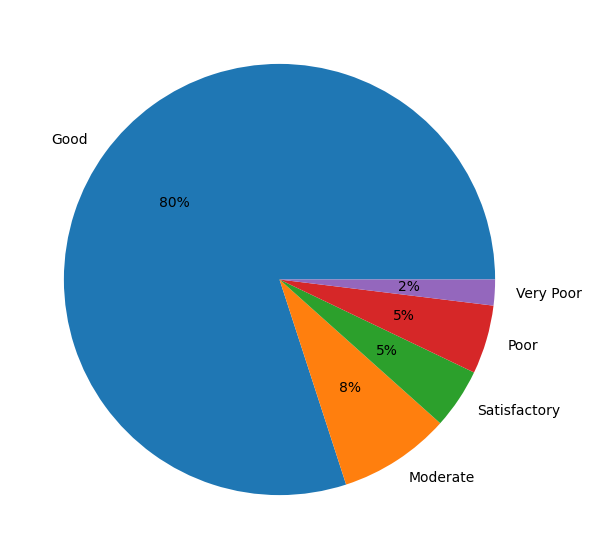

In [38]:
m = chennai_jul['AQI_Standard'].value_counts()
stand =chennai_jul['AQI_Standard'].unique()
count = []
print("In the July Months:-\nTotal number of days : "+str(len(chennai_jul)))
for i in stand:
    count.append(m[i])
    print(str(i) +" : "+str(m[i])+" days")

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(count, labels = stand,autopct='%1.0f%%')
plt.show()

##### August

In the August Months:-
Total number of days : 155
Good : 126 days
Satisfactory : 20 days
Moderate : 7 days
Poor : 2 days


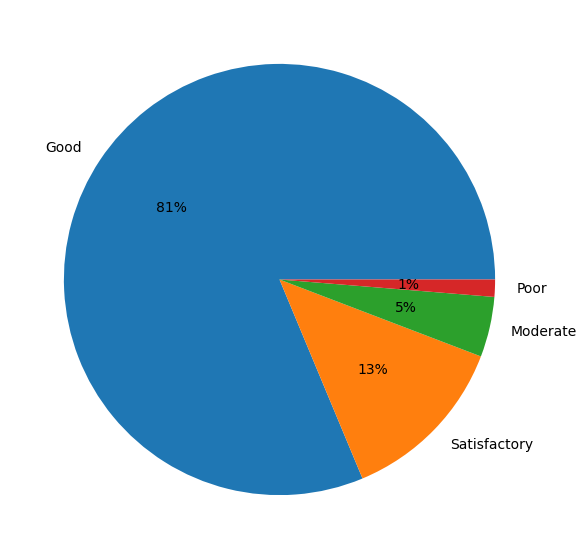

In [39]:
m = chennai_aug['AQI_Standard'].value_counts()
stand =chennai_aug['AQI_Standard'].unique()
count = []
print("In the August Months:-\nTotal number of days : "+str(len(chennai_aug)))
for i in stand:
    count.append(m[i])
    print(str(i) +" : "+str(m[i])+" days")

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(count, labels = stand,autopct='%1.0f%%')
plt.show()

##### September

In the September Months:-
Total number of days : 150
Good : 109 days
Satisfactory : 20 days
Moderate : 18 days
Poor : 3 days


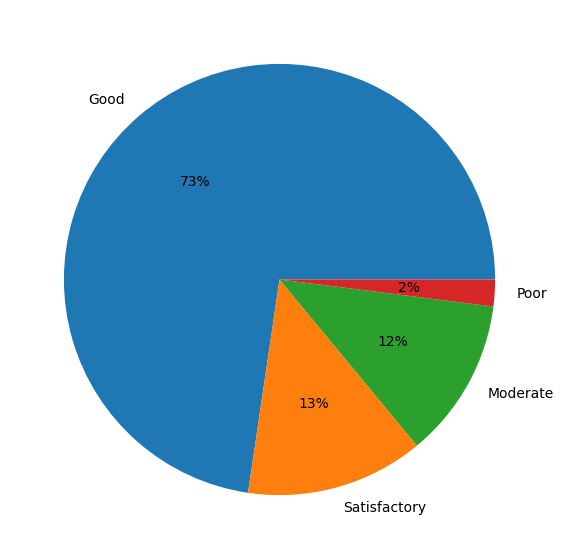

In [40]:
m = chennai_sep['AQI_Standard'].value_counts()
stand =chennai_sep['AQI_Standard'].unique()
count = []
print("In the September Months:-\nTotal number of days : "+str(len(chennai_sep)))
for i in stand:
    count.append(m[i])
    print(str(i) +" : "+str(m[i])+" days")

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(count, labels = stand,autopct='%1.0f%%')
plt.show()

##### October

In the October Months:-
Total number of days : 155
Good : 103 days
Satisfactory : 21 days
Moderate : 21 days
Poor : 10 days


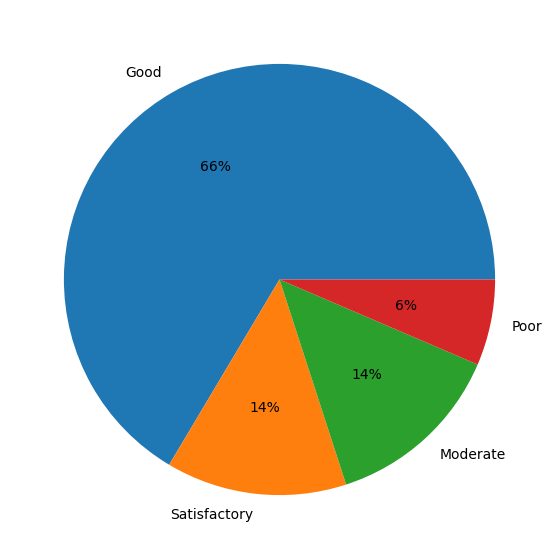

In [41]:
m = chennai_oct['AQI_Standard'].value_counts()
stand =chennai_oct['AQI_Standard'].unique()
count = []
print("In the October Months:-\nTotal number of days : "+str(len(chennai_oct)))
for i in stand:
    count.append(m[i])
    print(str(i) +" : "+str(m[i])+" days")

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(count, labels = stand,autopct='%1.0f%%')
plt.show()

##### November

In the November Months:-
Total number of days : 142
Good : 98 days
Satisfactory : 33 days
Poor : 4 days
Moderate : 7 days


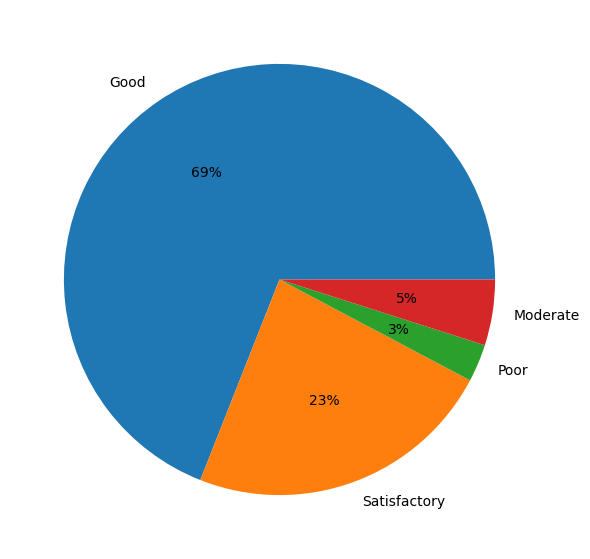

In [42]:
m = chennai_nov['AQI_Standard'].value_counts()
stand =chennai_nov['AQI_Standard'].unique()
count = []
print("In the November Months:-\nTotal number of days : "+str(len(chennai_nov)))
for i in stand:
    count.append(m[i])
    print(str(i) +" : "+str(m[i])+" days")

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(count, labels = stand,autopct='%1.0f%%')
plt.show()

##### December

In the December Months:-
Total number of days : 124
Good : 100 days
Satisfactory : 22 days
Moderate : 2 days


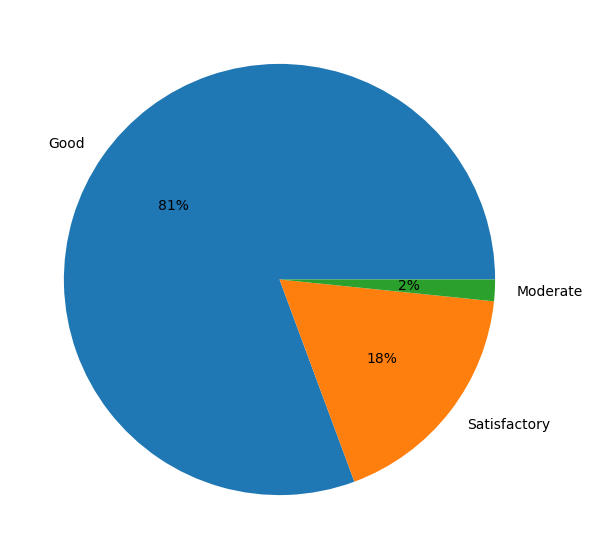

In [43]:
m = chennai_dec['AQI_Standard'].value_counts()
stand =chennai_dec['AQI_Standard'].unique()
count = []
print("In the December Months:-\nTotal number of days : "+str(len(chennai_dec)))
for i in stand:
    count.append(m[i])
    print(str(i) +" : "+str(m[i])+" days")

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(count, labels = stand,autopct='%1.0f%%')
plt.show()

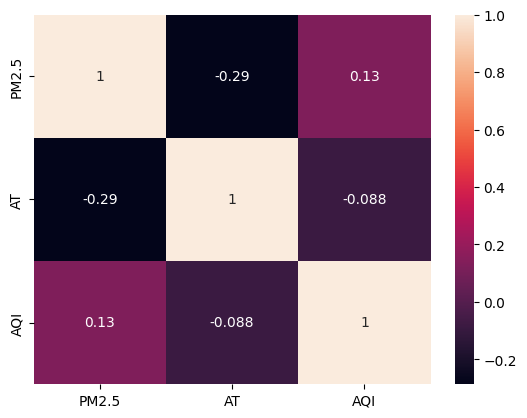

In [44]:
dataplot = sb.heatmap(chennai[['PM2.5','AT','AQI']].corr(), annot=True)
plt.show()

The highest value of PM 2.5 in the 1229 days time period was  353.2  recorded on 2020-06-12 00:00:00  and the lowest value was  0.88  recorded on 2019-06-30 00:00:00 .


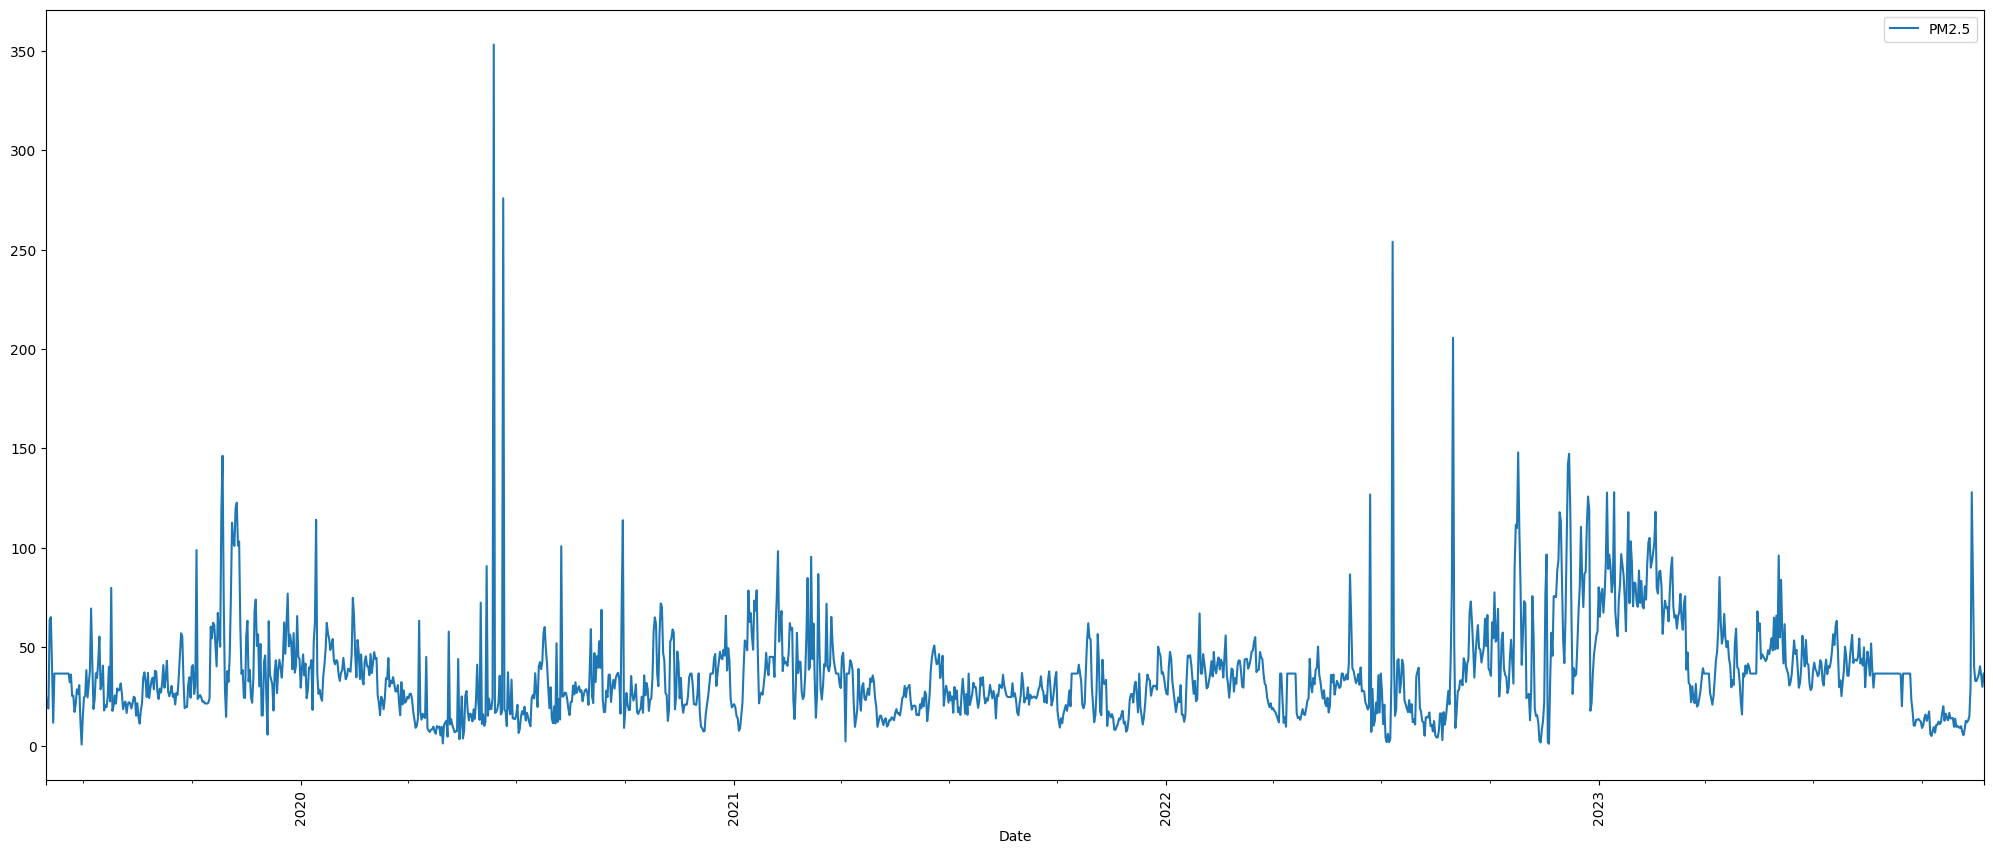

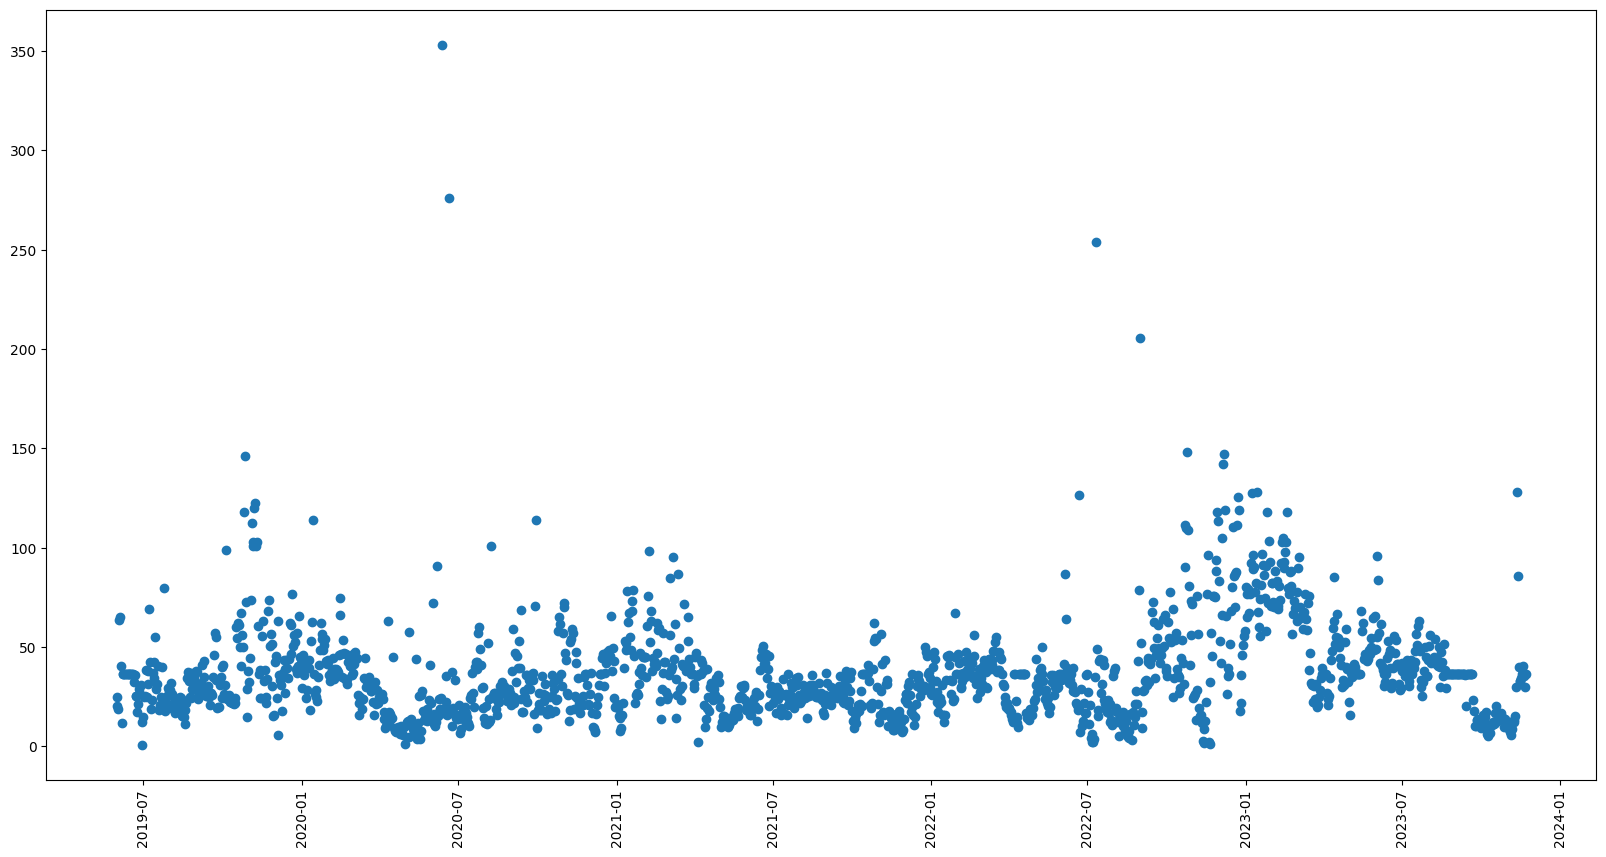

In [45]:
print ("The highest value of PM 2.5 in the 1229 days time period was ",chennai["PM2.5"].loc[chennai['PM2.5'].idxmax()],
       " recorded on", chennai["Date"].loc[chennai['PM2.5'].idxmax()],
       ' and the lowest value was ',chennai["PM2.5"].loc[chennai['PM2.5'].idxmin()], 
       " recorded on",chennai["Date"].loc[chennai['PM2.5'].idxmin()],'.')

a = chennai.plot(x='Date',y='PM2.5',figsize=(25, 10))
plt.xticks(rotation='vertical')
plt.show()

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.plot_date(chennai['Date'],chennai['PM2.5'])
plt.xticks(rotation='vertical')
plt.show()

### Particulate Matter 2.5 (PM 2.5)


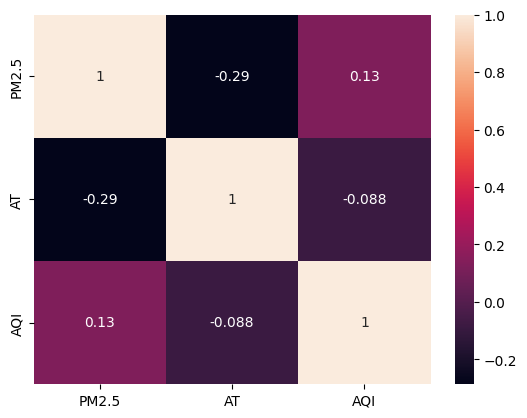

In [46]:
dataplot = sb.heatmap(chennai[['PM2.5','AT','AQI']].corr(), annot=True)
plt.show()

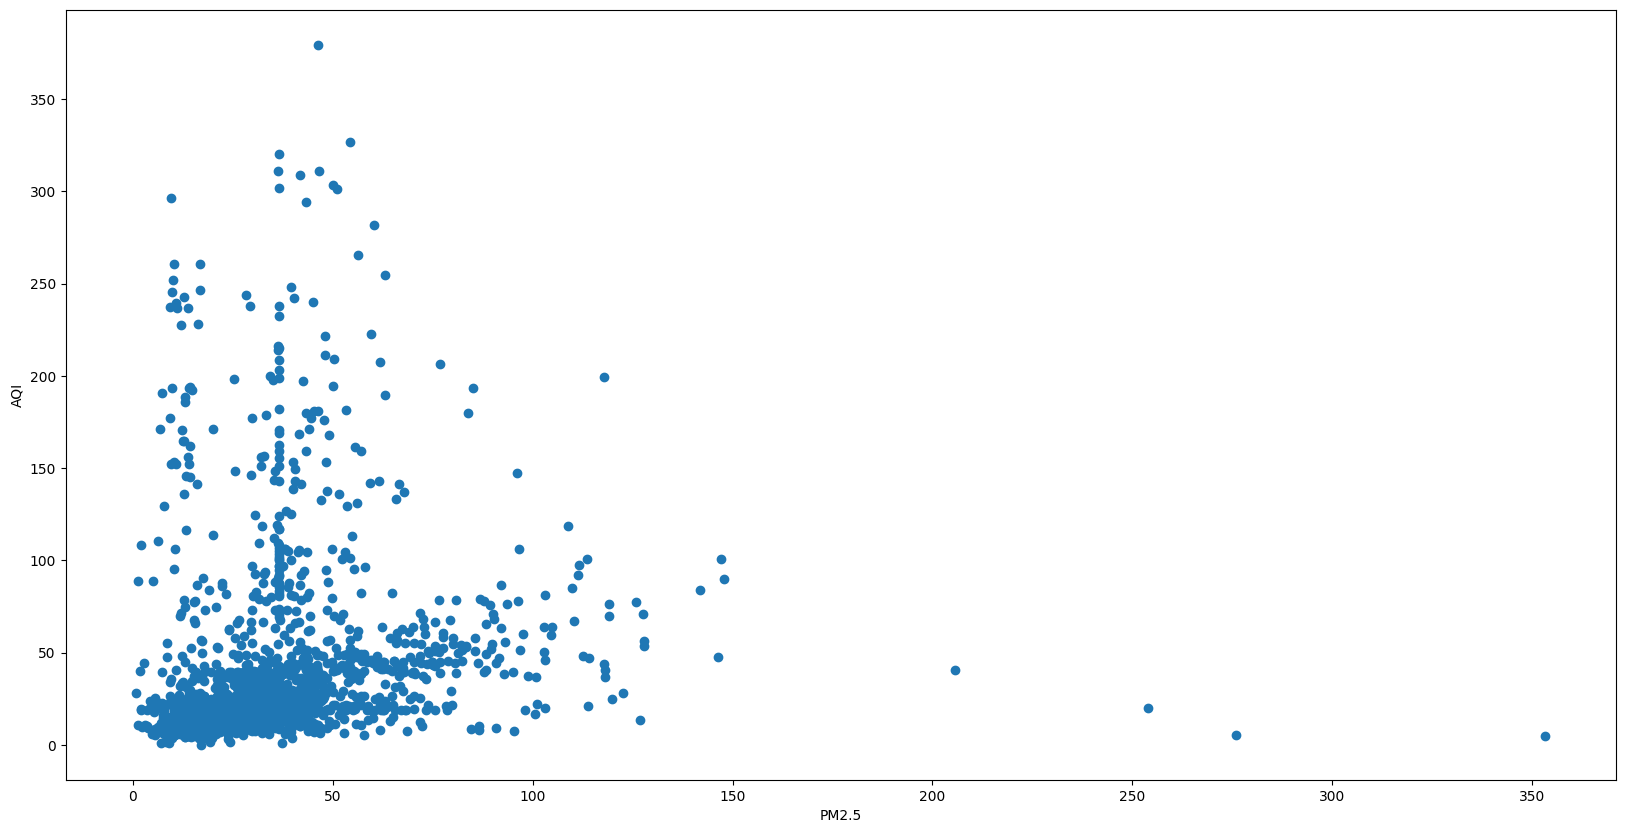

In [47]:
plt.figure(figsize=(20,10))
plt.scatter(x=chennai['PM2.5'],y=chennai['AQI'])
plt.xlabel("PM2.5")
plt.ylabel("AQI")
plt.show()

The highest value of PM 2.5 in the 1637 days time period was  353.2  recorded on 2020-06-12 
and the lowest value was  0.88  recorded on 2019-06-30 
The average PM2.5 value was  36.64 
PM2.5 value had a standard deviation of  25.0 .
The number of days PM2.5 was responsible for the AQI value was:- 0 which is around 0.0%


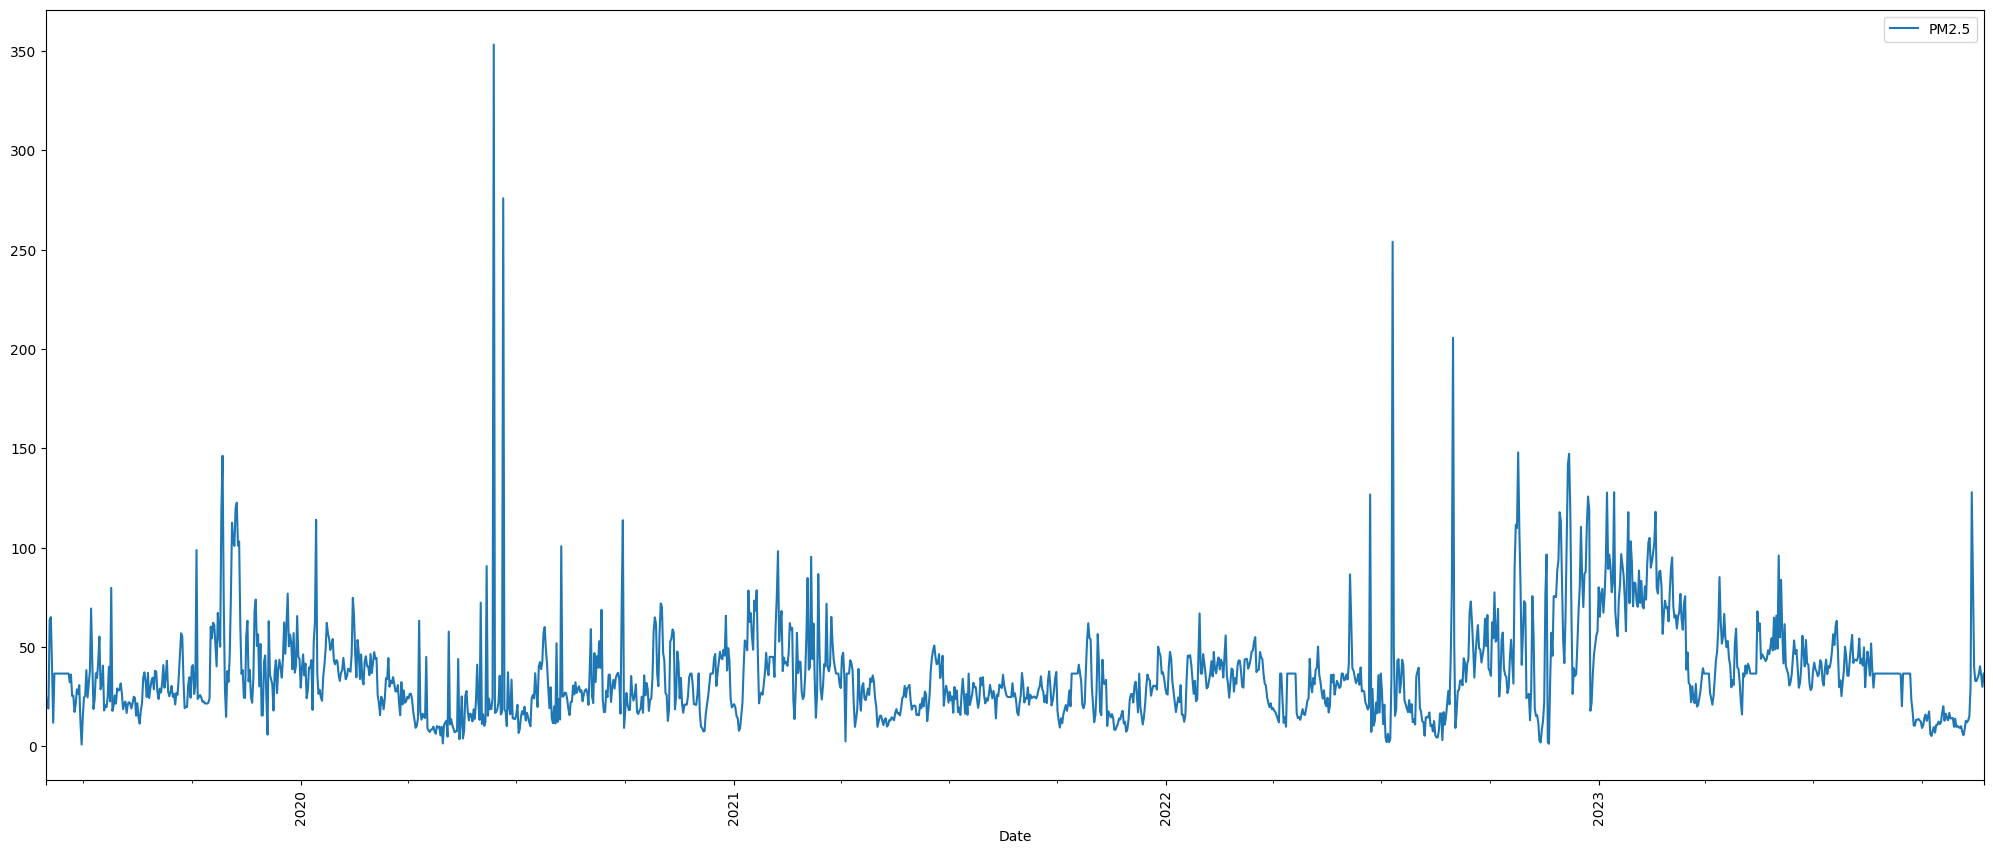

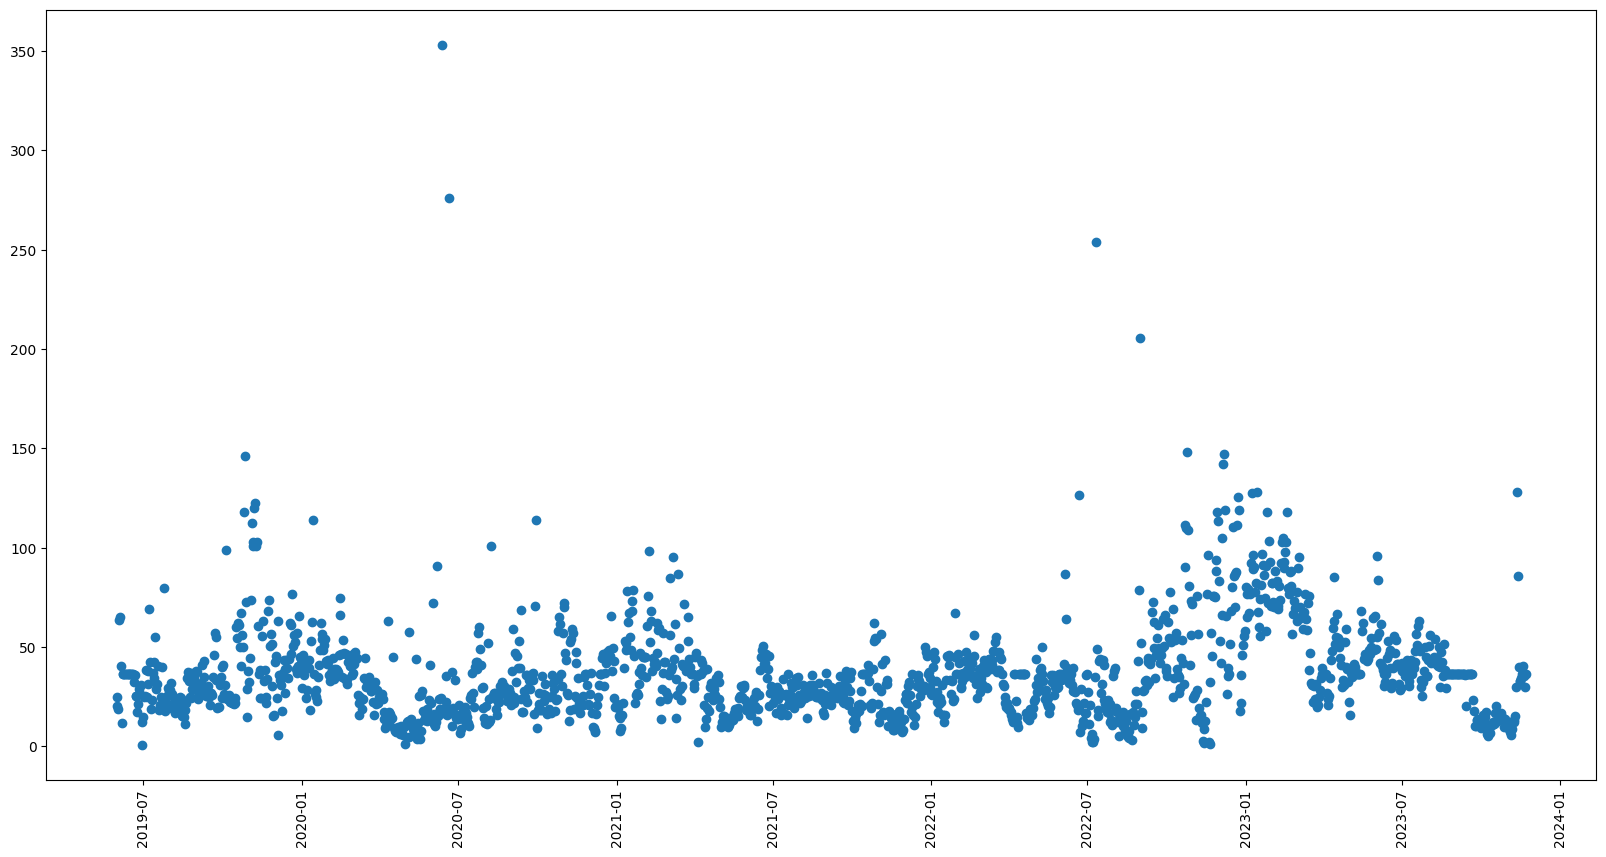

In [48]:
count = 0
for i in range(len(chennai)):
    if (PM25(chennai["PM2.5"][i]) == chennai["AQI"][i]):
        count = count+1
percent = (count/len(chennai))*100
print ("The highest value of PM 2.5 in the " +str(len(chennai)) +
       " days time period was ",chennai["PM2.5"].loc[chennai['PM2.5'].idxmax()],
       " recorded on", str(chennai["Date"].loc[chennai['PM2.5'].idxmax()])[:10],
       '\nand the lowest value was ',chennai["PM2.5"].loc[chennai['PM2.5'].idxmin()], 
       " recorded on",str(chennai["Date"].loc[chennai['PM2.5'].idxmin()])[:10],
       "\nThe average PM2.5 value was ",str(round(chennai["PM2.5"].mean(),2)),
       "\nPM2.5 value had a standard deviation of ",str(round(chennai["PM2.5"].std(),2)))


a = chennai.plot(x='Date',y='PM2.5',figsize=(25, 10))
plt.xticks(rotation='vertical')
plt.show()

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.plot_date(chennai['Date'],chennai['PM2.5'])
plt.xticks(rotation='vertical')
plt.show()

##### PM2.5 2019

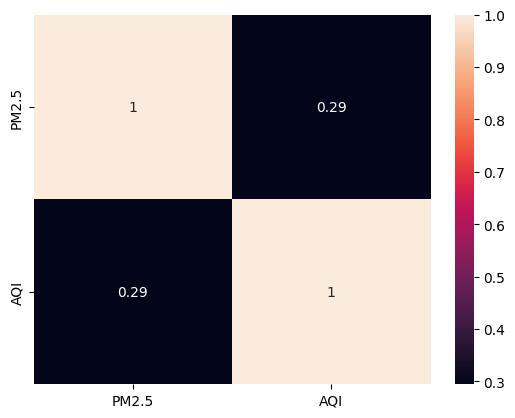

In [49]:
dataplot = sb.heatmap(chennai_2019[['PM2.5','AQI']].corr(), annot=True)
plt.show()

The highest value of PM2.5 in the 215 days time period was  146.26  recorded on 2019-10-27 
and the lowest value was  0.88  recorded on 2019-06-30 
The average PM2.5 value was  37.99 
PM2.5 value had a standard deviation of  22.13 .
In 2019 the number of days PM2.5 was responsible for the AQI value was:- 0 which is around 0.0%


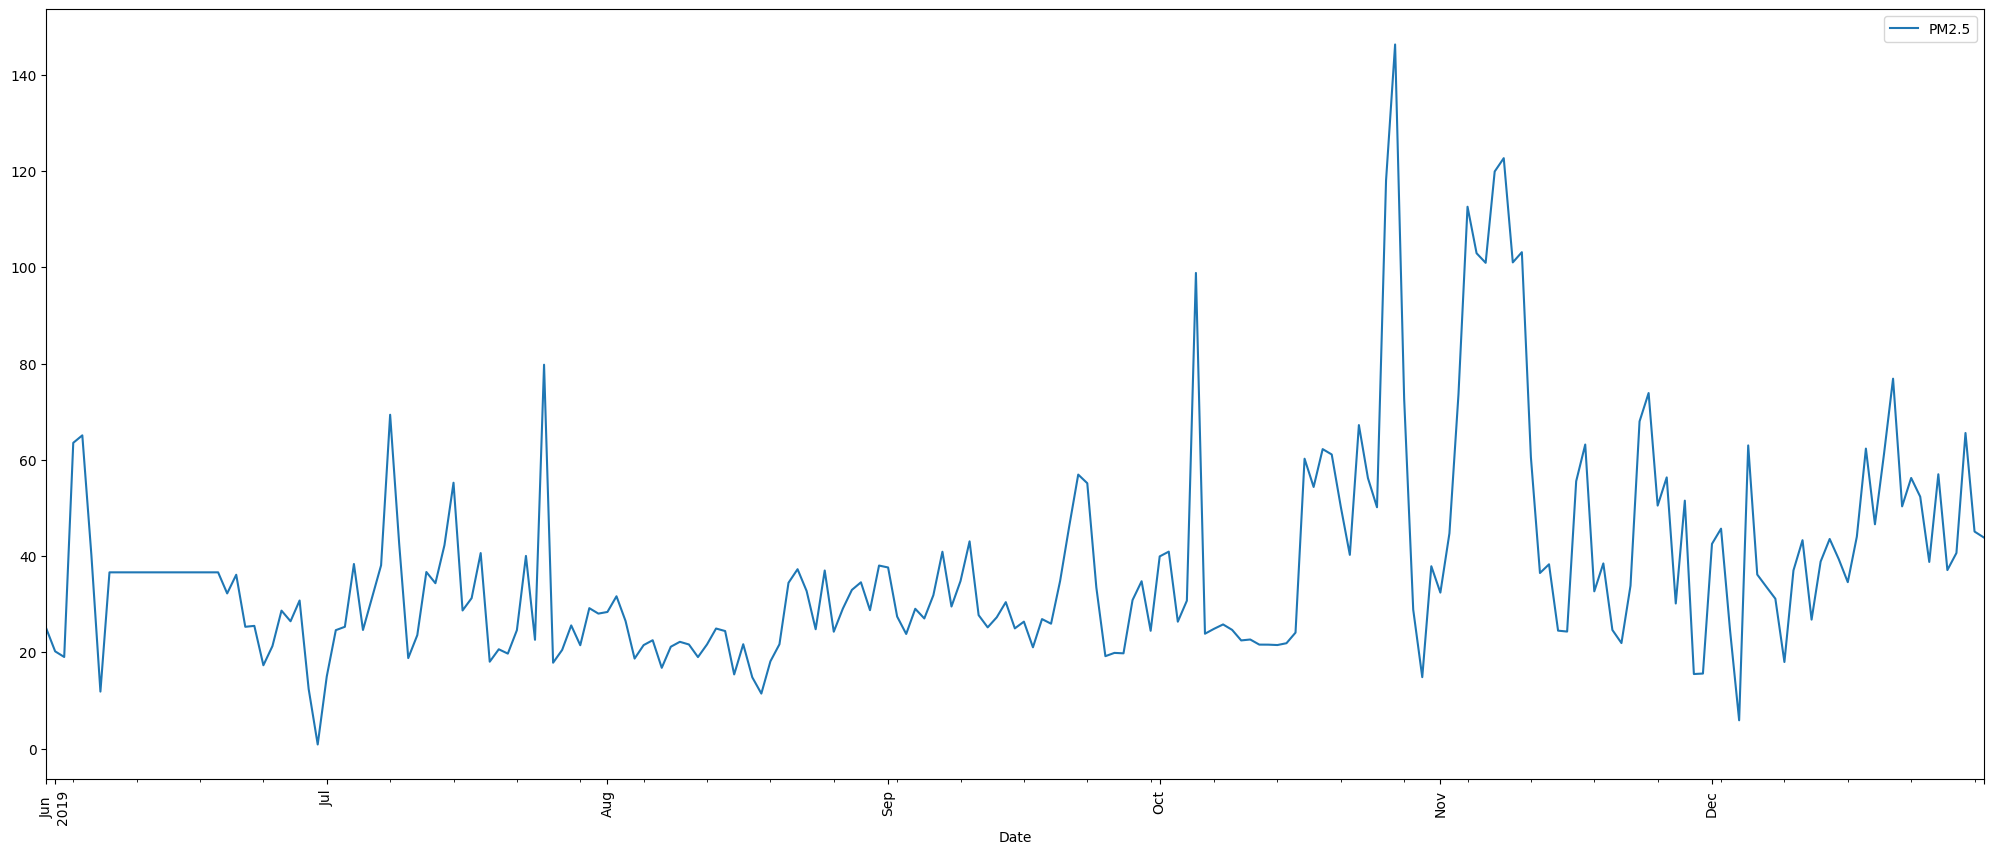

In [50]:
count = 0
for i in range(len(chennai_2019)):
    if (PM25(chennai_2019["PM2.5"][i]) == chennai_2019["AQI"][i]):
        count = count+1
percent = (count/len(chennai_2019))*100

print ("The highest value of PM2.5 in the "+str(len(chennai_2019))+
       " days time period was ",chennai_2019["PM2.5"].loc[chennai_2019['PM2.5'].idxmax()],
       " recorded on", str(chennai_2019["Date"].loc[chennai_2019['PM2.5'].idxmax()])[:10],
       '\nand the lowest value was ',chennai_2019["PM2.5"].loc[chennai_2019['PM2.5'].idxmin()], 
       " recorded on",str(chennai_2019["Date"].loc[chennai_2019['PM2.5'].idxmin()])[:10],
       "\nThe average PM2.5 value was ",str(round(chennai_2019["PM2.5"].mean(),2)),
       "\nPM2.5 value had a standard deviation of ",str(round(chennai_2019["PM2.5"].std(),2)))

a = chennai_2019.plot(x='Date',y='PM2.5',figsize=(25, 10))
plt.xticks(rotation='vertical')
plt.show()

##### PM2.5 2020

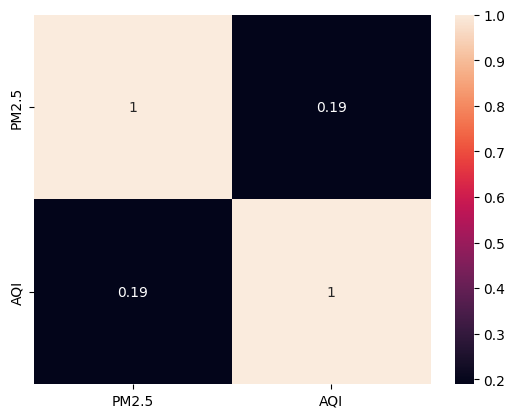

In [51]:
dataplot = sb.heatmap(chennai_2020[['PM2.5','AQI']].corr(), annot=True)
plt.show()

The highest value of PM2.5 in the 366 days time period was  353.2  recorded on 2020-06-12 
and the lowest value was  1.44  recorded on 2020-04-30 
The average PM2.5 value was  31.3 
PM2.5 value had a standard deviation of  27.05 
In 2020 the number of days PM2.5 was responsible for the AQI value was:- 0 which is around 0.0%


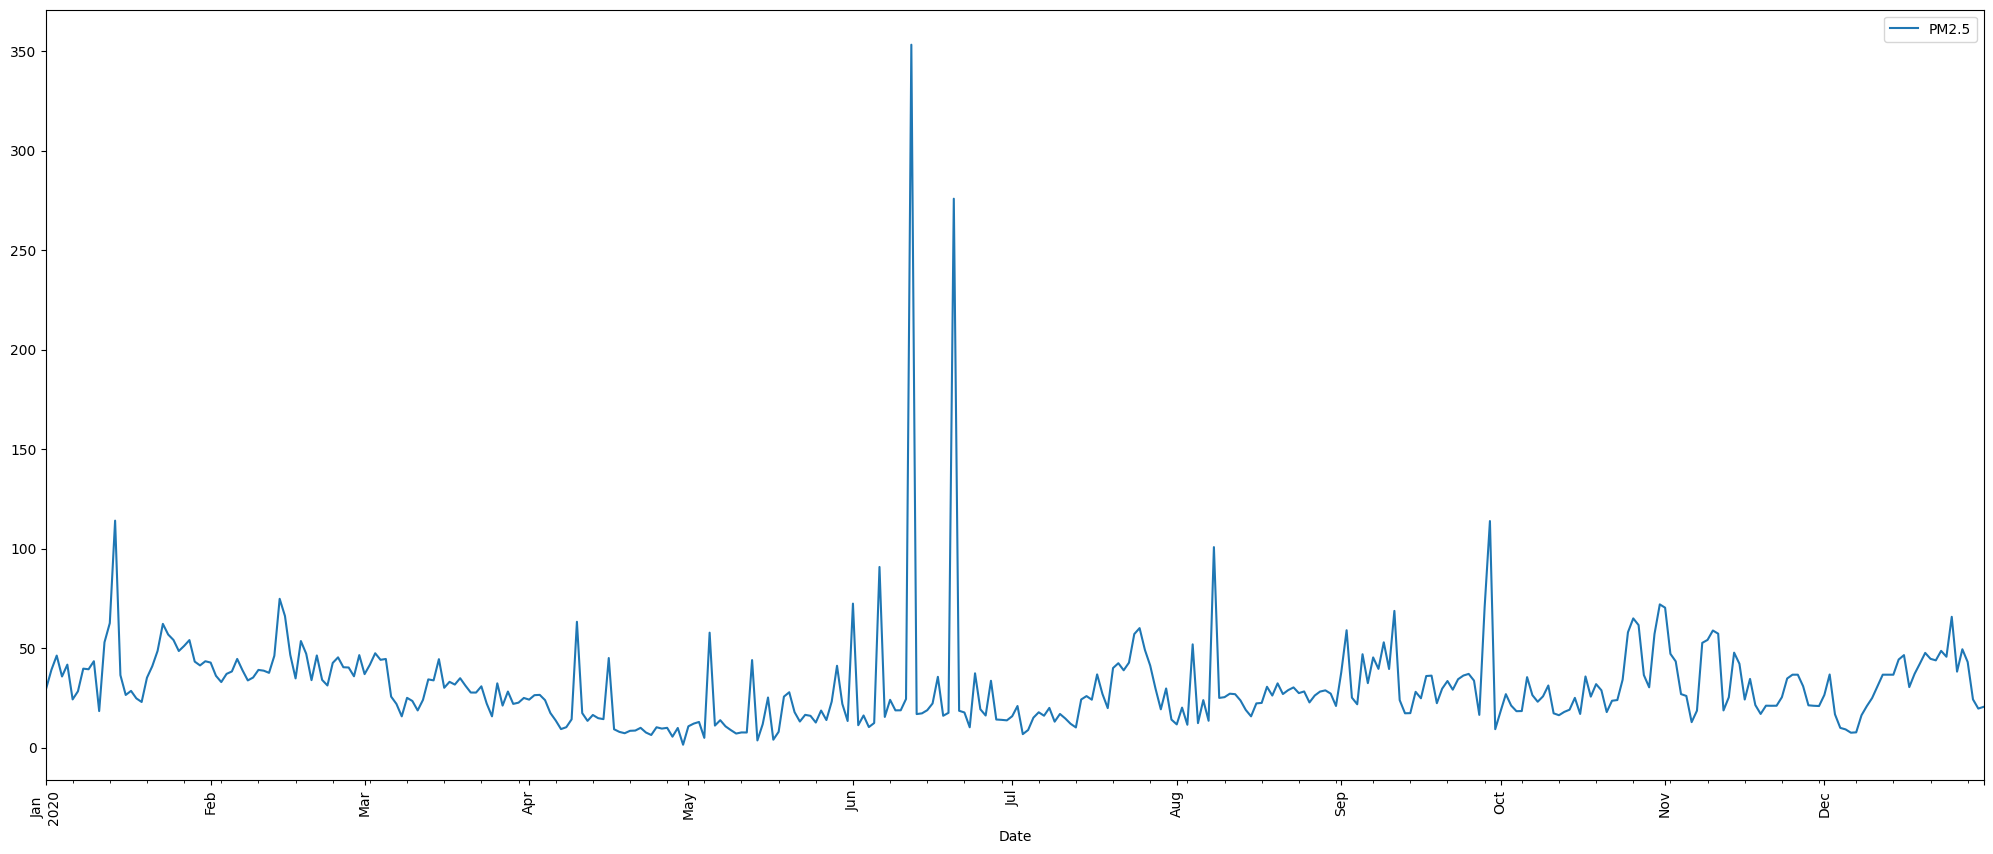

In [52]:
count = 0
for i in range(len(chennai_2020)):
    if (PM25(chennai_2020["PM2.5"][i]) == chennai_2020["AQI"][i]):
        count = count+1
percent = (count/len(chennai_2020))*100

print ("The highest value of PM2.5 in the "+str(len(chennai_2020))+
       " days time period was ",chennai_2020["PM2.5"].loc[chennai_2020['PM2.5'].idxmax()],
       " recorded on", str(chennai_2020["Date"].loc[chennai_2020['PM2.5'].idxmax()])[:10],
       '\nand the lowest value was ',chennai_2020["PM2.5"].loc[chennai_2020['PM2.5'].idxmin()], 
       " recorded on",str(chennai_2020["Date"].loc[chennai_2020['PM2.5'].idxmin()])[:10],
       "\nThe average PM2.5 value was ",str(round(chennai_2020["PM2.5"].mean(),2)),
       "\nPM2.5 value had a standard deviation of ",str(round(chennai_2020["PM2.5"].std(),2)))


a = chennai_2020.plot(x='Date',y='PM2.5',figsize=(25, 10))
plt.xticks(rotation='vertical')
plt.show()

##### PM2.5 2021

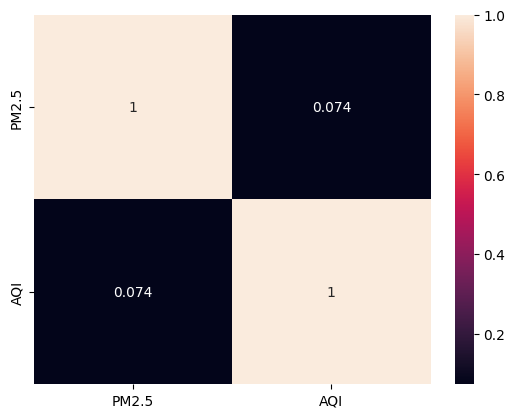

In [53]:
dataplot = sb.heatmap(chennai_2021[['PM2.5','AQI']].corr(), annot=True)
plt.show()

The highest value of PM2.5 in the 365 days time period was  98.21  recorded on 2021-02-07 
and the lowest value was  2.46  recorded on 2021-04-05 
The average PM2.5 value was  30.32 
PM2.5 value had a standard deviation of  15.1 
In 2021 the number of days PM2.5 was responsible for the AQI value was:- 0 which is around 0.0%


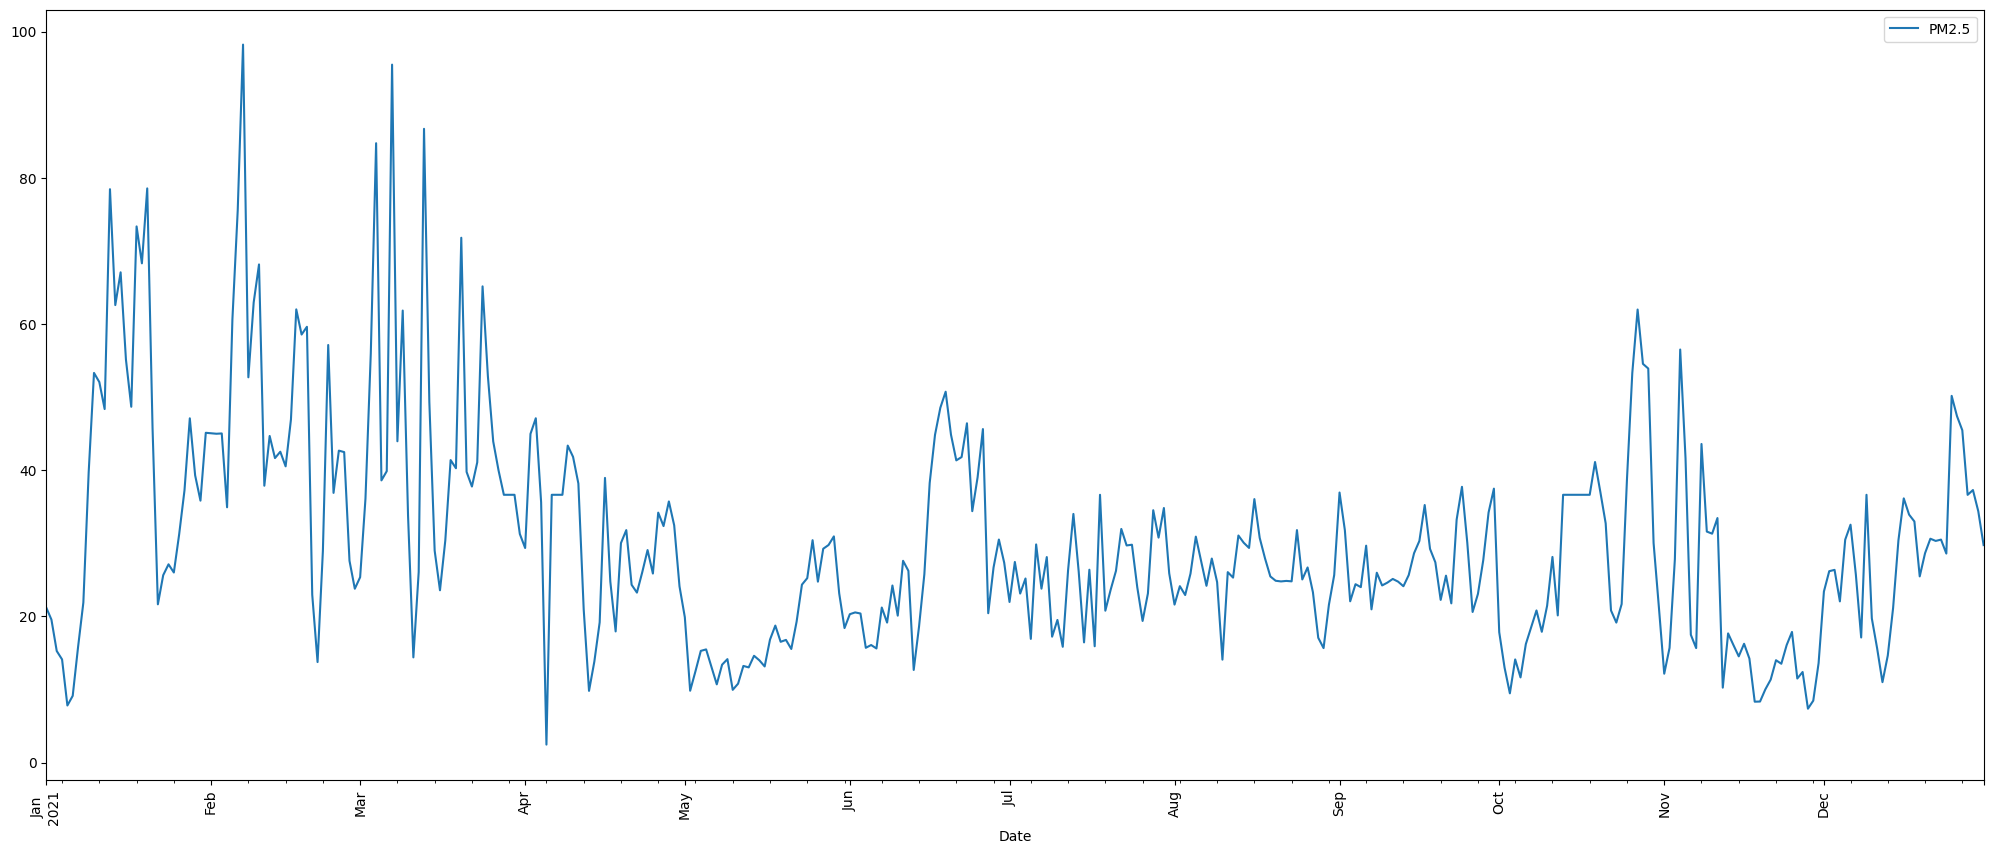

In [54]:
count = 0
for i in range(len(chennai_2021)):
    if (PM25(chennai_2021["PM2.5"][i]) == chennai_2021["AQI"][i]):
        count = count+1
percent = (count/len(chennai_2021))*100

print ("The highest value of PM2.5 in the "+str(len(chennai_2021))+
       " days time period was ",chennai_2021["PM2.5"].loc[chennai_2021['PM2.5'].idxmax()],
       " recorded on", str(chennai_2021["Date"].loc[chennai_2021['PM2.5'].idxmax()])[:10],
       '\nand the lowest value was ',chennai_2021["PM2.5"].loc[chennai_2021['PM2.5'].idxmin()], 
       " recorded on",str(chennai_2021["Date"].loc[chennai_2021['PM2.5'].idxmin()])[:10],
       "\nThe average PM2.5 value was ",str(round(chennai_2021["PM2.5"].mean(),2)),
       "\nPM2.5 value had a standard deviation of ",str(round(chennai_2021["PM2.5"].std(),2)))


a = chennai_2021.plot(x='Date',y='PM2.5',figsize=(25, 10))
plt.xticks(rotation='vertical')
plt.show()

##### PM2.5 2022

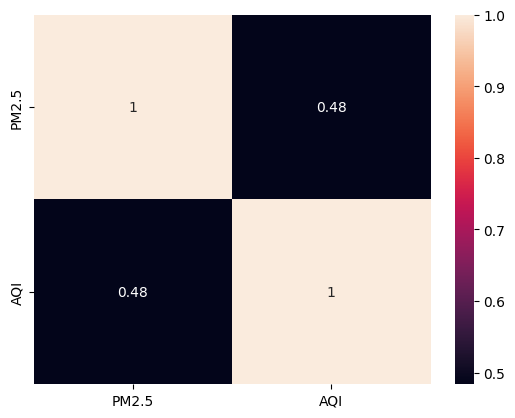

In [55]:
dataplot = sb.heatmap(chennai_2022[['PM2.5','AQI']].corr(), annot=True)
plt.show()

The highest value of PM2.5 in the 365 days time period was  253.97  recorded on 2022-07-11 
and the lowest value was  1.28  recorded on 2022-11-20 
The average PM2.5 value was  39.19 
PM2.5 value had a standard deviation of  29.04 
In 2022 the number of days PM2.5 was responsible for the AQI value was:- 0 which is around 0.0%


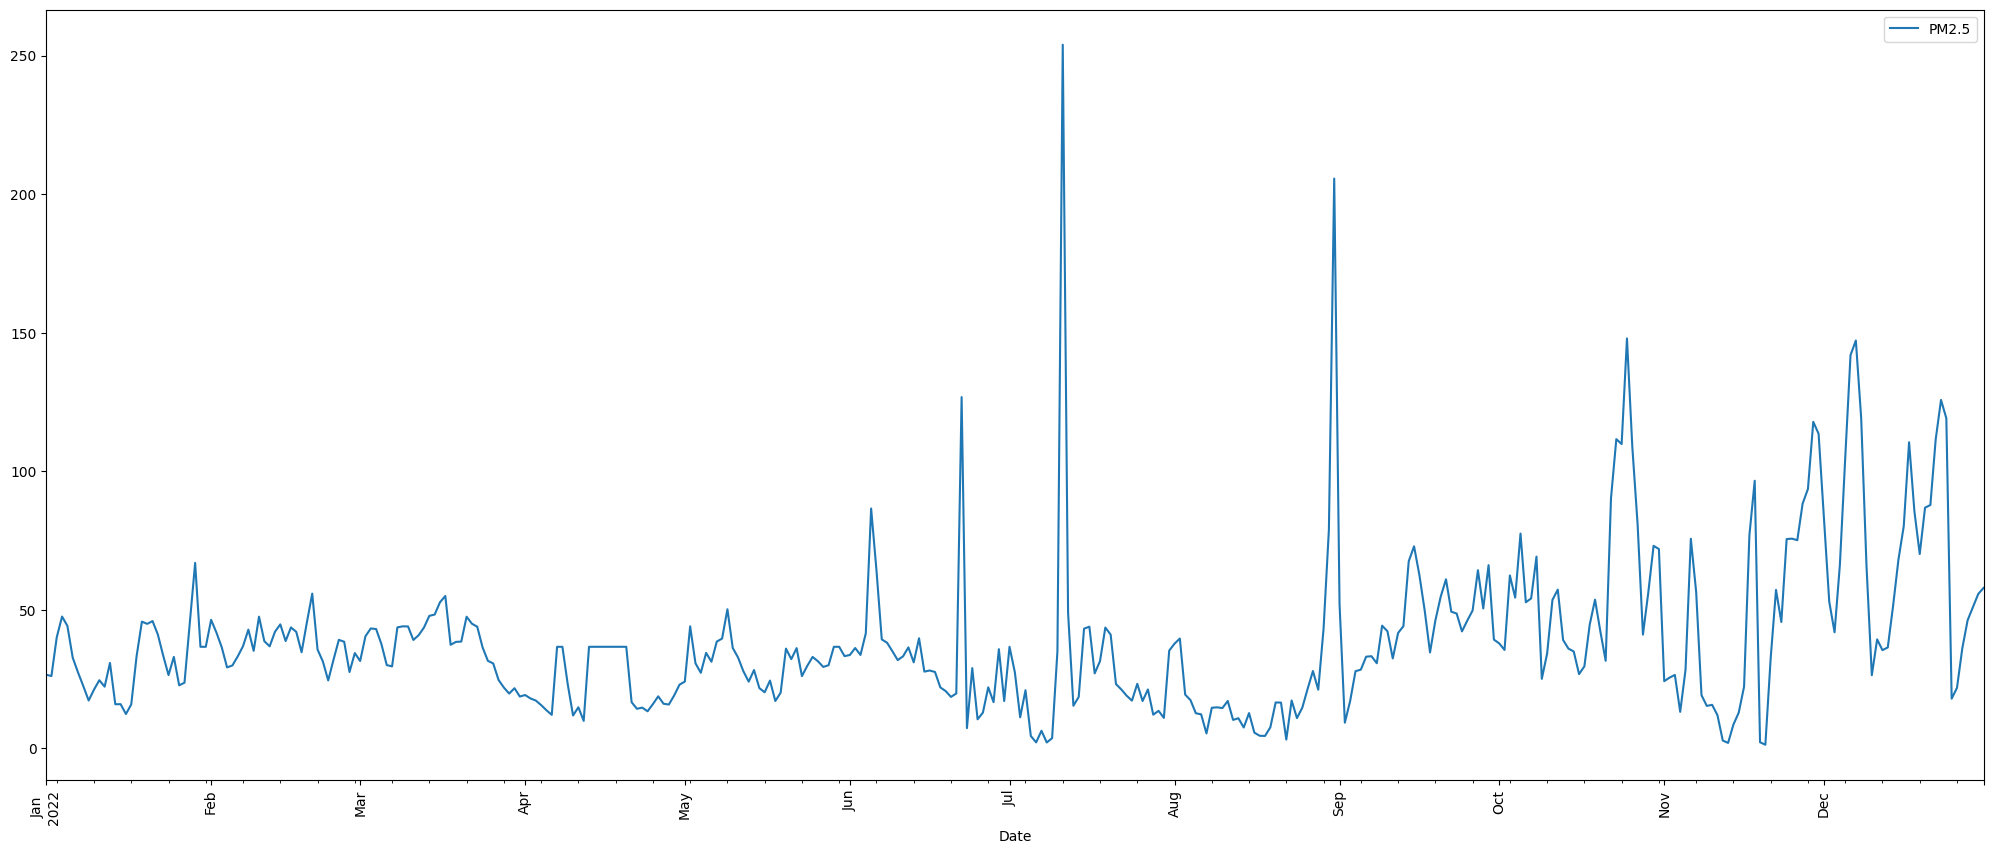

In [56]:
count = 0
for i in range(len(chennai_2022)):
    if (PM25(chennai_2022["PM2.5"][i]) == chennai_2022["AQI"][i]):
        count = count+1
percent = (count/len(chennai_2022))*100

print ("The highest value of PM2.5 in the "+str(len(chennai_2022))+
       " days time period was ",chennai_2022["PM2.5"].loc[chennai_2022['PM2.5'].idxmax()],
       " recorded on", str(chennai_2022["Date"].loc[chennai_2022['PM2.5'].idxmax()])[:10],
       '\nand the lowest value was ',chennai_2022["PM2.5"].loc[chennai_2022['PM2.5'].idxmin()], 
       " recorded on",str(chennai_2022["Date"].loc[chennai_2022['PM2.5'].idxmin()])[:10],
       "\nThe average PM2.5 value was ",str(round(chennai_2022["PM2.5"].mean(),2)),
       "\nPM2.5 value had a standard deviation of ",str(round(chennai_2022["PM2.5"].std(),2)))


a = chennai_2022.plot(x='Date',y='PM2.5',figsize=(25, 10))
plt.xticks(rotation='vertical')
plt.show()

### Particulate Matter 10 (PM 10)

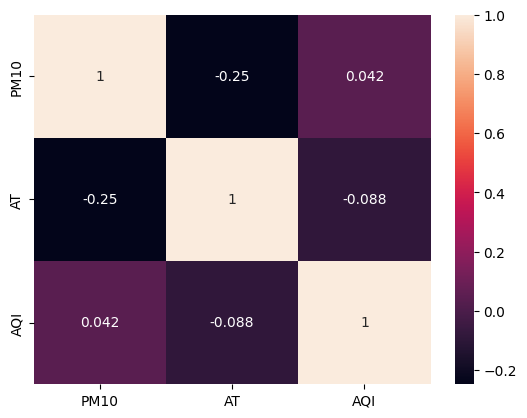

In [57]:
dataplot = sb.heatmap(chennai[['PM10','AT','AQI']].corr(), annot=True)
plt.show()

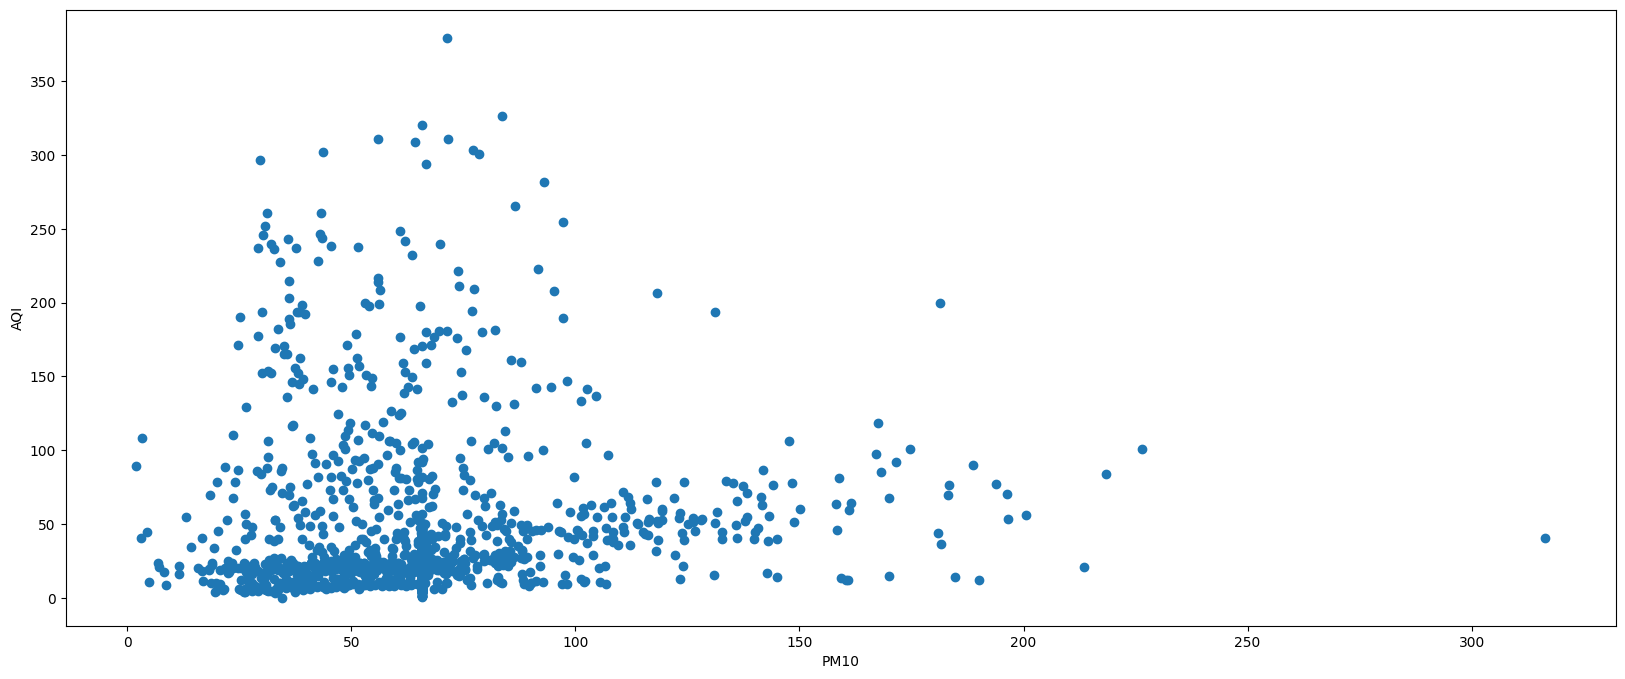

In [58]:
plt.figure(figsize=(20,8))
plt.scatter(x=chennai['PM10'],y=chennai['AQI'])
plt.xlabel("PM10")
plt.ylabel("AQI")
plt.show()

The highest value of PM 10 in the 1637 days time period was  316.41  recorded on 2022-08-31 
and the lowest value was  1.97  recorded on 2022-11-20 
The average PM10 value was  65.68 
PM10 value had a standard deviation of  27.47 .
The number of days PM10 was responsible for the AQI value was:- 0 which is around 0.0%


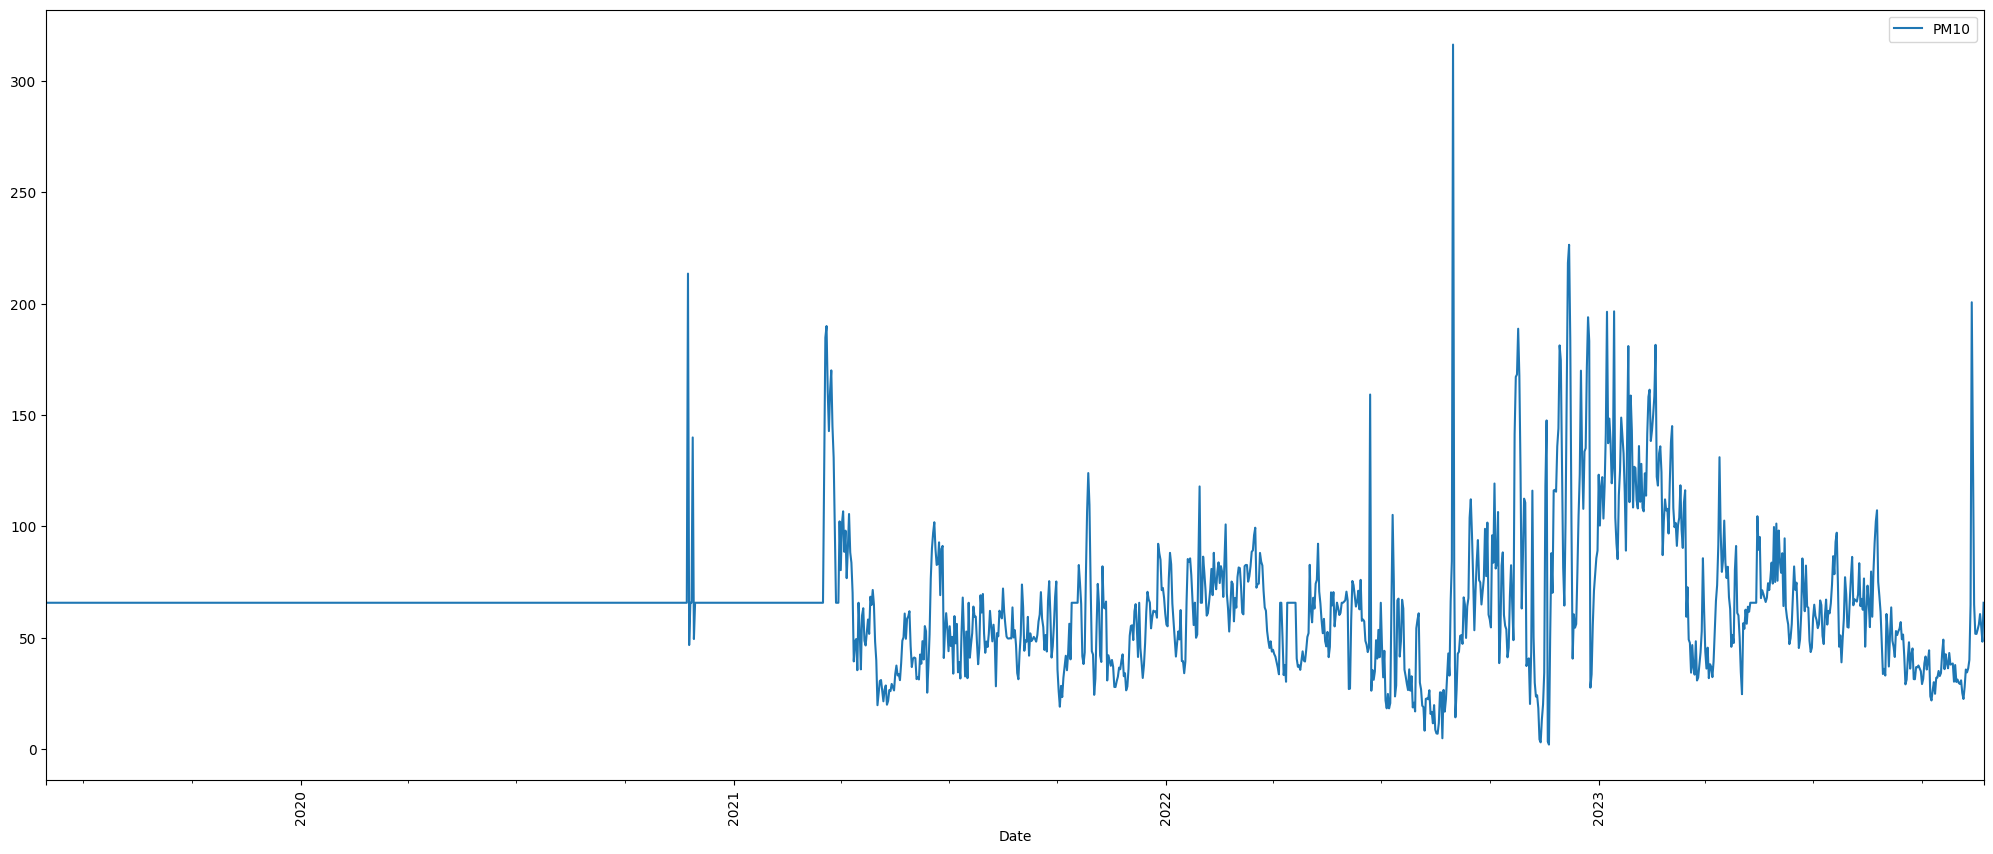

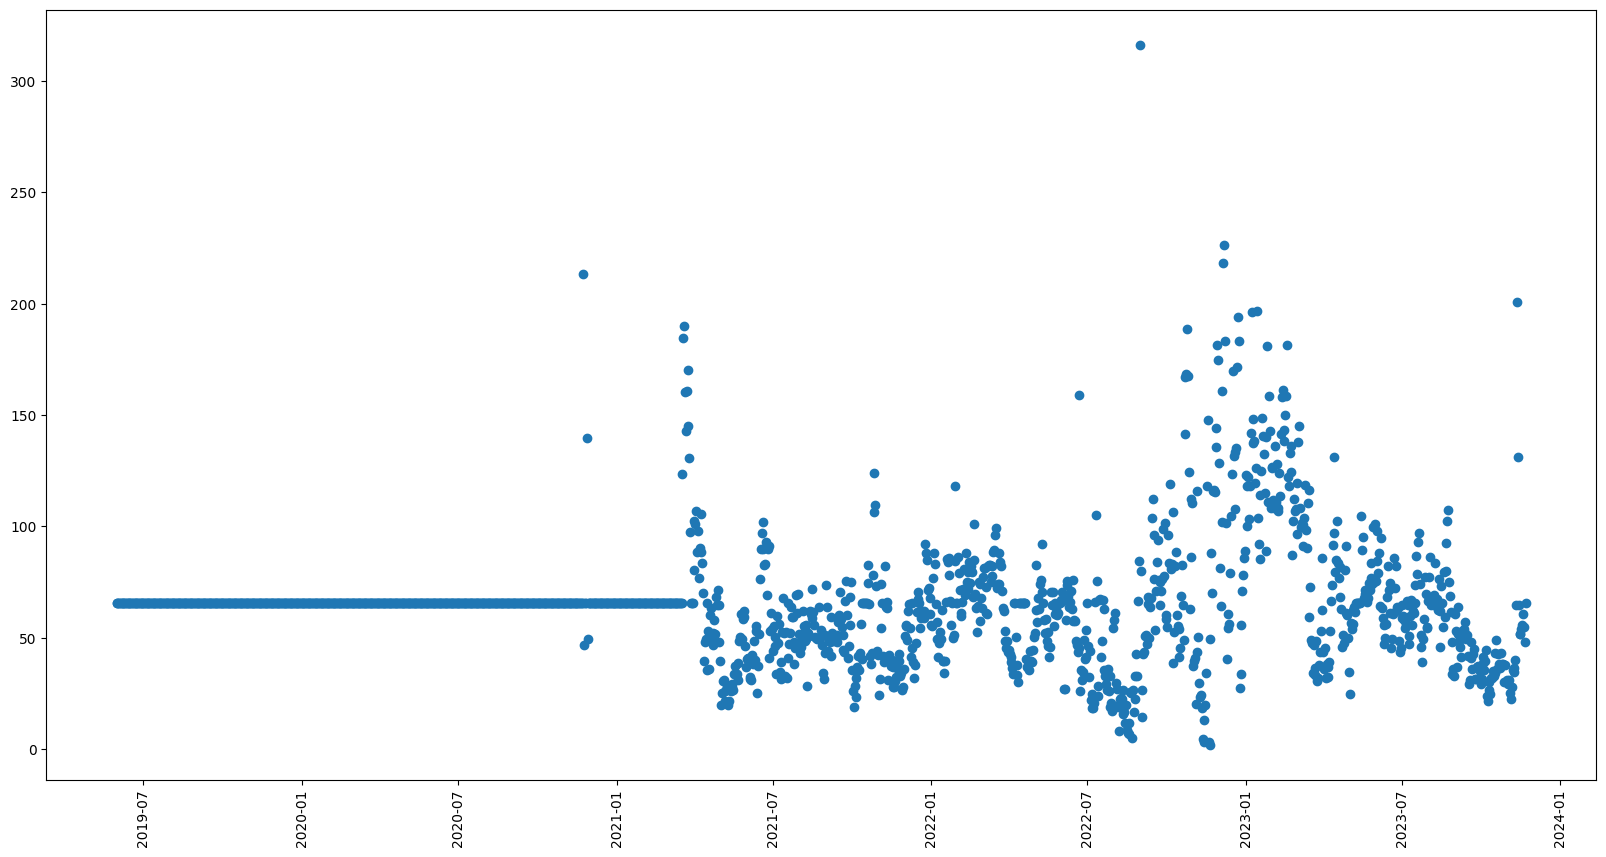

In [59]:
count = 0
for i in range(len(chennai)):
    if (PM10(chennai["PM10"][i]) == chennai["AQI"][i]):
        count = count+1
percent = (count/len(chennai))*100
print ("The highest value of PM 10 in the "+str(len(chennai))+
       " days time period was ",chennai["PM10"].loc[chennai['PM10'].idxmax()],
       " recorded on", str(chennai["Date"].loc[chennai['PM10'].idxmax()])[:10],
       '\nand the lowest value was ',chennai["PM10"].loc[chennai['PM10'].idxmin()], 
       " recorded on",str(chennai["Date"].loc[chennai['PM10'].idxmin()])[:10],
       "\nThe average PM10 value was ",str(round(chennai["PM10"].mean(),2)),
       "\nPM10 value had a standard deviation of ",str(round(chennai["PM10"].std(),2)))


a = chennai.plot(x='Date',y='PM10',figsize=(25, 10))
plt.xticks(rotation='vertical')
plt.show()

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.plot_date(chennai['Date'],chennai['PM10'])
plt.xticks(rotation='vertical')
plt.show()

##### PM10 2019

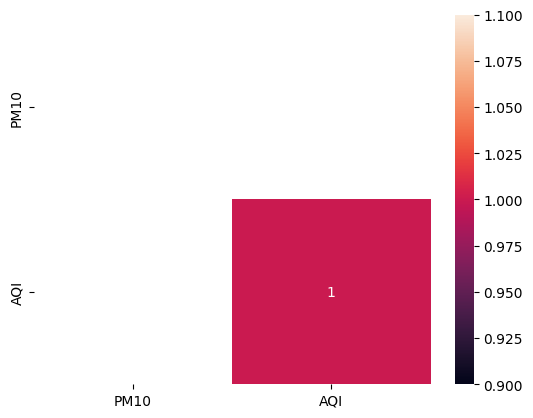

In [60]:
dataplot = sb.heatmap(chennai_2019[['PM10','AQI']].corr(), annot=True)
plt.show()

The highest value of PM10 in the 215 days time period was  65.68228421  recorded on 2019-05-31 
and the lowest value was  65.68228421  recorded on 2019-05-31 
The average PM10 value was  65.68 
PM10 value had a standard deviation of  0.0 
In 2019 the number of days PM10 was responsible for the AQI value was:- 0 which is around 0.0%


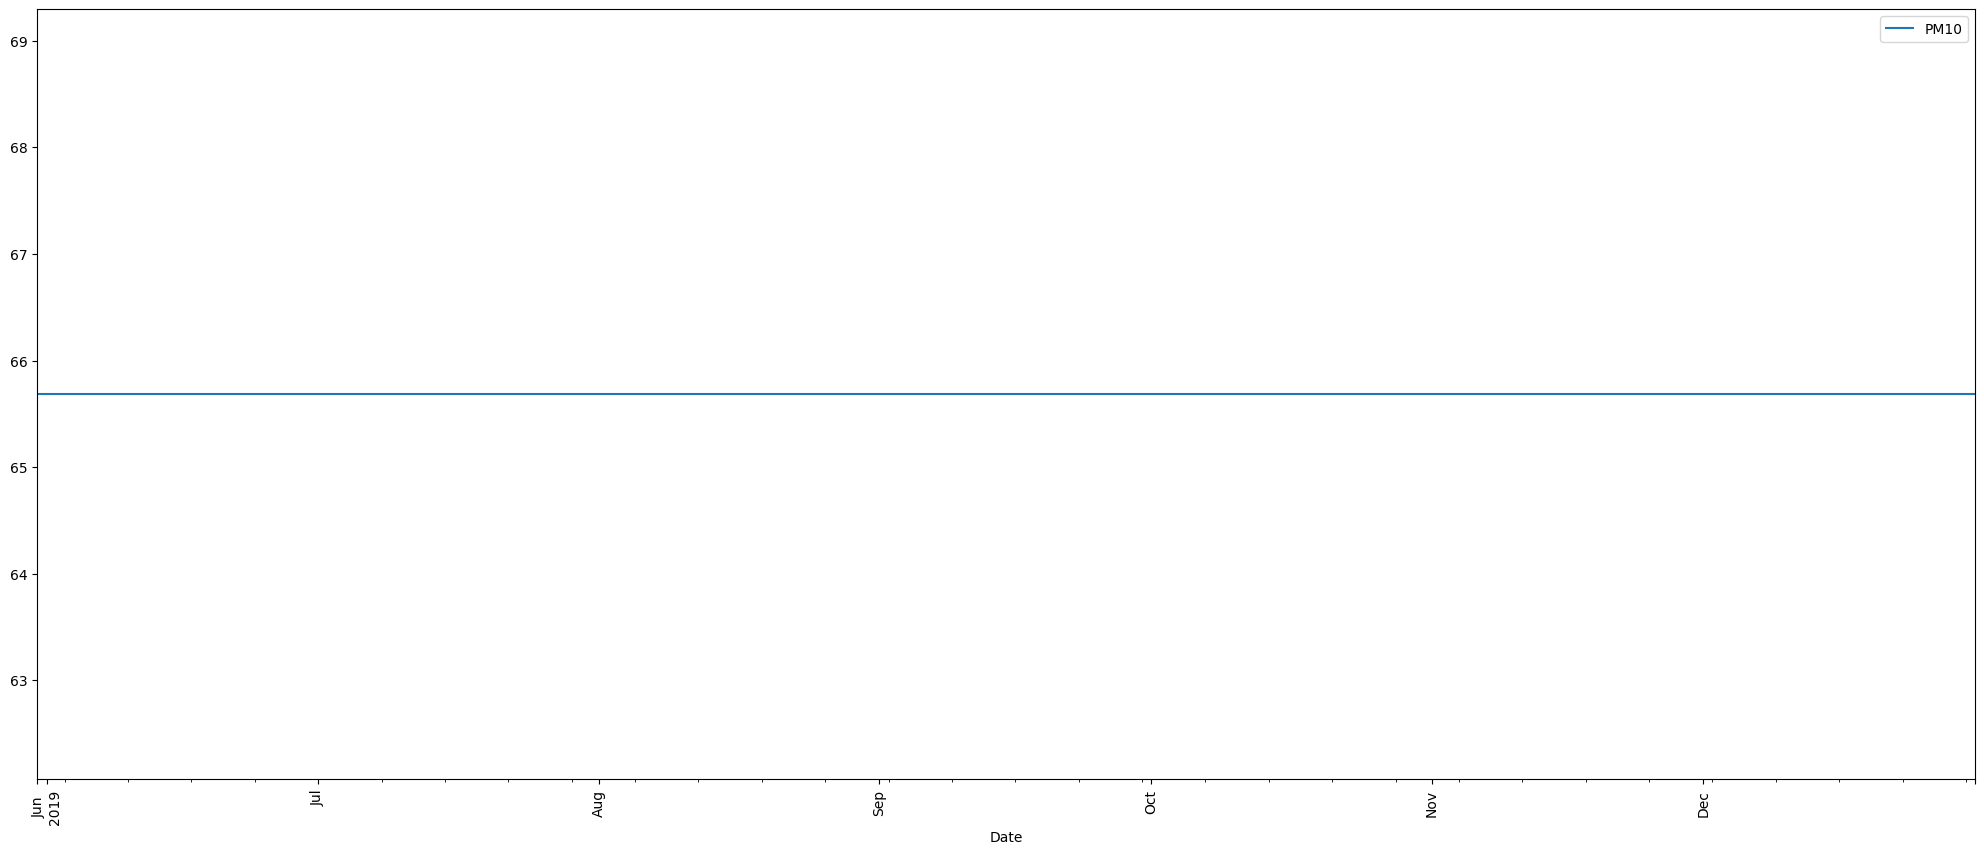

In [61]:
count = 0
for i in range(len(chennai_2019)):
    if (PM10(chennai_2019["PM10"][i]) == chennai_2019["AQI"][i]):
        count = count+1
percent = (count/len(chennai_2019))*100

print ("The highest value of PM10 in the "+str(len(chennai_2019))+
       " days time period was ",chennai_2019["PM10"].loc[chennai_2019['PM10'].idxmax()],
       " recorded on", str(chennai_2019["Date"].loc[chennai_2019['PM10'].idxmax()])[:10],
       '\nand the lowest value was ',chennai_2019["PM10"].loc[chennai_2019['PM10'].idxmin()], 
       " recorded on",str(chennai_2019["Date"].loc[chennai_2019['PM10'].idxmin()])[:10],
       "\nThe average PM10 value was ",str(round(chennai_2019["PM10"].mean(),2)),
       "\nPM10 value had a standard deviation of ",str(round(chennai_2019["PM10"].std(),2)))


a = chennai_2019.plot(x='Date',y='PM10',figsize=(25, 10))
plt.xticks(rotation='vertical')
plt.show()

##### PM10 2020

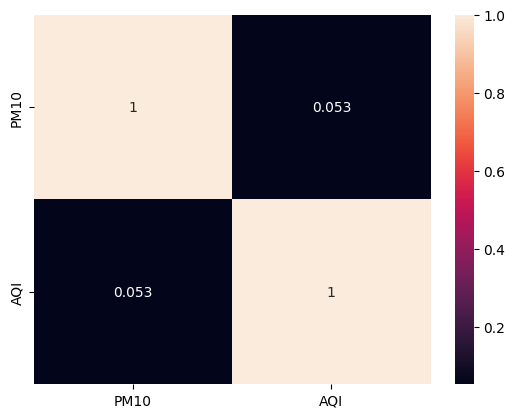

In [62]:
dataplot = sb.heatmap(chennai_2020[['PM10','AQI']].corr(), annot=True)
plt.show()

The highest value of PM10 in the 366 days time period was  213.53  recorded on 2020-11-23 
and the lowest value was  46.69  recorded on 2020-11-24 
The average PM10 value was  66.19 
PM10 value had a standard deviation of  8.74 
In 2020 the number of days PM10 was responsible for the AQI value was:- 0 which is around 0.0%


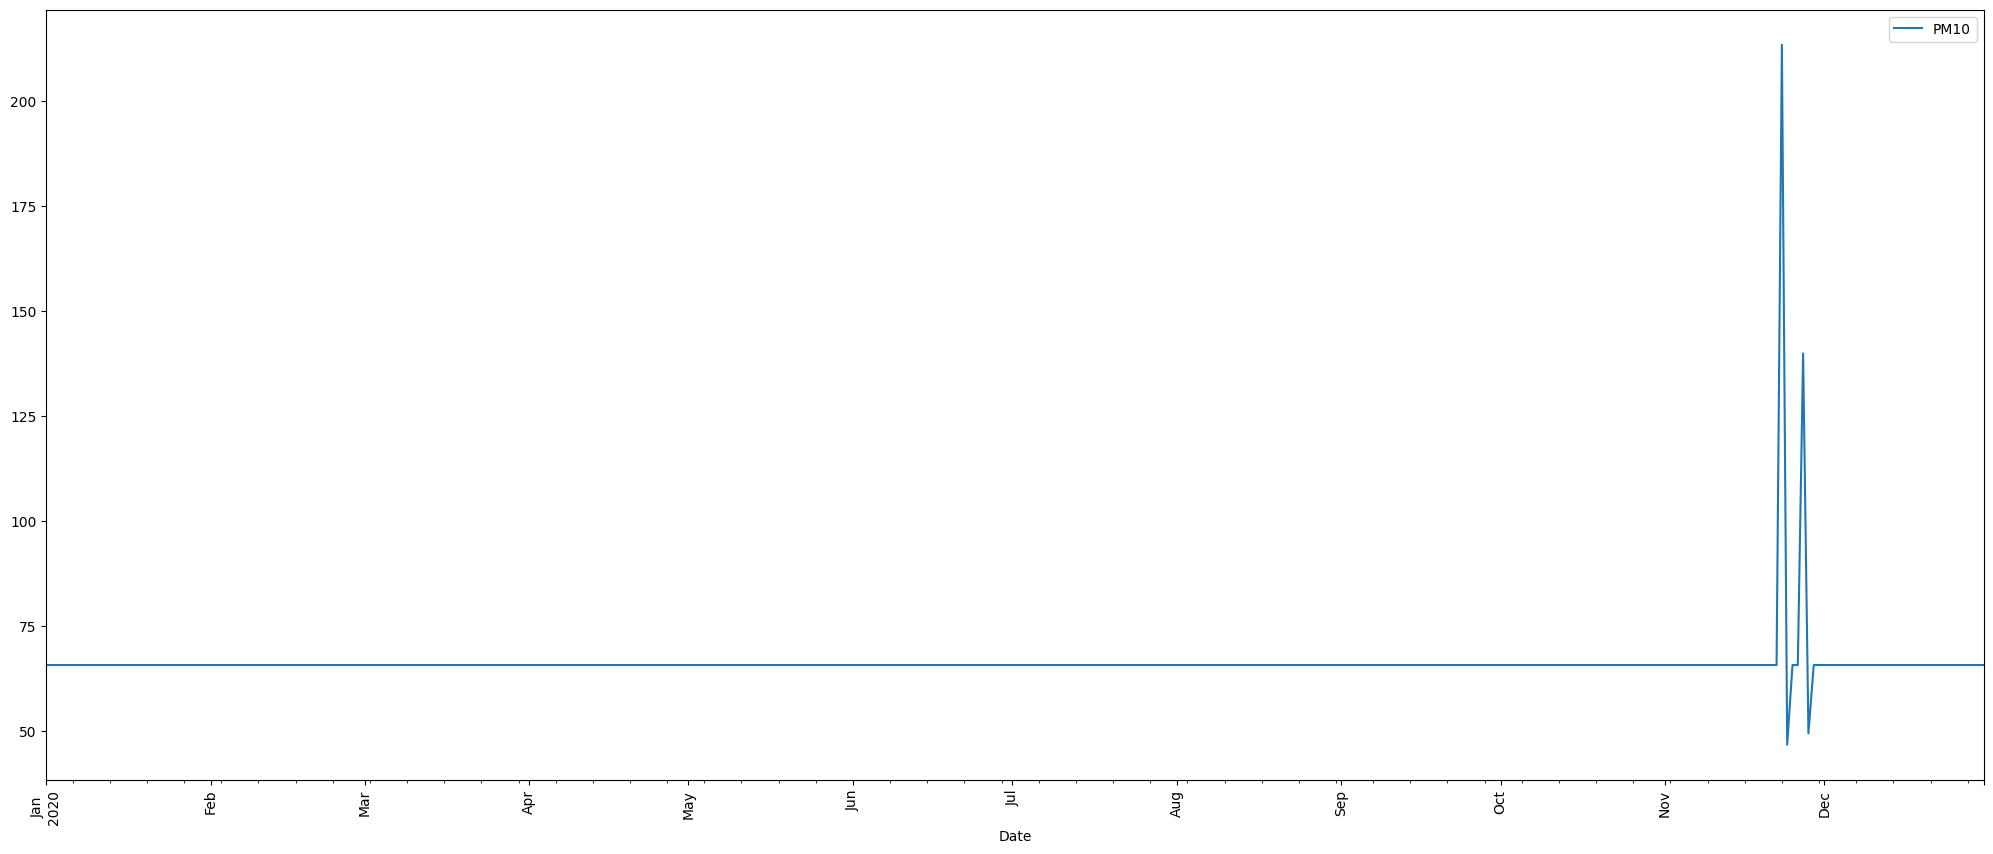

In [63]:
count = 0
for i in range(len(chennai_2020)):
    if (PM10(chennai_2020["PM10"][i]) == chennai_2020["AQI"][i]):
        count = count+1
percent = (count/len(chennai_2020))*100

print ("The highest value of PM10 in the "+str(len(chennai_2020))+
       " days time period was ",chennai_2020["PM10"].loc[chennai_2020['PM10'].idxmax()],
       " recorded on", str(chennai_2020["Date"].loc[chennai_2020['PM10'].idxmax()])[:10],
       '\nand the lowest value was ',chennai_2020["PM10"].loc[chennai_2020['PM10'].idxmin()], 
       " recorded on",str(chennai_2020["Date"].loc[chennai_2020['PM10'].idxmin()])[:10],
       "\nThe average PM10 value was ",str(round(chennai_2020["PM10"].mean(),2)),
       "\nPM10 value had a standard deviation of ",str(round(chennai_2020["PM10"].std(),2)))


a = chennai_2020.plot(x='Date',y='PM10',figsize=(25, 10))
plt.xticks(rotation='vertical')
plt.show()

##### PM10 2021

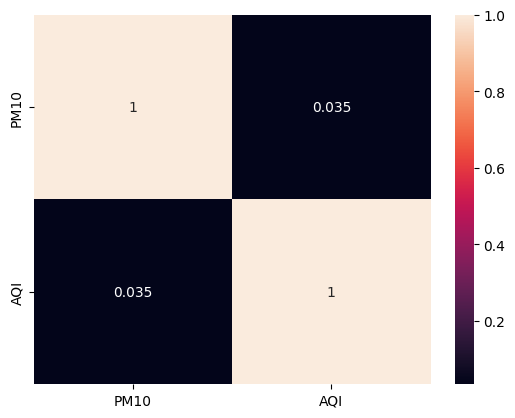

In [64]:
dataplot = sb.heatmap(chennai_2021[['PM10','AQI']].corr(), annot=True)
plt.show()

The highest value of PM10 in the 365 days time period was  189.98  recorded on 2021-03-20 
and the lowest value was  18.99  recorded on 2021-10-03 
The average PM10 value was  58.52 
PM10 value had a standard deviation of  23.72 
In 2021 the number of days PM10 was responsible for the AQI value was:- 0 which is around 0.0%


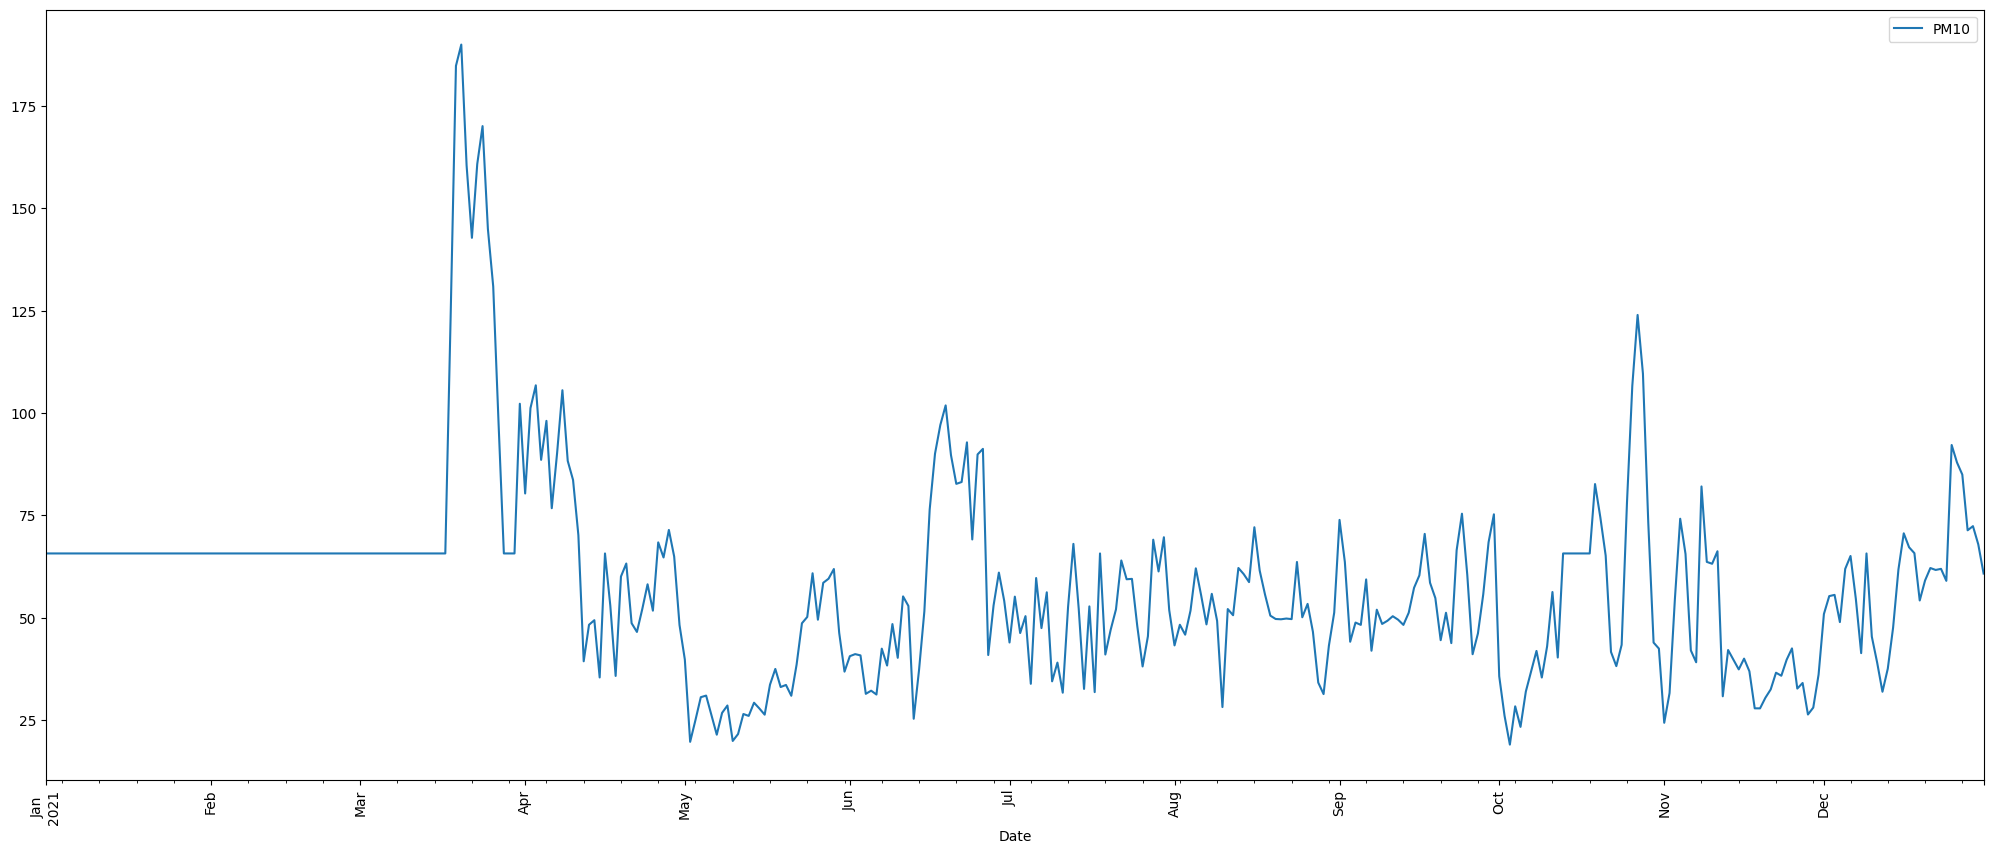

In [65]:
count = 0
for i in range(len(chennai_2021)):
    if (PM10(chennai_2021["PM10"][i]) == chennai_2021["AQI"][i]):
        count = count+1
percent = (count/len(chennai_2021))*100

print ("The highest value of PM10 in the "+str(len(chennai_2021))+
       " days time period was ",chennai_2021["PM10"].loc[chennai_2021['PM10'].idxmax()],
       " recorded on", str(chennai_2021["Date"].loc[chennai_2021['PM10'].idxmax()])[:10],
       '\nand the lowest value was ',chennai_2021["PM10"].loc[chennai_2021['PM10'].idxmin()], 
       " recorded on",str(chennai_2021["Date"].loc[chennai_2021['PM10'].idxmin()])[:10],
       "\nThe average PM10 value was ",str(round(chennai_2021["PM10"].mean(),2)),
       "\nPM10 value had a standard deviation of ",str(round(chennai_2021["PM10"].std(),2)))


a = chennai_2021.plot(x='Date',y='PM10',figsize=(25, 10))
plt.xticks(rotation='vertical')
plt.show()

##### PM10 2022

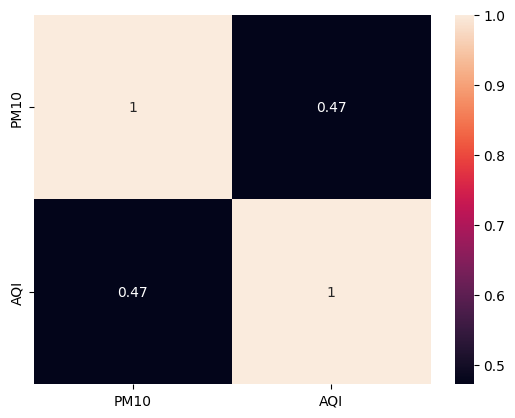

In [66]:
dataplot = sb.heatmap(chennai_2022[['PM10','AQI']].corr(), annot=True)
plt.show()

The highest value of PM10 in the 365 days time period was  316.41  recorded on 2022-08-31 
and the lowest value was  1.97  recorded on 2022-11-20 
The average PM10 value was  65.89 
PM10 value had a standard deviation of  38.73 
In 2022 the number of days PM10 was responsible for the AQI value was:- 0 which is around 0.0%


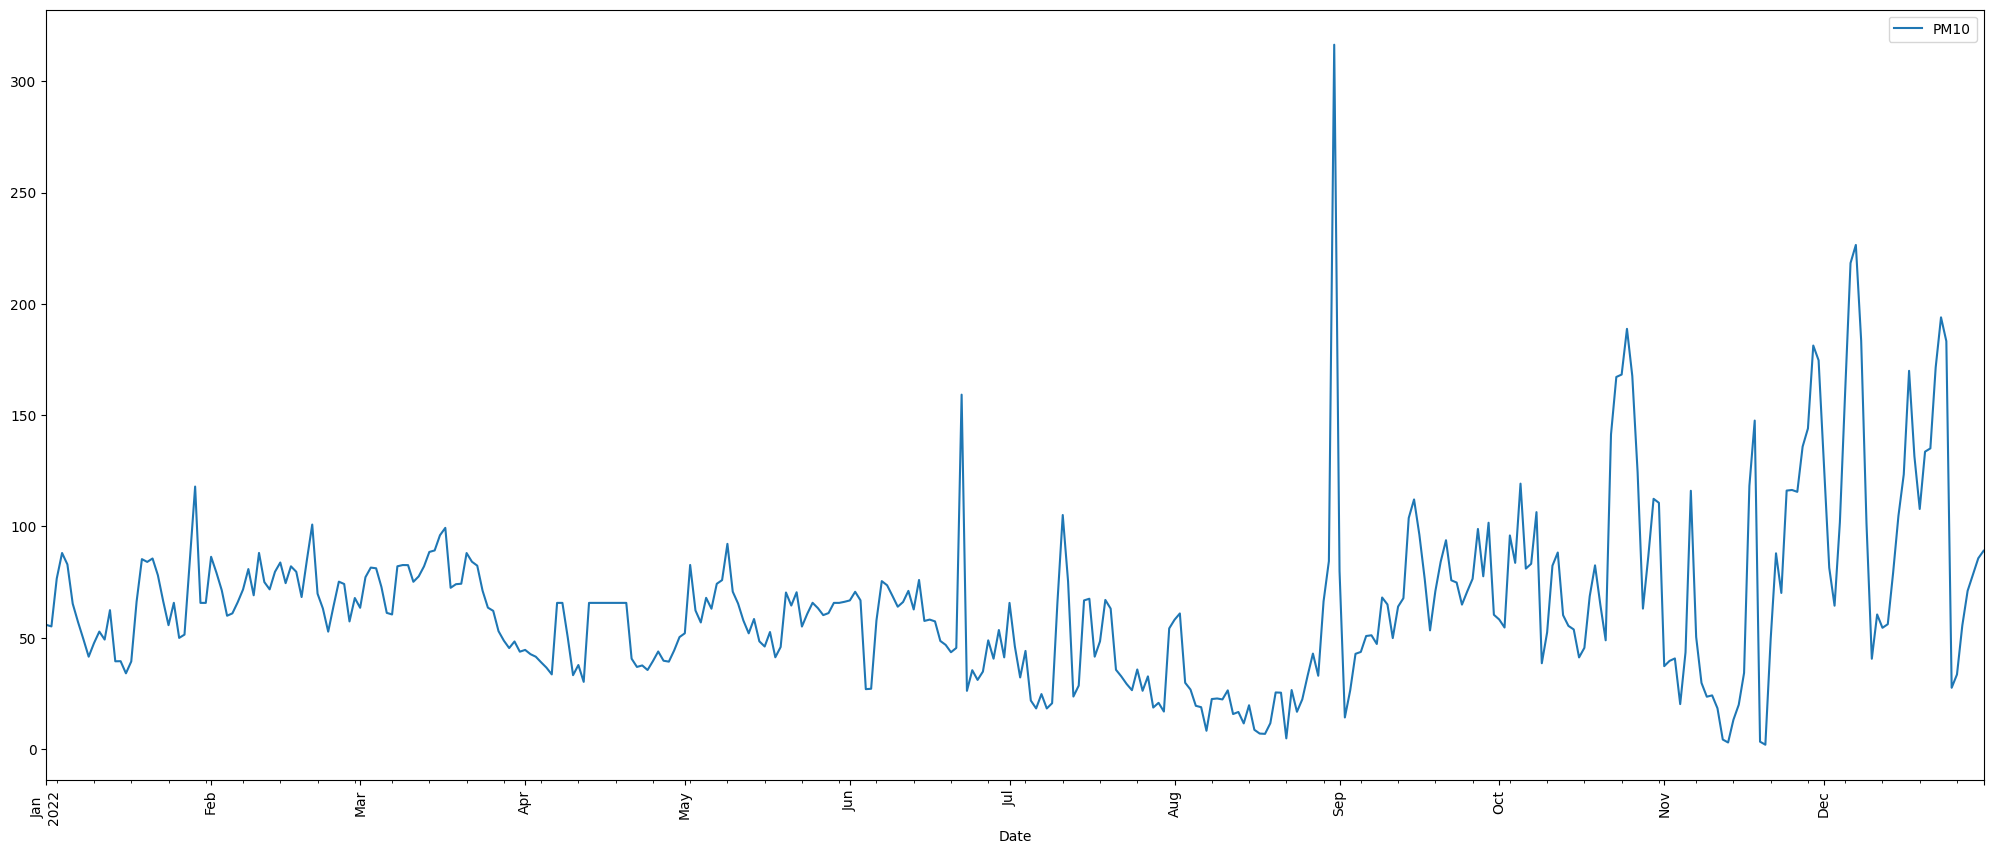

In [67]:
count = 0
for i in range(len(chennai_2022)):
    if (PM10(chennai_2022["PM10"][i]) == chennai_2022["AQI"][i]):
        count = count+1
percent = (count/len(chennai_2022))*100

print ("The highest value of PM10 in the "+str(len(chennai_2022))+
       " days time period was ",chennai_2022["PM10"].loc[chennai_2022['PM10'].idxmax()],
       " recorded on", str(chennai_2022["Date"].loc[chennai_2022['PM10'].idxmax()])[:10],
       '\nand the lowest value was ',chennai_2022["PM10"].loc[chennai_2022['PM10'].idxmin()], 
       " recorded on",str(chennai_2022["Date"].loc[chennai_2022['PM10'].idxmin()])[:10],
       "\nThe average PM10 value was ",str(round(chennai_2022["PM10"].mean(),2)),
       "\nPM10 value had a standard deviation of ",str(round(chennai_2022["PM10"].std(),2)))


a = chennai_2022.plot(x='Date',y='PM10',figsize=(25, 10))
plt.xticks(rotation='vertical')
plt.show()

### Nitrogen Dioxide (NO2)

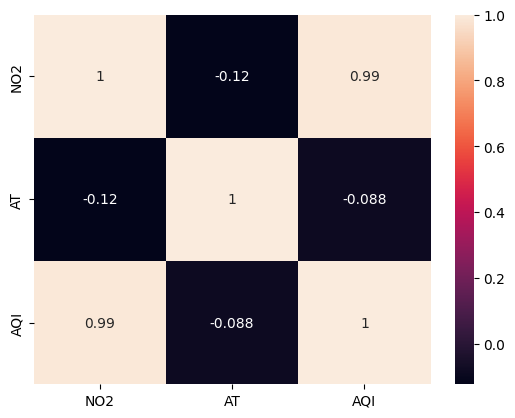

In [68]:
dataplot = sb.heatmap(chennai[['NO2','AT','AQI']].corr(), annot=True)
plt.show()

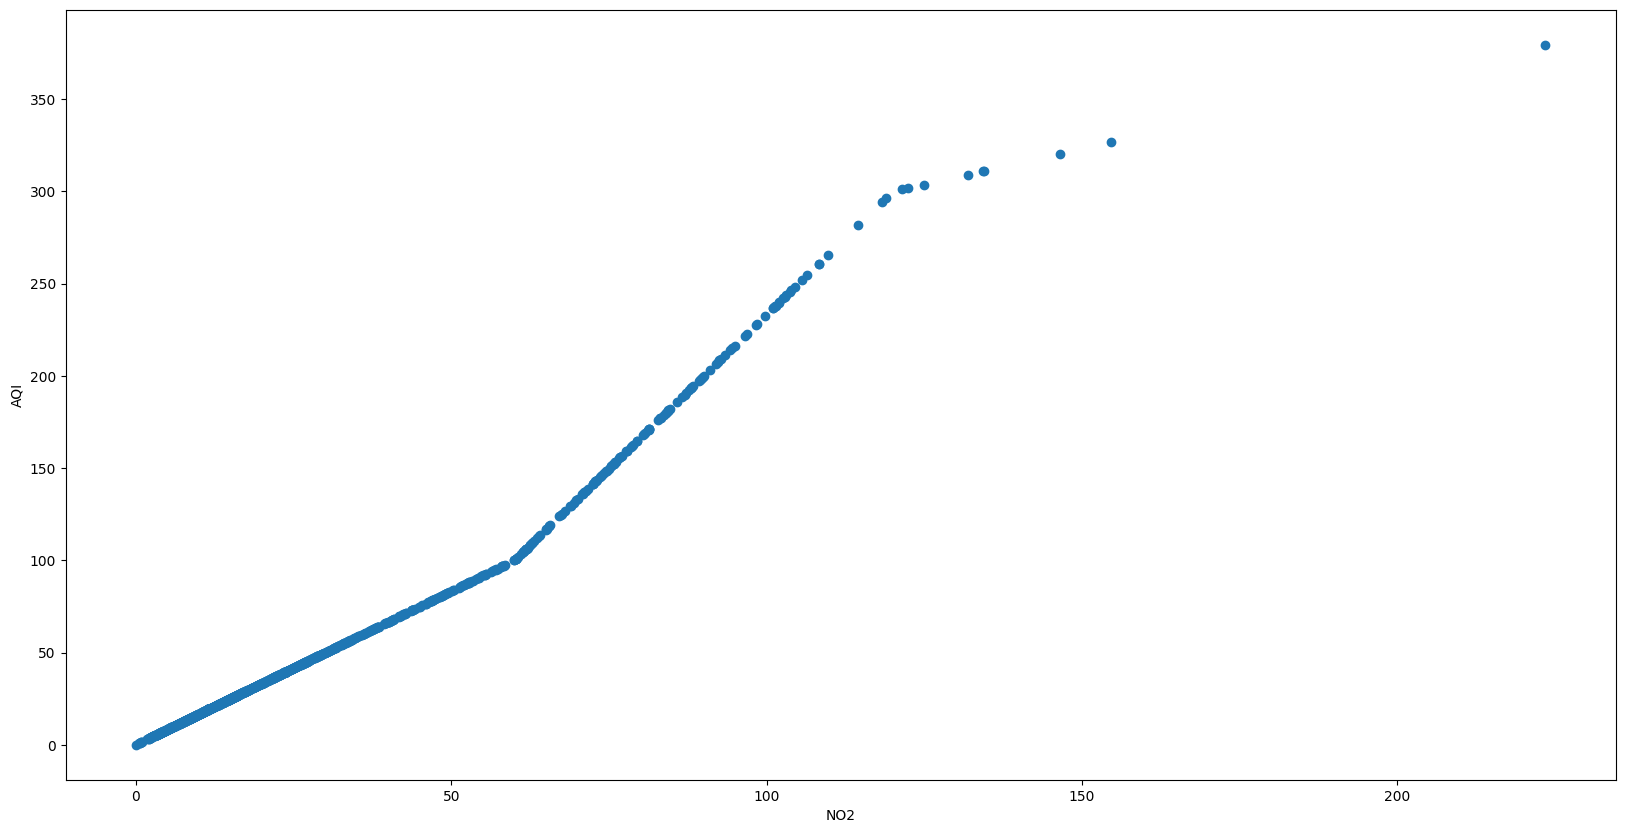

In [69]:
plt.figure(figsize=(20,10))
plt.scatter(x=chennai['NO2'],y=chennai['AQI'])
plt.xlabel("NO2")
plt.ylabel("AQI")
plt.show()

The highest value of NO2 in the 1637 days time period was  223.42  recorded on 2023-05-19 
and the lowest value was  0.02  recorded on 2021-07-09 
The average NO2 value was  23.81 
NO2 value had a standard deviation of  23.78 .
The number of days NO2 was responsible for the AQI value was:- 0 which is around 0.0%


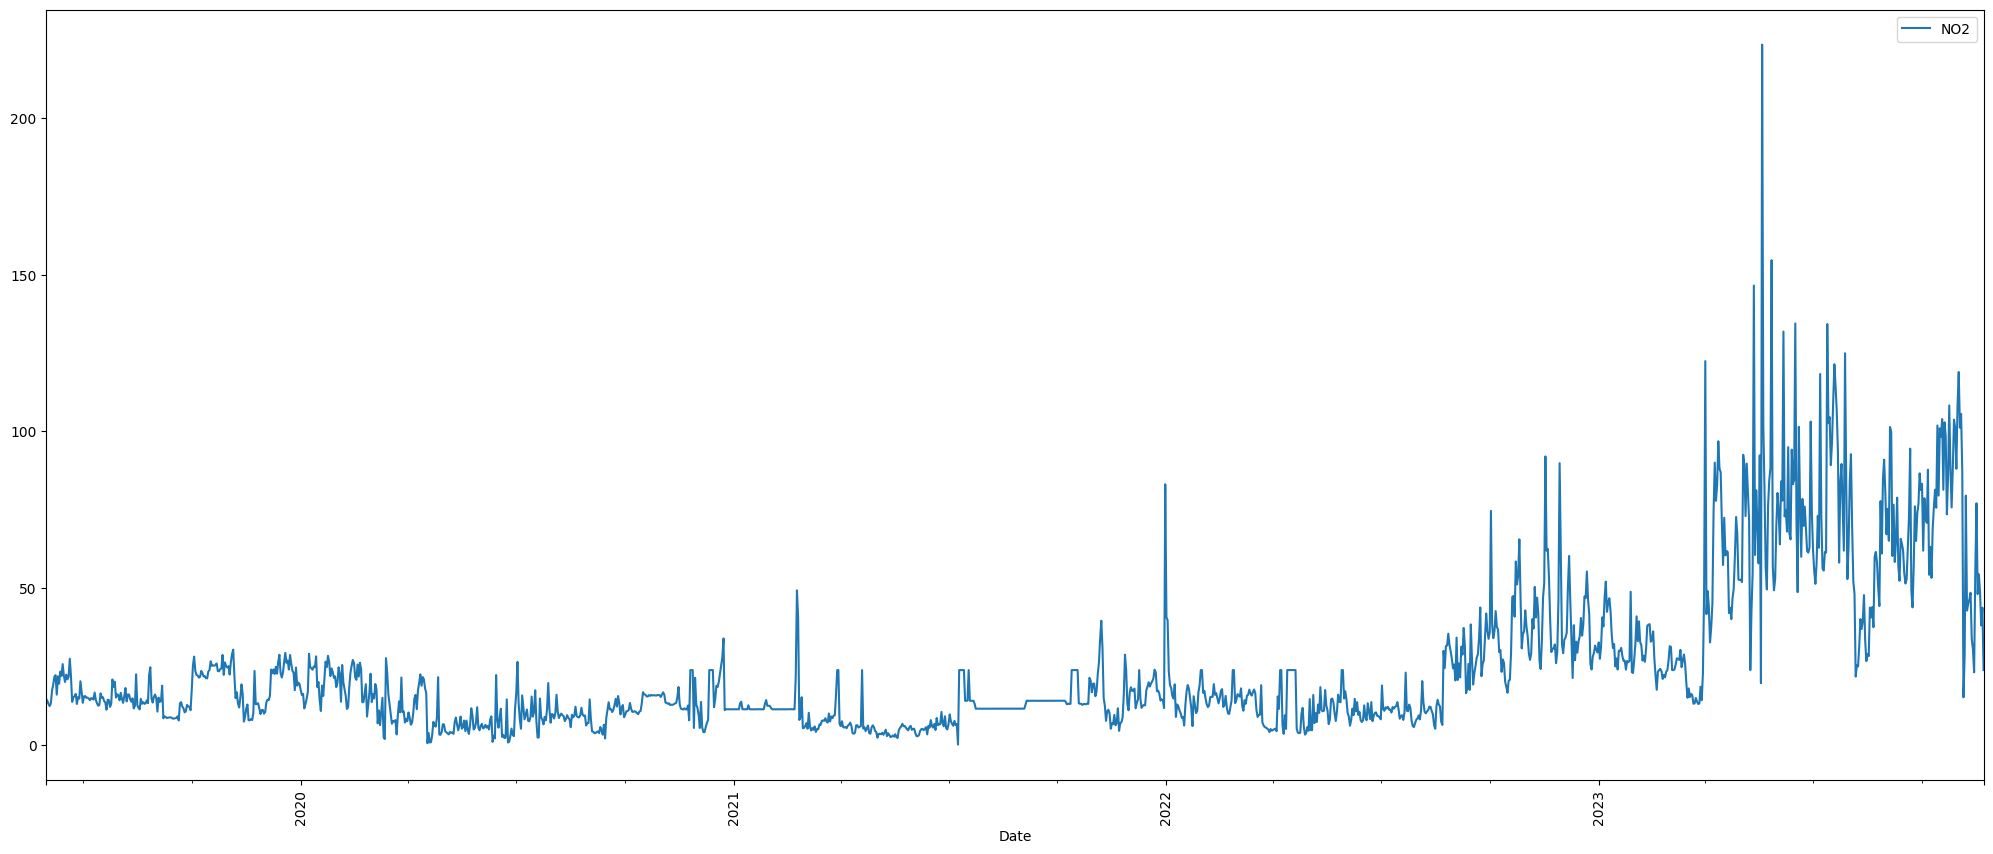

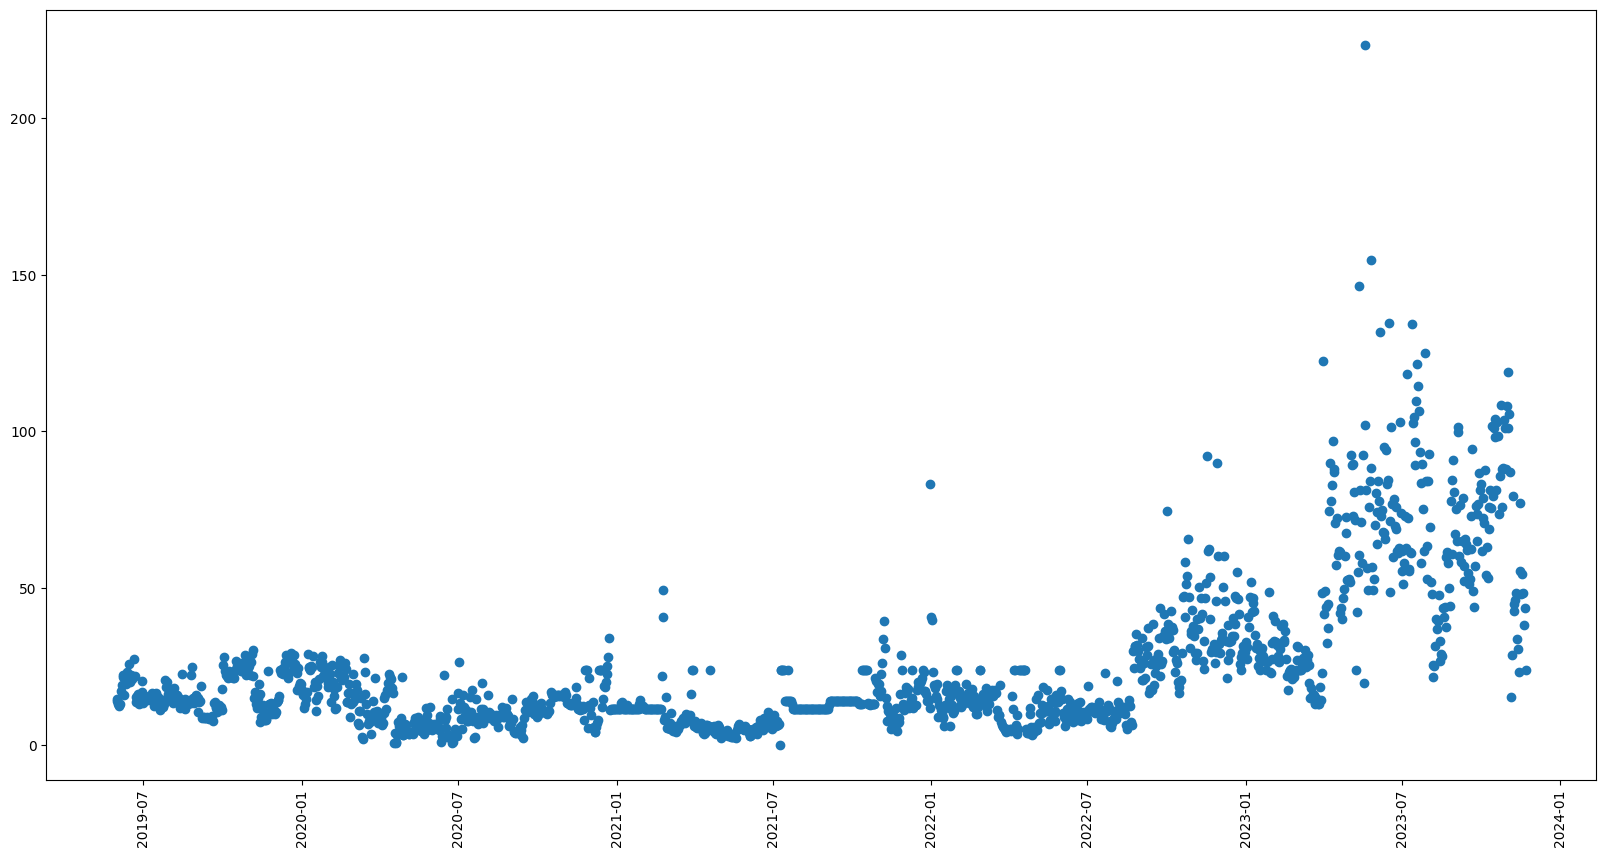

In [70]:
count = 0
for i in range(len(chennai)):
    if (NO2(chennai["NO2"][i]) == chennai["AQI"][i]):
        count = count+1
percent = (count/len(chennai))*100
print ("The highest value of NO2 in the "+str(len(chennai))+
       " days time period was ",chennai["NO2"].loc[chennai['NO2'].idxmax()],
       " recorded on", str(chennai["Date"].loc[chennai['NO2'].idxmax()])[:10],
       '\nand the lowest value was ',chennai["NO2"].loc[chennai['NO2'].idxmin()], 
       " recorded on",str(chennai["Date"].loc[chennai['NO2'].idxmin()])[:10],
       "\nThe average NO2 value was ",str(round(chennai["NO2"].mean(),2)),
       "\nNO2 value had a standard deviation of ",str(round(chennai["NO2"].std(),2)))


a = chennai.plot(x='Date',y='NO2',figsize=(25, 10))
plt.xticks(rotation='vertical')
plt.show()

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.plot_date(chennai['Date'],chennai['NO2'])
plt.xticks(rotation='vertical')
plt.show()

##### NO2 2019

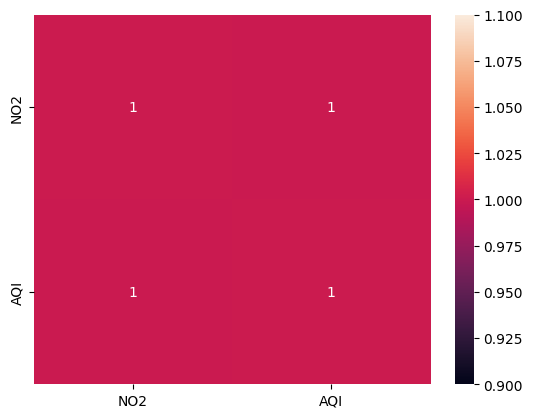

In [71]:
dataplot = sb.heatmap(chennai_2019[['NO2','AQI']].corr(), annot=True)
plt.show()

The highest value of NO2 in the 215 days time period was  30.31  recorded on 2019-11-05 
and the lowest value was  7.36  recorded on 2019-11-14 
The average NO2 value was  17.14 
NO2 value had a standard deviation of  5.77 
In 2019 the number of days NO2 was responsible for the AQI value was:- 0 which is around 0.0%


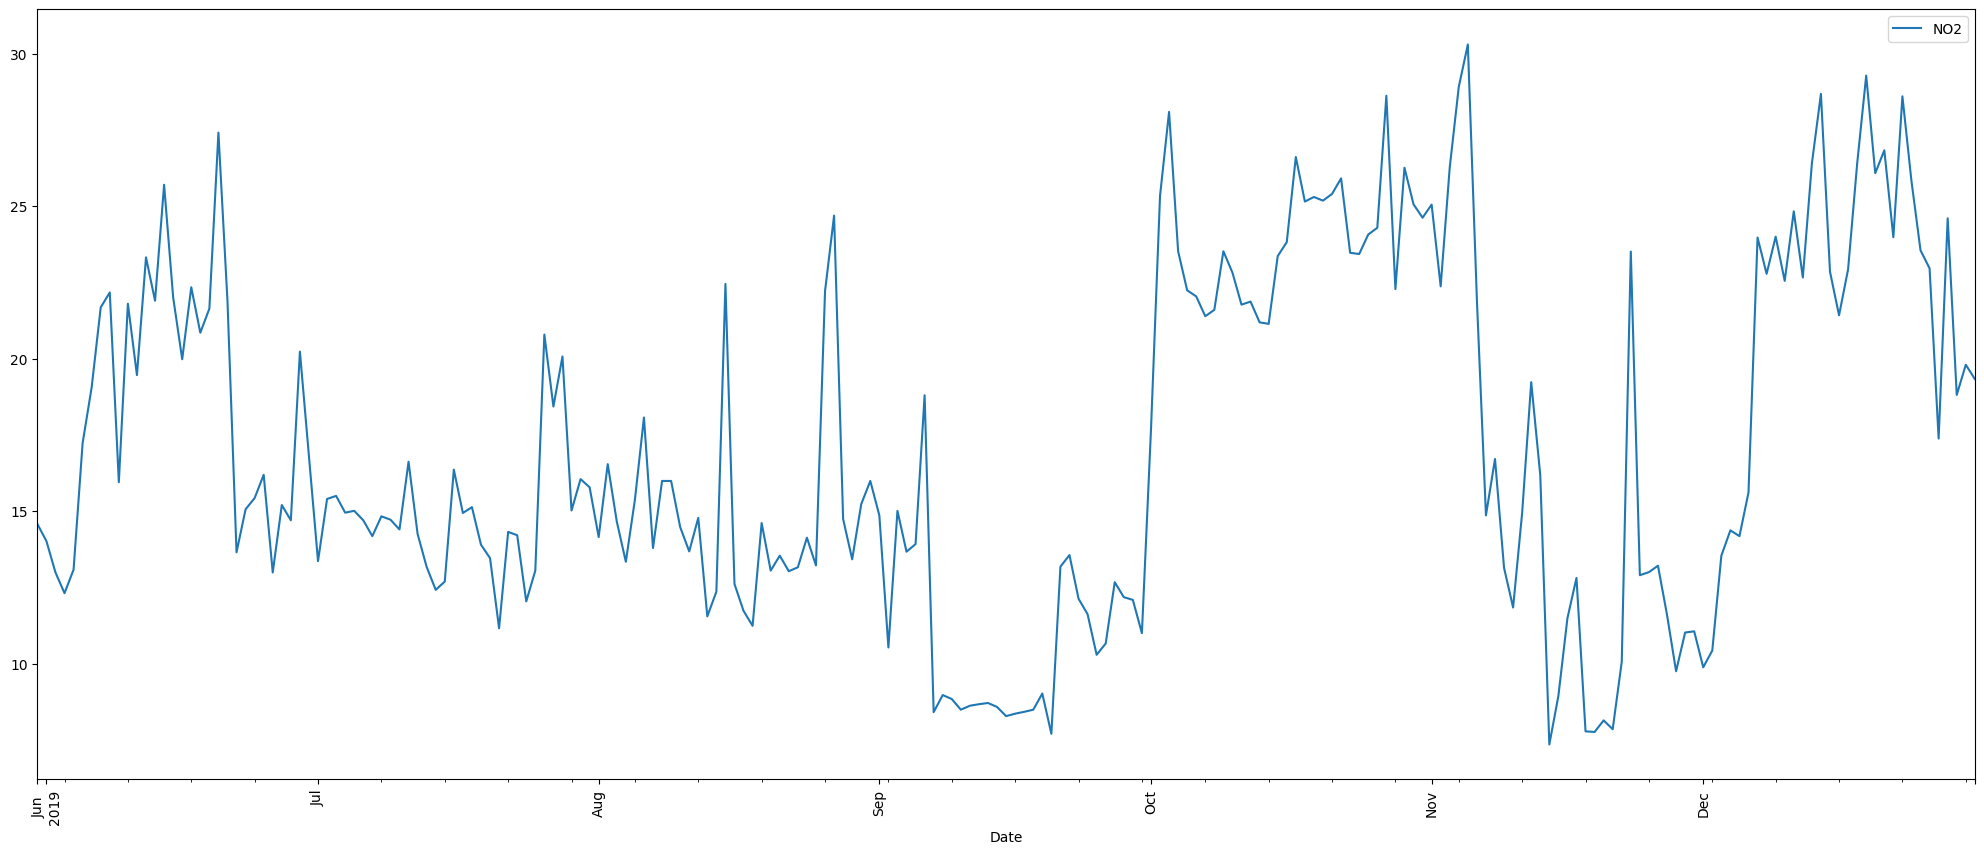

In [72]:
count = 0
for i in range(len(chennai_2019)):
    if (NO2(chennai_2019["NO2"][i]) == chennai_2019["AQI"][i]):
        count = count+1
percent = (count/len(chennai_2019))*100

print ("The highest value of NO2 in the "+str(len(chennai_2019))+
       " days time period was ",chennai_2019["NO2"].loc[chennai_2019['NO2'].idxmax()],
       " recorded on", str(chennai_2019["Date"].loc[chennai_2019['NO2'].idxmax()])[:10],
       '\nand the lowest value was ',chennai_2019["NO2"].loc[chennai_2019['NO2'].idxmin()], 
       " recorded on",str(chennai_2019["Date"].loc[chennai_2019['NO2'].idxmin()])[:10],
       "\nThe average NO2 value was ",str(round(chennai_2019["NO2"].mean(),2)),
       "\nNO2 value had a standard deviation of ",str(round(chennai_2019["NO2"].std(),2)))


a = chennai_2019.plot(x='Date',y='NO2',figsize=(25, 10))
plt.xticks(rotation='vertical')
plt.show()

##### NO2 2020

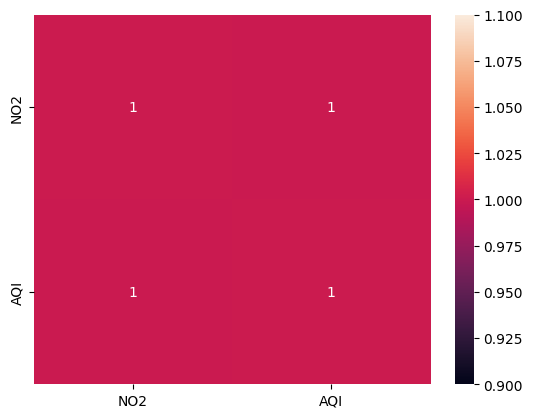

In [73]:
dataplot = sb.heatmap(chennai_2020[['NO2','AQI']].corr(), annot=True)
plt.show()

The highest value of NO2 in the 366 days time period was  33.9  recorded on 2020-12-23 
and the lowest value was  0.45  recorded on 2020-04-17 
The average NO2 value was  12.03 
NO2 value had a standard deviation of  6.67 
In 2020 the number of days NO2 was responsible for the AQI value was:- 0 which is around 0.0%


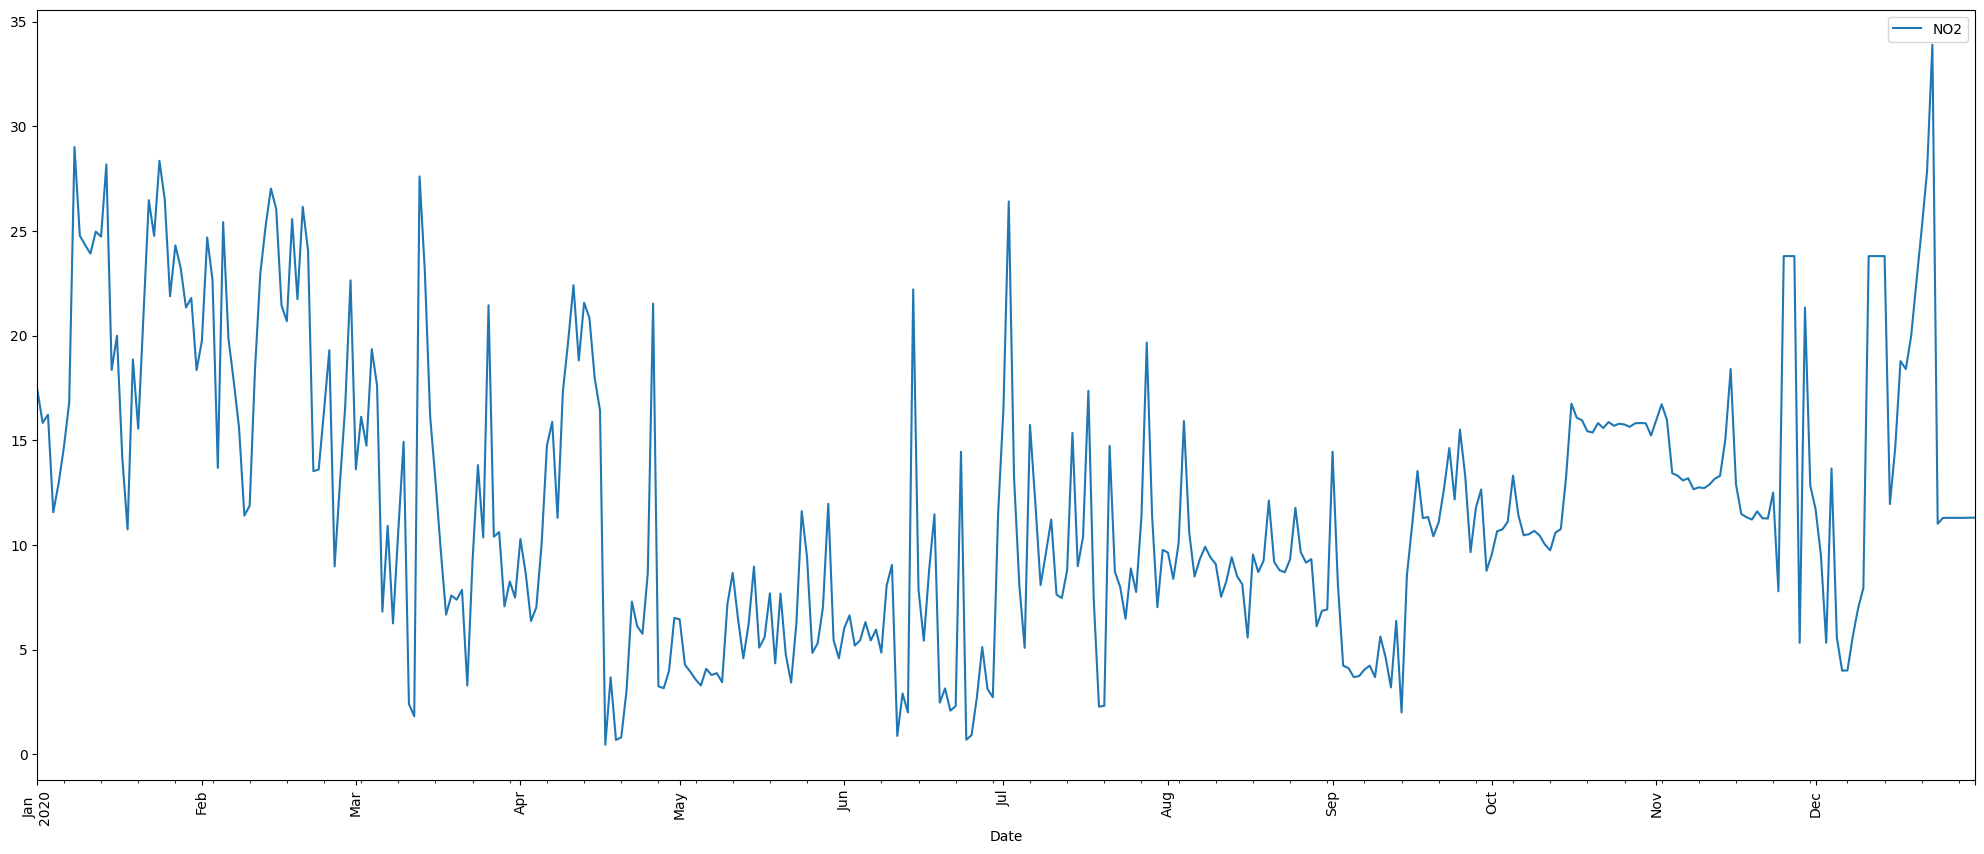

In [74]:
count = 0
for i in range(len(chennai_2020)):
    if (NO2(chennai_2020["NO2"][i]) == chennai_2020["AQI"][i]):
        count = count+1
percent = (count/len(chennai_2020))*100

print ("The highest value of NO2 in the "+str(len(chennai_2020))+
       " days time period was ",chennai_2020["NO2"].loc[chennai_2020['NO2'].idxmax()],
       " recorded on", str(chennai_2020["Date"].loc[chennai_2020['NO2'].idxmax()])[:10],
       '\nand the lowest value was ',chennai_2020["NO2"].loc[chennai_2020['NO2'].idxmin()], 
       " recorded on",str(chennai_2020["Date"].loc[chennai_2020['NO2'].idxmin()])[:10],
       "\nThe average NO2 value was ",str(round(chennai_2020["NO2"].mean(),2)),
       "\nNO2 value had a standard deviation of ",str(round(chennai_2020["NO2"].std(),2)))


a = chennai_2020.plot(x='Date',y='NO2',figsize=(25, 10))
plt.xticks(rotation='vertical')
plt.show()

##### NO2 2021

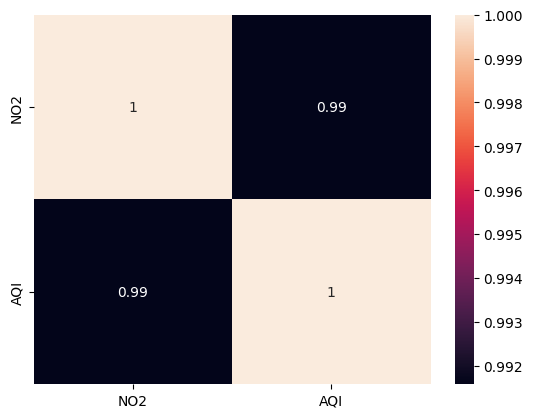

In [75]:
dataplot = sb.heatmap(chennai_2021[['NO2','AQI']].corr(), annot=True)
plt.show()

The highest value of NO2 in the 365 days time period was  83.09  recorded on 2021-12-31 
and the lowest value was  0.02  recorded on 2021-07-09 
The average NO2 value was  11.45 
NO2 value had a standard deviation of  7.32 
In 2021 the number of days NO2 was responsible for the AQI value was:- 0 which is around 0.0%


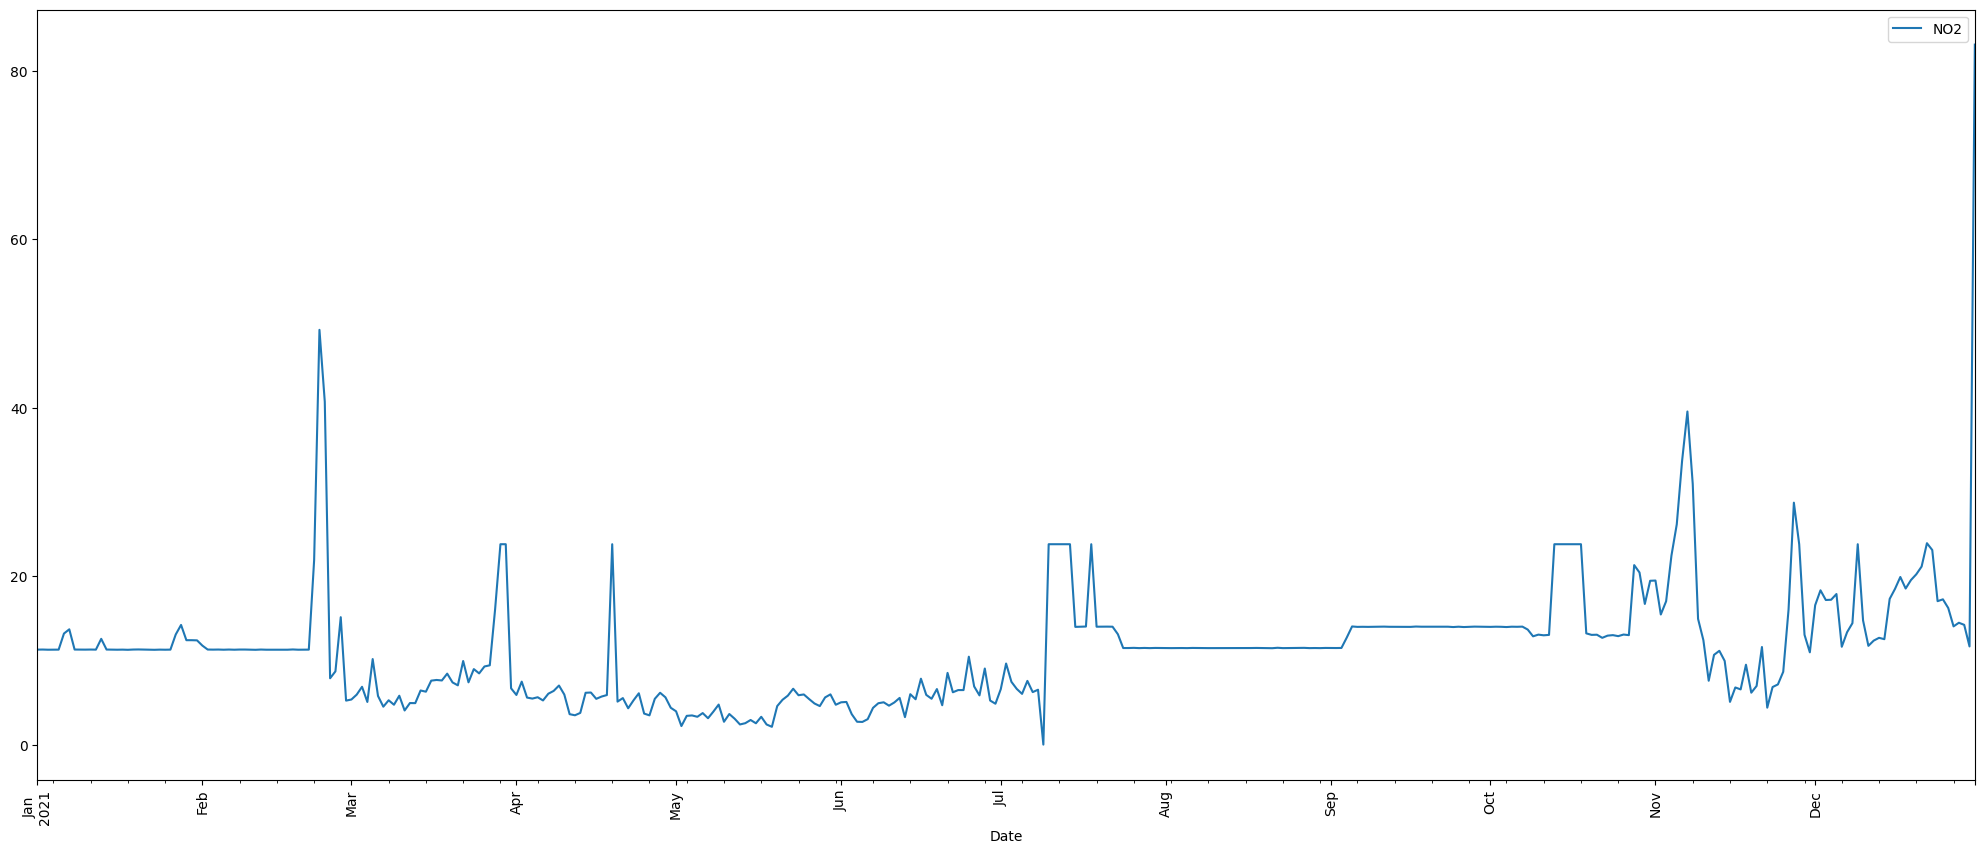

In [76]:
count = 0
for i in range(len(chennai_2021)):
    if (NO2(chennai_2021["NO2"][i]) == chennai_2021["AQI"][i]):
        count = count+1
percent = (count/len(chennai_2021))*100

print ("The highest value of NO2 in the "+str(len(chennai_2021))+
       " days time period was ",chennai_2021["NO2"].loc[chennai_2021['NO2'].idxmax()],
       " recorded on", str(chennai_2021["Date"].loc[chennai_2021['NO2'].idxmax()])[:10],
       '\nand the lowest value was ',chennai_2021["NO2"].loc[chennai_2021['NO2'].idxmin()], 
       " recorded on",str(chennai_2021["Date"].loc[chennai_2021['NO2'].idxmin()])[:10],
       "\nThe average NO2 value was ",str(round(chennai_2021["NO2"].mean(),2)),
       "\nNO2 value had a standard deviation of ",str(round(chennai_2021["NO2"].std(),2)))


a = chennai_2021.plot(x='Date',y='NO2',figsize=(25, 10))
plt.xticks(rotation='vertical')
plt.show()

##### NO2 2022

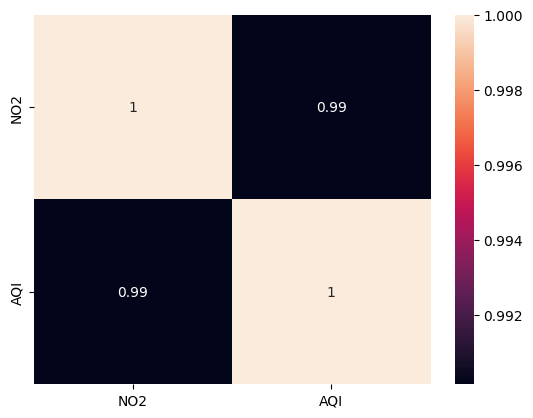

In [77]:
dataplot = sb.heatmap(chennai_2022[['NO2','AQI']].corr(), annot=True)
plt.show()

The highest value of NO2 in the 365 days time period was  91.99  recorded on 2022-11-17 
and the lowest value was  3.21  recorded on 2022-04-28 
The average NO2 value was  20.73 
NO2 value had a standard deviation of  14.35 
In 2022 the number of days NO2 was responsible for the AQI value was:- 0 which is around 0.0%


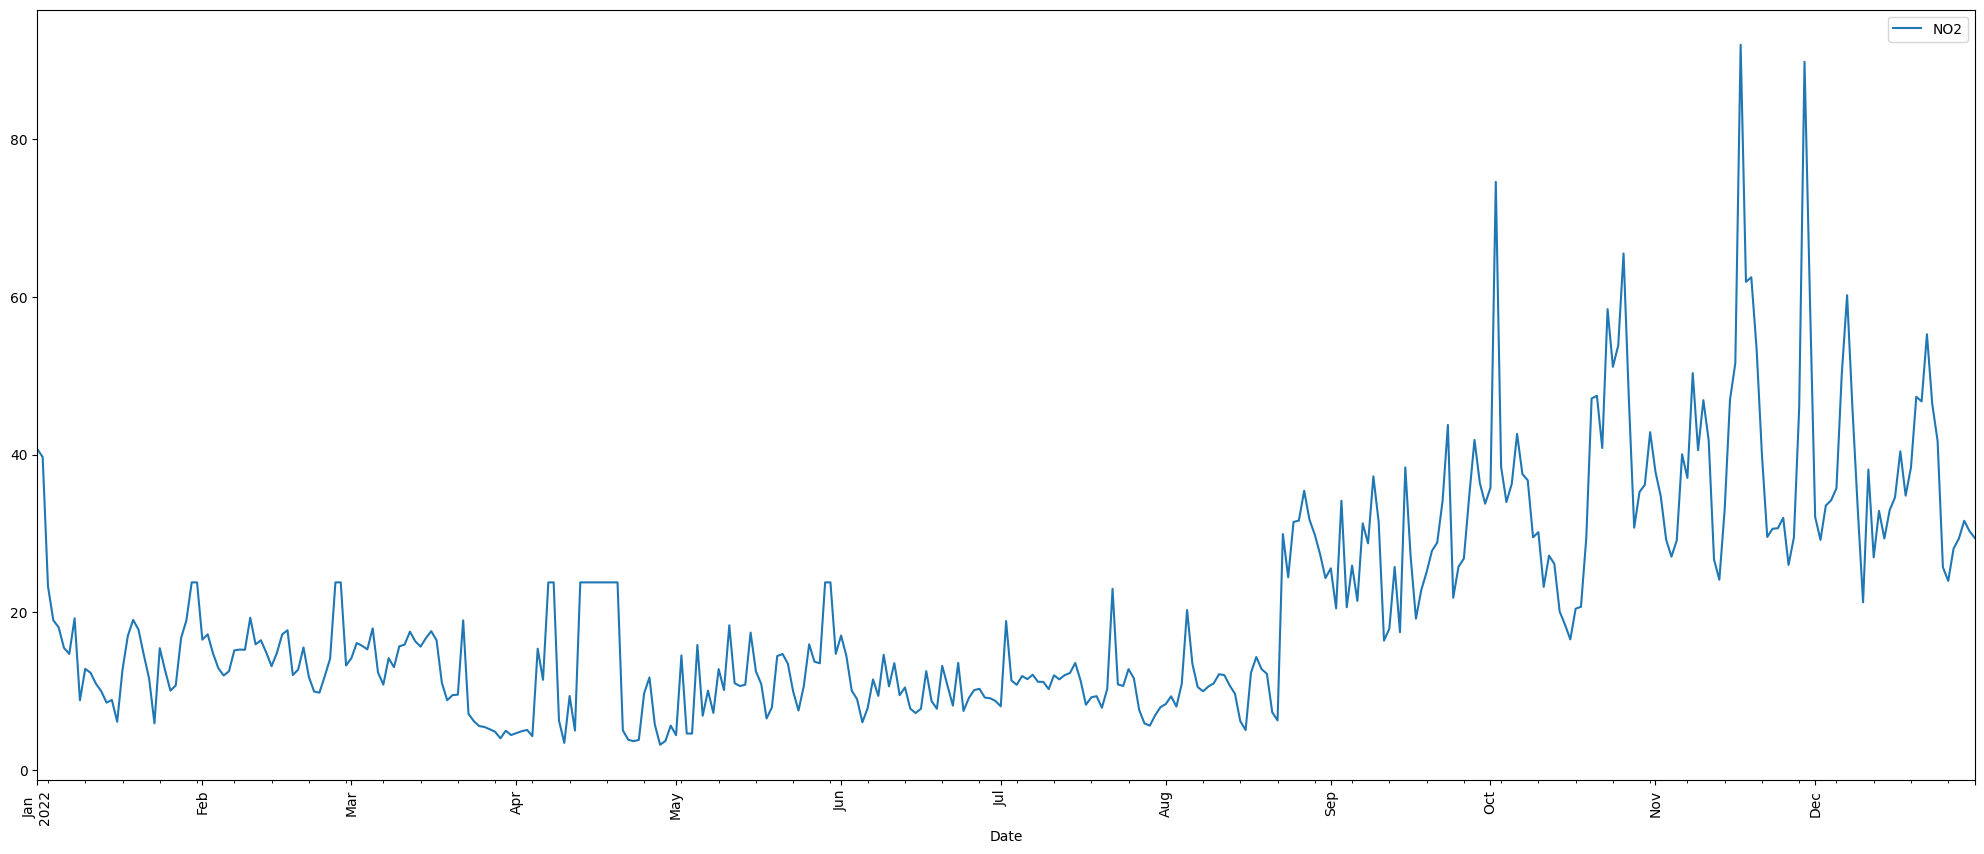

In [78]:
count = 0
for i in range(len(chennai_2022)):
    if (NO2(chennai_2022["NO2"][i]) == chennai_2022["AQI"][i]):
        count = count+1
percent = (count/len(chennai_2022))*100

print ("The highest value of NO2 in the "+str(len(chennai_2022))+
       " days time period was ",chennai_2022["NO2"].loc[chennai_2022['NO2'].idxmax()],
       " recorded on", str(chennai_2022["Date"].loc[chennai_2022['NO2'].idxmax()])[:10],
       '\nand the lowest value was ',chennai_2022["NO2"].loc[chennai_2022['NO2'].idxmin()], 
       " recorded on",str(chennai_2022["Date"].loc[chennai_2022['NO2'].idxmin()])[:10],
       "\nThe average NO2 value was ",str(round(chennai_2022["NO2"].mean(),2)),
       "\nNO2 value had a standard deviation of ",str(round(chennai_2022["NO2"].std(),2)))


a = chennai_2022.plot(x='Date',y='NO2',figsize=(25, 10))
plt.xticks(rotation='vertical')
plt.show()

### Ammonia (NH3)

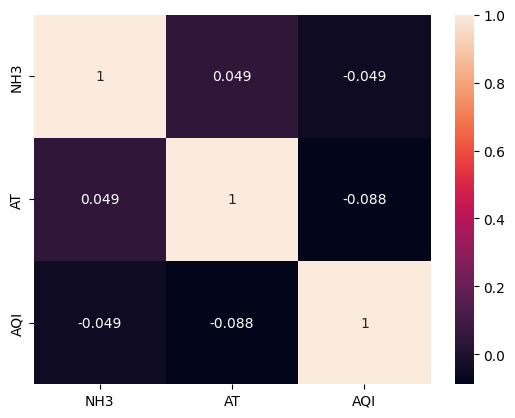

In [79]:
dataplot = sb.heatmap(chennai[['NH3','AT','AQI']].corr(), annot=True)
plt.show()

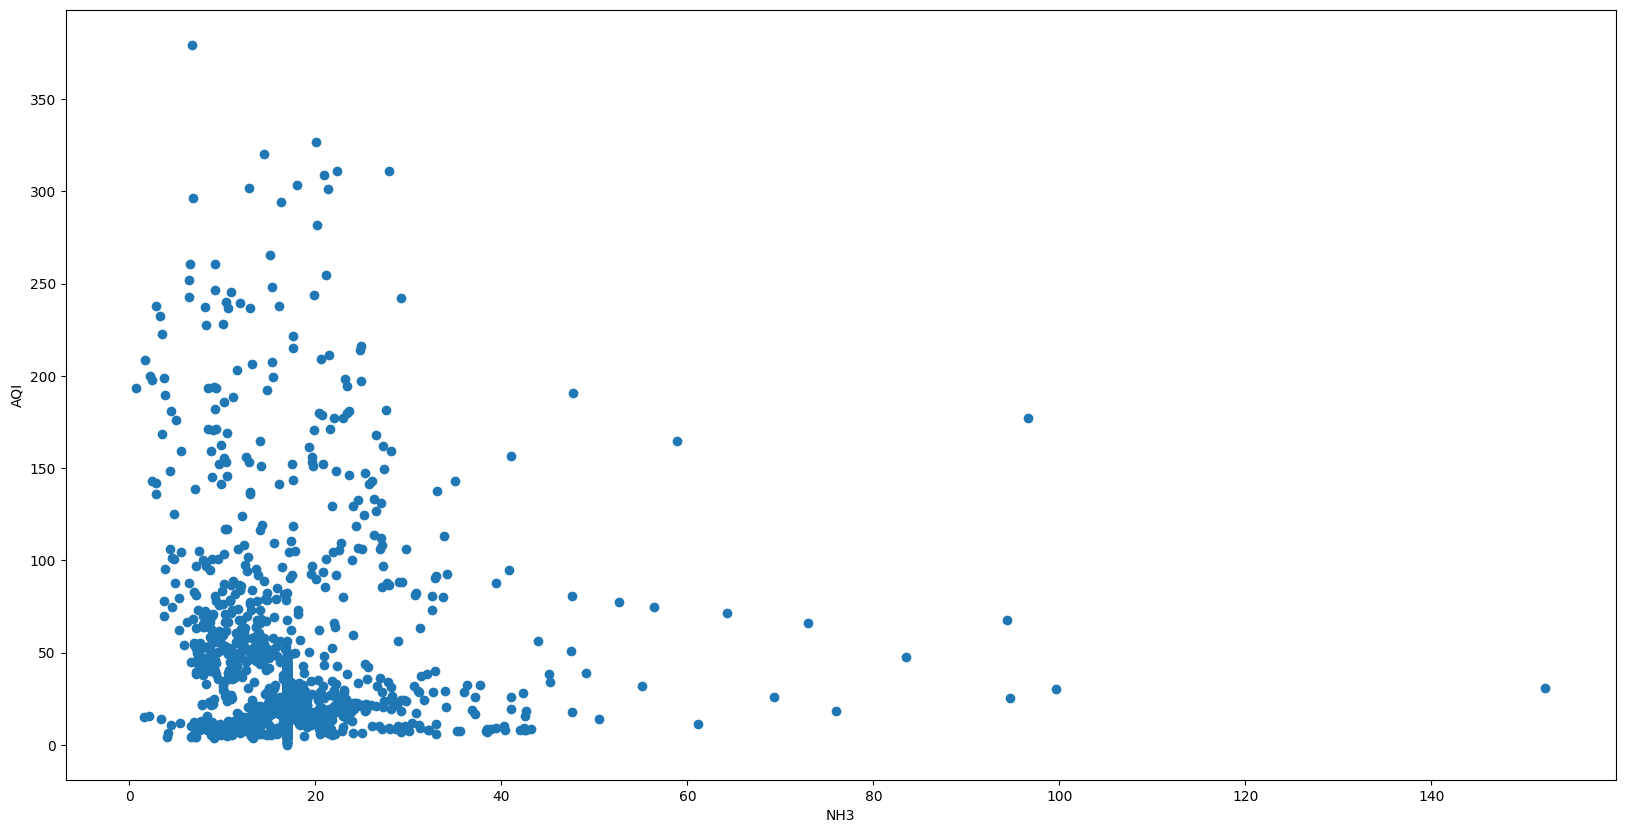

In [80]:
plt.figure(figsize=(20,10))
plt.scatter(x=chennai['NH3'],y=chennai['AQI'])
plt.xlabel("NH3")
plt.ylabel("AQI")
plt.show()

The highest value of NH3 in the 1637 days time period was  152.25  recorded on 2022-05-11 
and the lowest value was  0.72  recorded on 2023-04-13 
The average NH3 value was  17.36 
NH3 value had a standard deviation of  8.93 .
The number of days NH3 was responsible for the AQI value was:- 0 which is around 0.0%


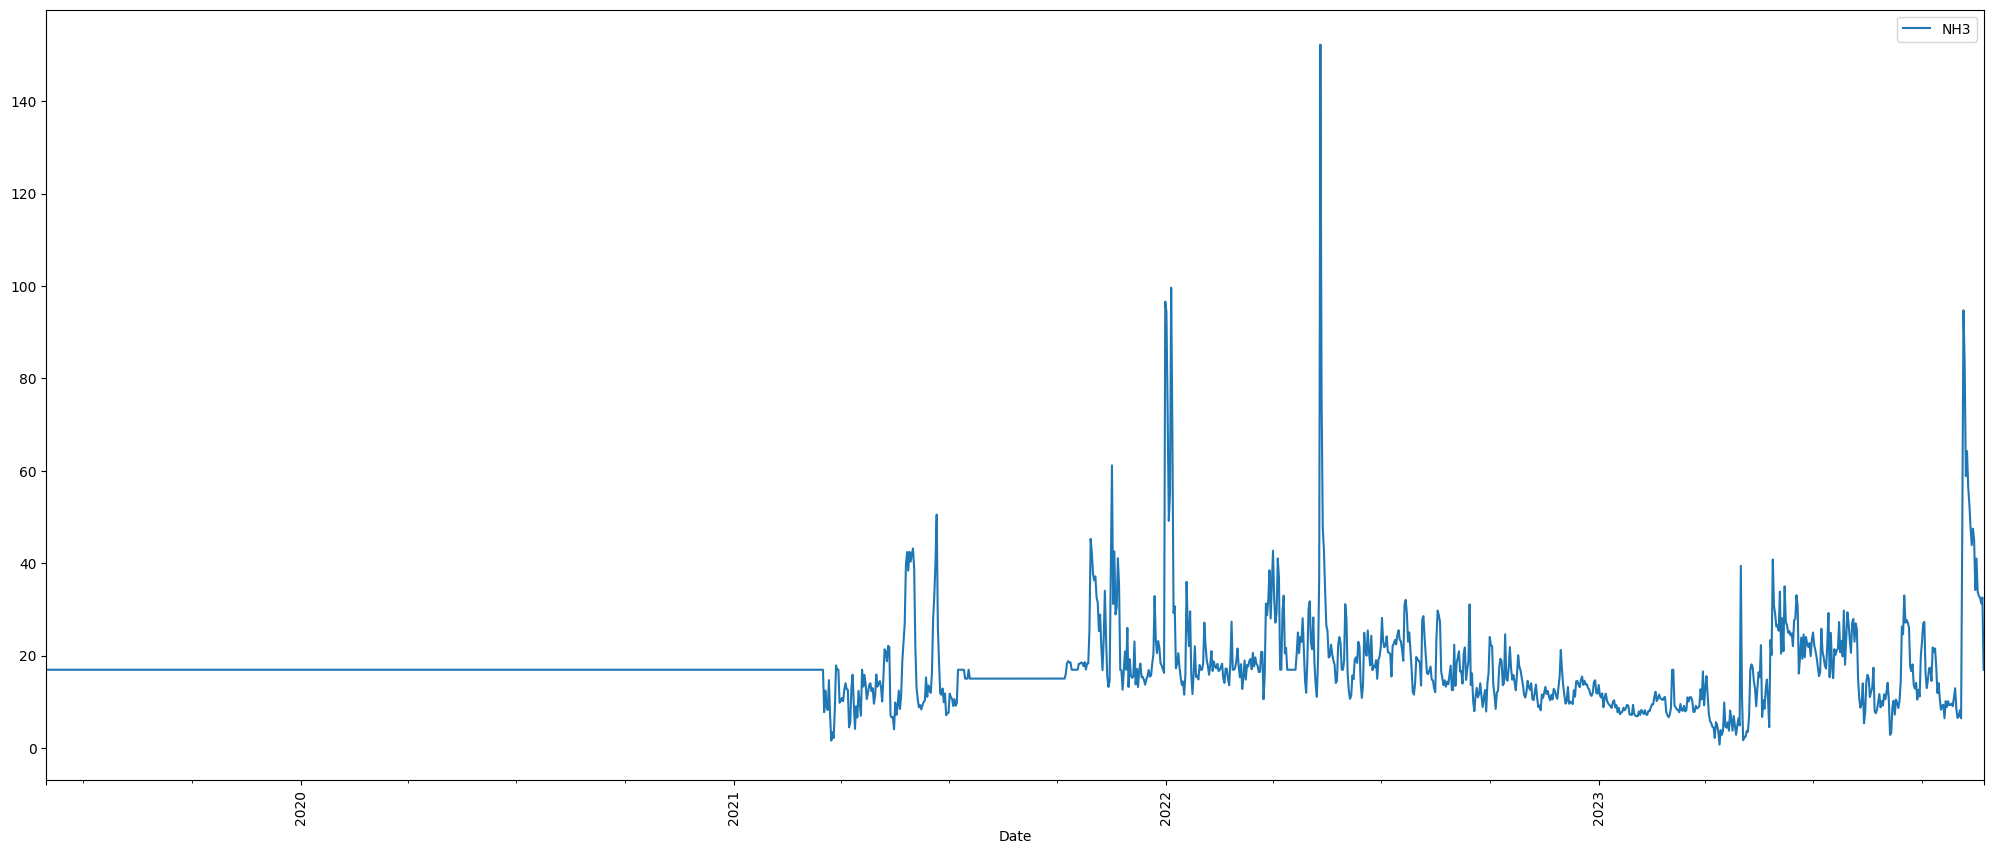

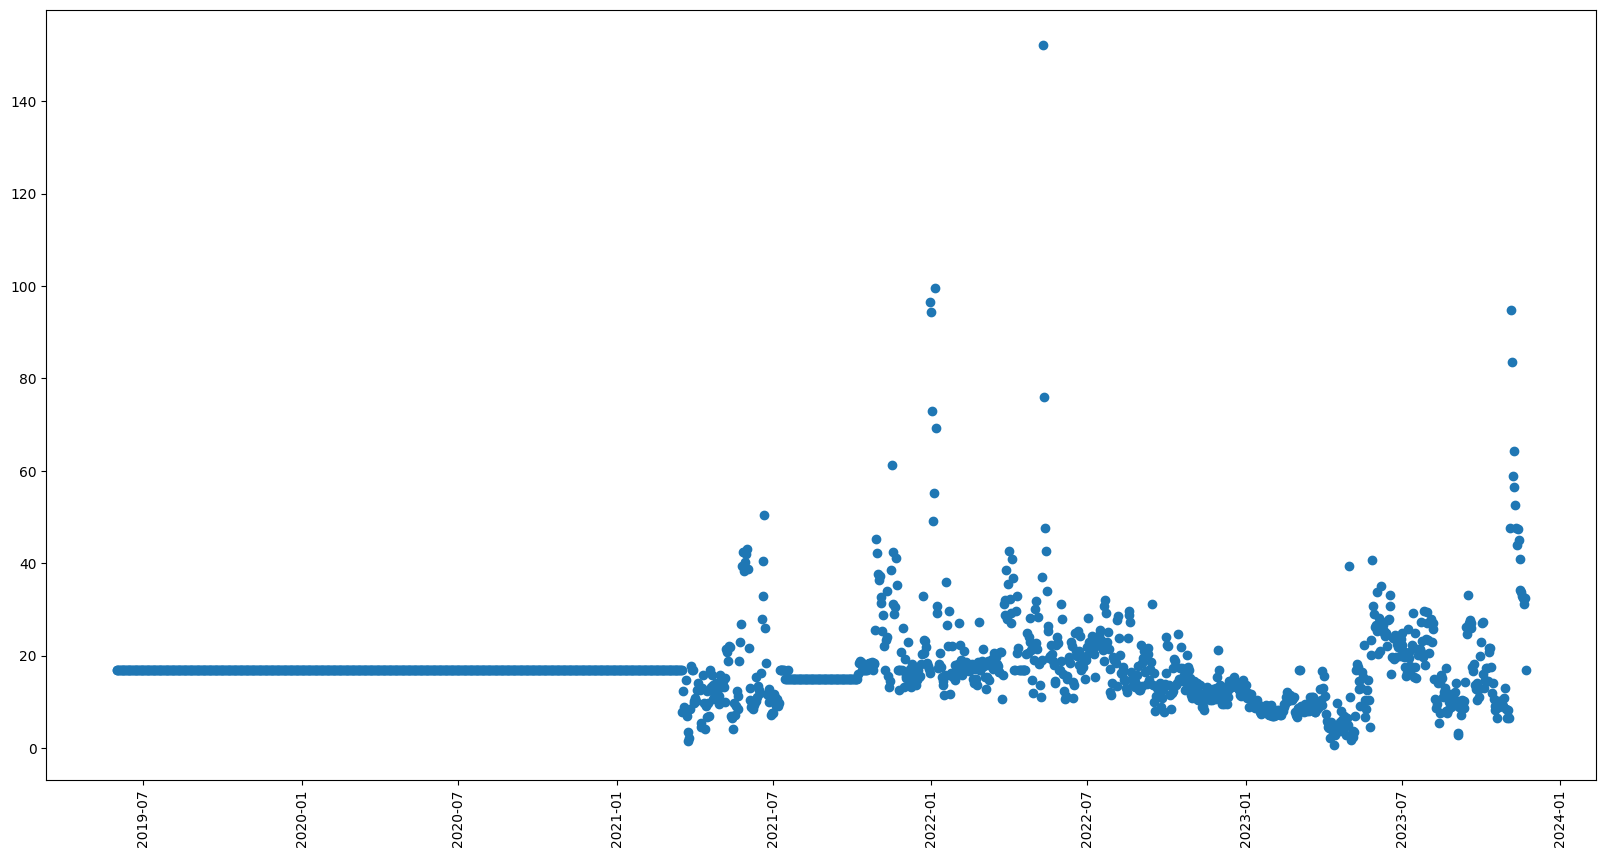

In [81]:
count = 0
for i in range(len(chennai)):
    if (NH3(chennai["NH3"][i]) == chennai["AQI"][i]):
        count = count+1
percent = (count/len(chennai))*100
print ("The highest value of NH3 in the "+str(len(chennai))+
       " days time period was ",chennai["NH3"].loc[chennai['NH3'].idxmax()],
       " recorded on", str(chennai["Date"].loc[chennai['NH3'].idxmax()])[:10],
       '\nand the lowest value was ',chennai["NH3"].loc[chennai['NH3'].idxmin()], 
       " recorded on",str(chennai["Date"].loc[chennai['NH3'].idxmin()])[:10],
       "\nThe average NH3 value was ",str(round(chennai["NH3"].mean(),2)),
       "\nNH3 value had a standard deviation of ",str(round(chennai["NH3"].std(),2)))


a = chennai.plot(x='Date',y='NH3',figsize=(25, 10))
plt.xticks(rotation='vertical')
plt.show()

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.plot_date(chennai['Date'],chennai['NH3'])
plt.xticks(rotation='vertical')
plt.show()

##### NH3 2019

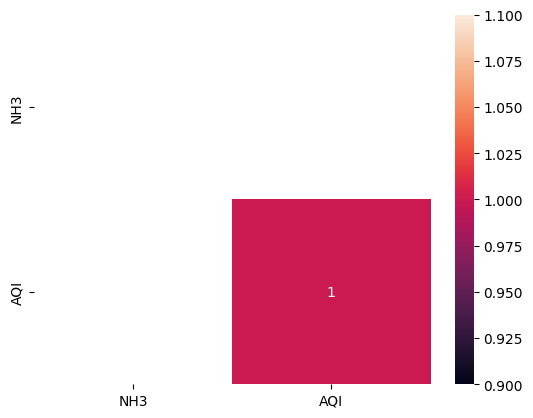

In [82]:
dataplot = sb.heatmap(chennai_2019[['NH3','AQI']].corr(), annot=True)
plt.show()

The highest value of NH3 in the 215 days time period was  16.92356707  recorded on 2019-05-31 
and the lowest value was  16.92356707  recorded on 2019-05-31 
The average NH3 value was  16.92 
NH3 value had a standard deviation of  0.0 
In 2019 the number of days NH3 was responsible for the AQI value was:- 0 which is around 0.0%


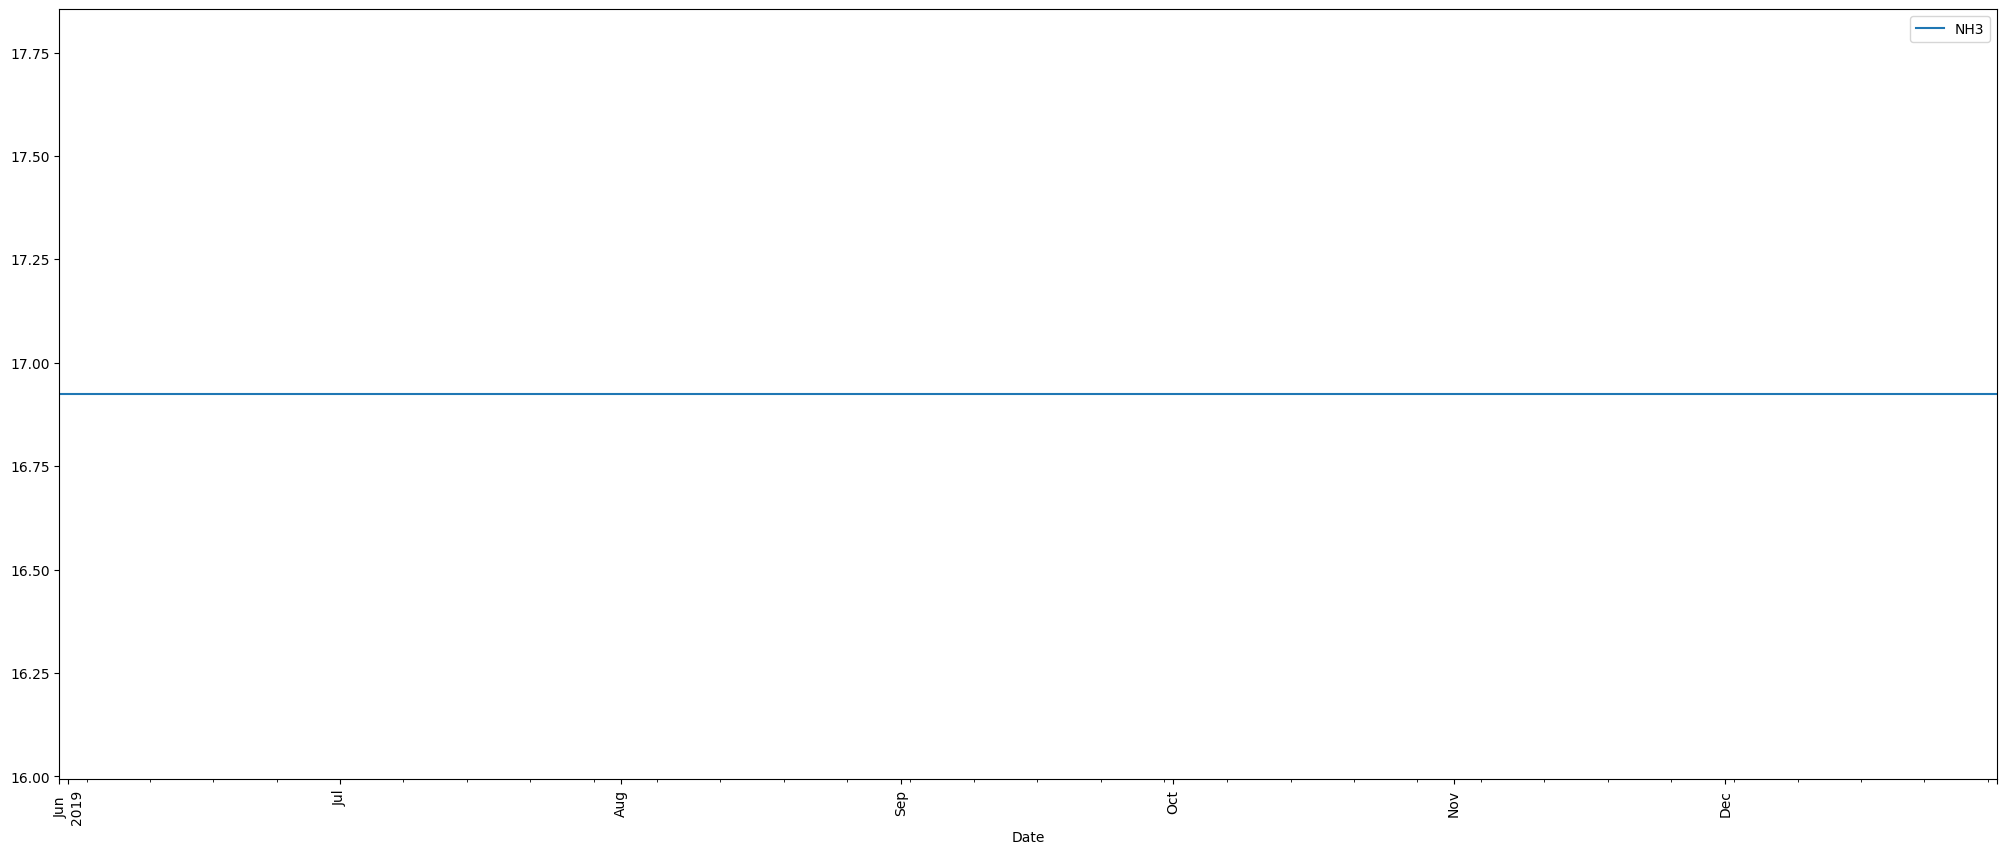

In [83]:
count = 0
for i in range(len(chennai_2019)):
    if (NH3(chennai_2019["NH3"][i]) == chennai_2019["AQI"][i]):
        count = count+1
percent = (count/len(chennai_2019))*100

print ("The highest value of NH3 in the "+str(len(chennai_2019))+
       " days time period was ",chennai_2019["NH3"].loc[chennai_2019['NH3'].idxmax()],
       " recorded on", str(chennai_2019["Date"].loc[chennai_2019['NH3'].idxmax()])[:10],
       '\nand the lowest value was ',chennai_2019["NH3"].loc[chennai_2019['NH3'].idxmin()], 
       " recorded on",str(chennai_2019["Date"].loc[chennai_2019['NH3'].idxmin()])[:10],
       "\nThe average NH3 value was ",str(round(chennai_2019["NH3"].mean(),2)),
       "\nNH3 value had a standard deviation of ",str(round(chennai_2019["NH3"].std(),2)))


a = chennai_2019.plot(x='Date',y='NH3',figsize=(25, 10))
plt.xticks(rotation='vertical')
plt.show()

##### NH3 2020

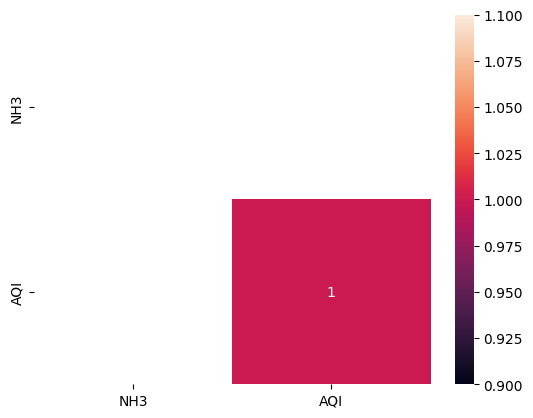

In [84]:
dataplot = sb.heatmap(chennai_2020[['NH3','AQI']].corr(), annot=True)
plt.show()

The highest value of NH3 in the 366 days time period was  16.92356707  recorded on 2020-01-01 
and the lowest value was  16.92356707  recorded on 2020-01-01 
The average NH3 value was  16.92 
NH3 value had a standard deviation of  0.0 
In 2020 the number of days NH3 was responsible for the AQI value was:- 0 which is around 0.0%


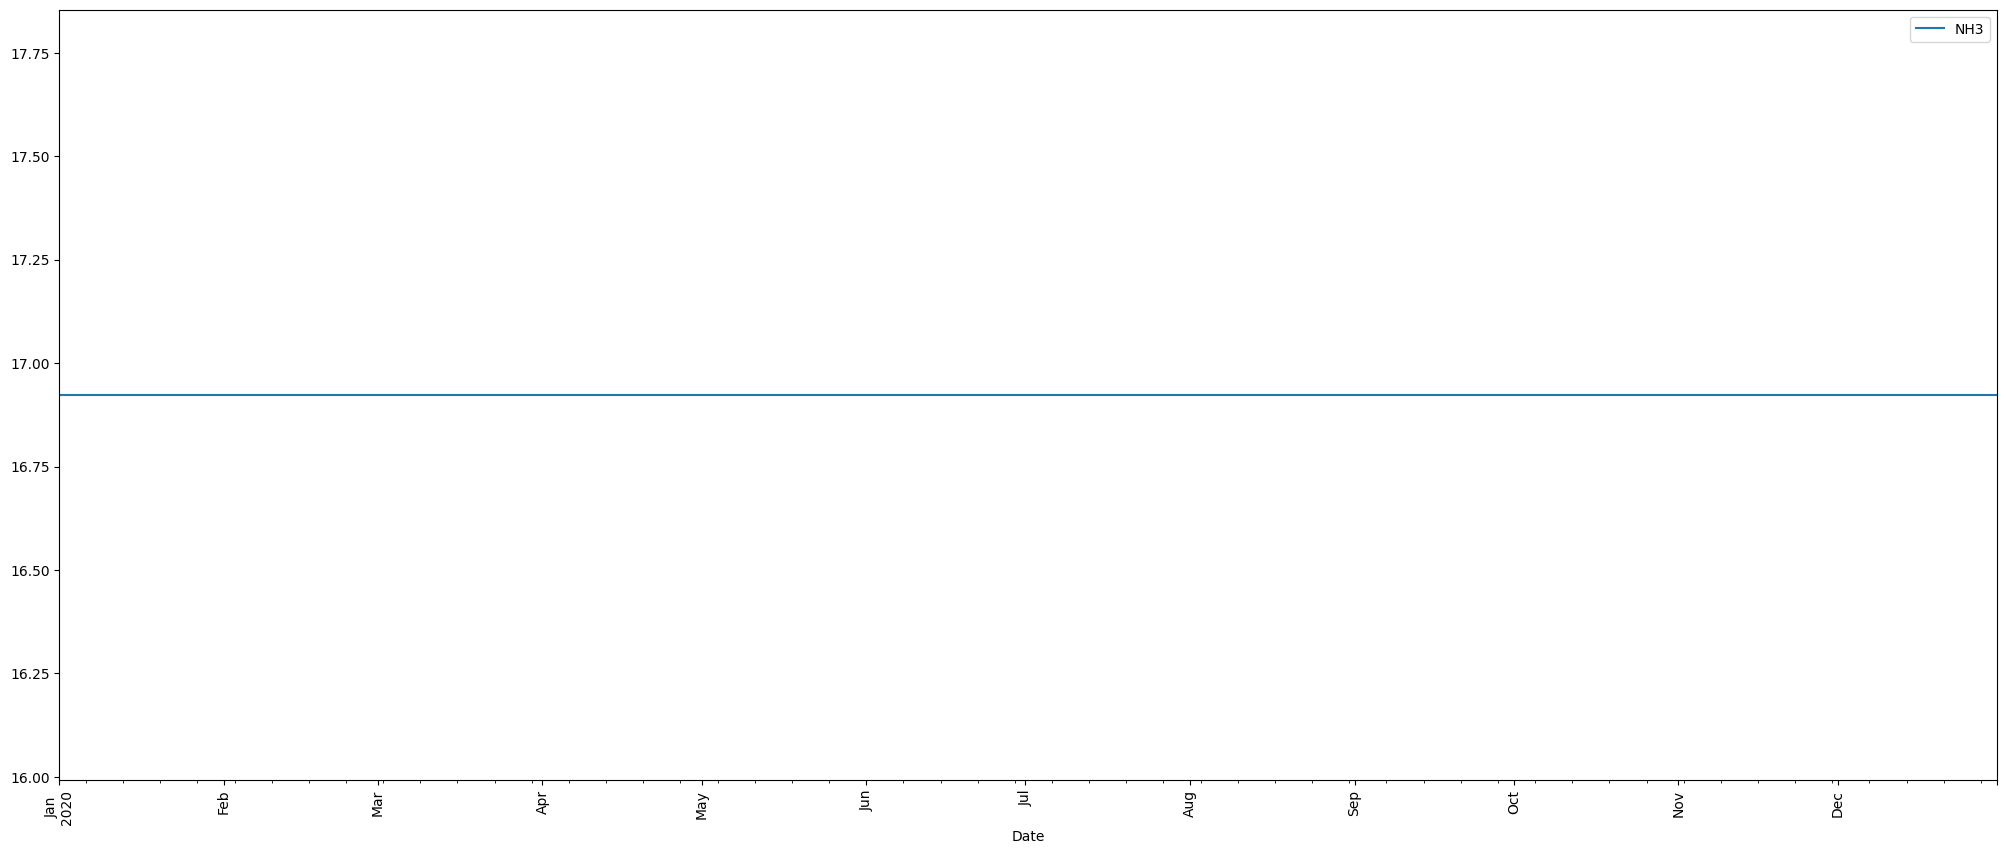

In [85]:
count = 0
for i in range(len(chennai_2020)):
    if (NH3(chennai_2020["NH3"][i]) == chennai_2020["AQI"][i]):
        count = count+1
percent = (count/len(chennai_2020))*100

print ("The highest value of NH3 in the "+str(len(chennai_2020))+
       " days time period was ",chennai_2020["NH3"].loc[chennai_2020['NH3'].idxmax()],
       " recorded on", str(chennai_2020["Date"].loc[chennai_2020['NH3'].idxmax()])[:10],
       '\nand the lowest value was ',chennai_2020["NH3"].loc[chennai_2020['NH3'].idxmin()], 
       " recorded on",str(chennai_2020["Date"].loc[chennai_2020['NH3'].idxmin()])[:10],
       "\nThe average NH3 value was ",str(round(chennai_2020["NH3"].mean(),2)),
       "\nNH3 value had a standard deviation of ",str(round(chennai_2020["NH3"].std(),2)))


a = chennai_2020.plot(x='Date',y='NH3',figsize=(25, 10))
plt.xticks(rotation='vertical')
plt.show()

##### NH3 2021

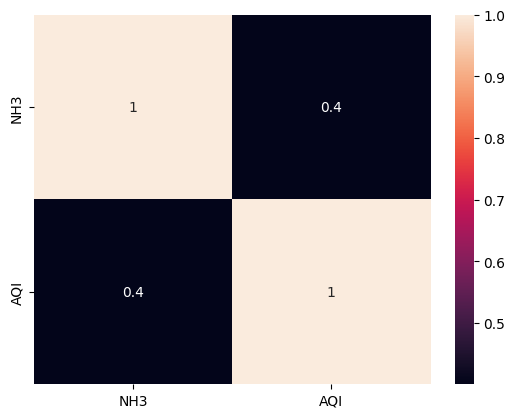

In [86]:
dataplot = sb.heatmap(chennai_2021[['NH3','AQI']].corr(), annot=True)
plt.show()

The highest value of NH3 in the 365 days time period was  96.6  recorded on 2021-12-31 
and the lowest value was  1.58  recorded on 2021-03-24 
The average NH3 value was  17.22 
NH3 value had a standard deviation of  8.64 
In 2021 the number of days NH3 was responsible for the AQI value was:- 0 which is around 0.0%


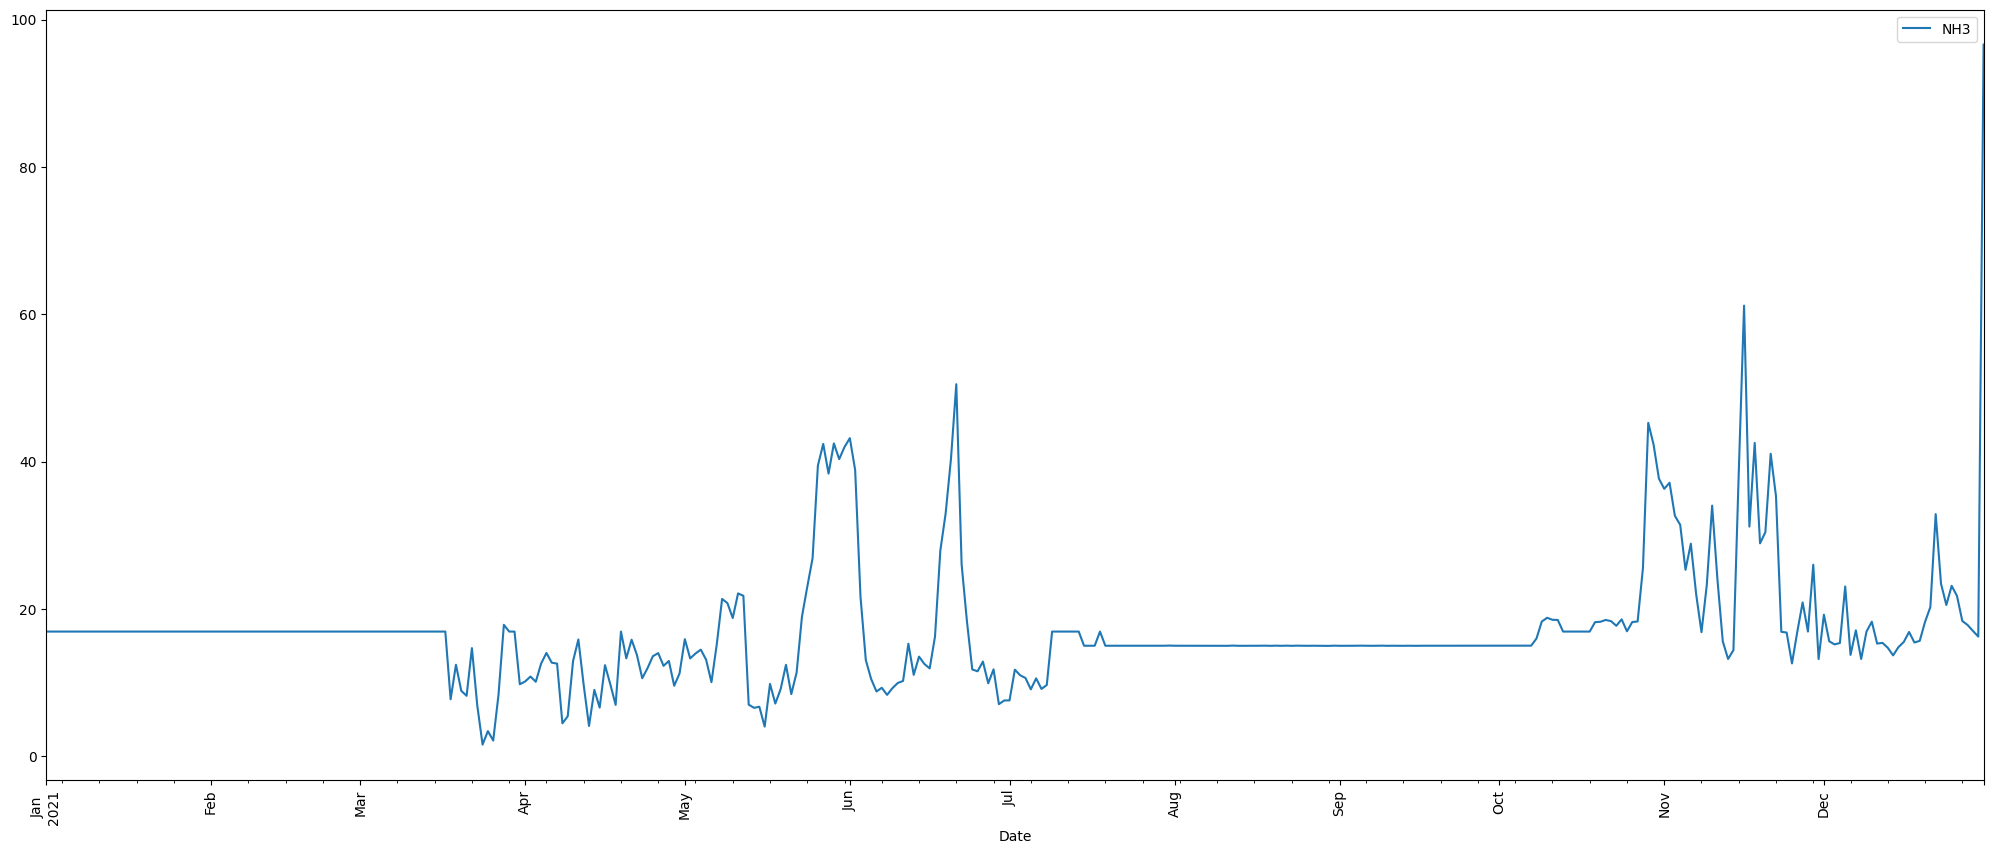

In [87]:
count = 0
for i in range(len(chennai_2021)):
    if (NH3(chennai_2021["NH3"][i]) == chennai_2021["AQI"][i]):
        count = count+1
percent = (count/len(chennai_2021))*100

print ("The highest value of NH3 in the "+str(len(chennai_2021))+
       " days time period was ",chennai_2021["NH3"].loc[chennai_2021['NH3'].idxmax()],
       " recorded on", str(chennai_2021["Date"].loc[chennai_2021['NH3'].idxmax()])[:10],
       '\nand the lowest value was ',chennai_2021["NH3"].loc[chennai_2021['NH3'].idxmin()], 
       " recorded on",str(chennai_2021["Date"].loc[chennai_2021['NH3'].idxmin()])[:10],
       "\nThe average NH3 value was ",str(round(chennai_2021["NH3"].mean(),2)),
       "\nNH3 value had a standard deviation of ",str(round(chennai_2021["NH3"].std(),2)))


a = chennai_2021.plot(x='Date',y='NH3',figsize=(25, 10))
plt.xticks(rotation='vertical')
plt.show()

##### NH3 2022

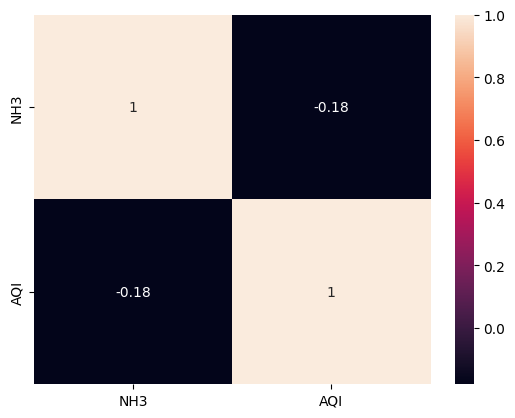

In [88]:
dataplot = sb.heatmap(chennai_2022[['NH3','AQI']].corr(), annot=True)
plt.show()

The highest value of NH3 in the 365 days time period was  152.25  recorded on 2022-05-11 
and the lowest value was  7.88  recorded on 2022-09-28 
The average NH3 value was  19.64 
NH3 value had a standard deviation of  12.37 
In 2022 the number of days NH3 was responsible for the AQI value was:- 0 which is around 0.0%


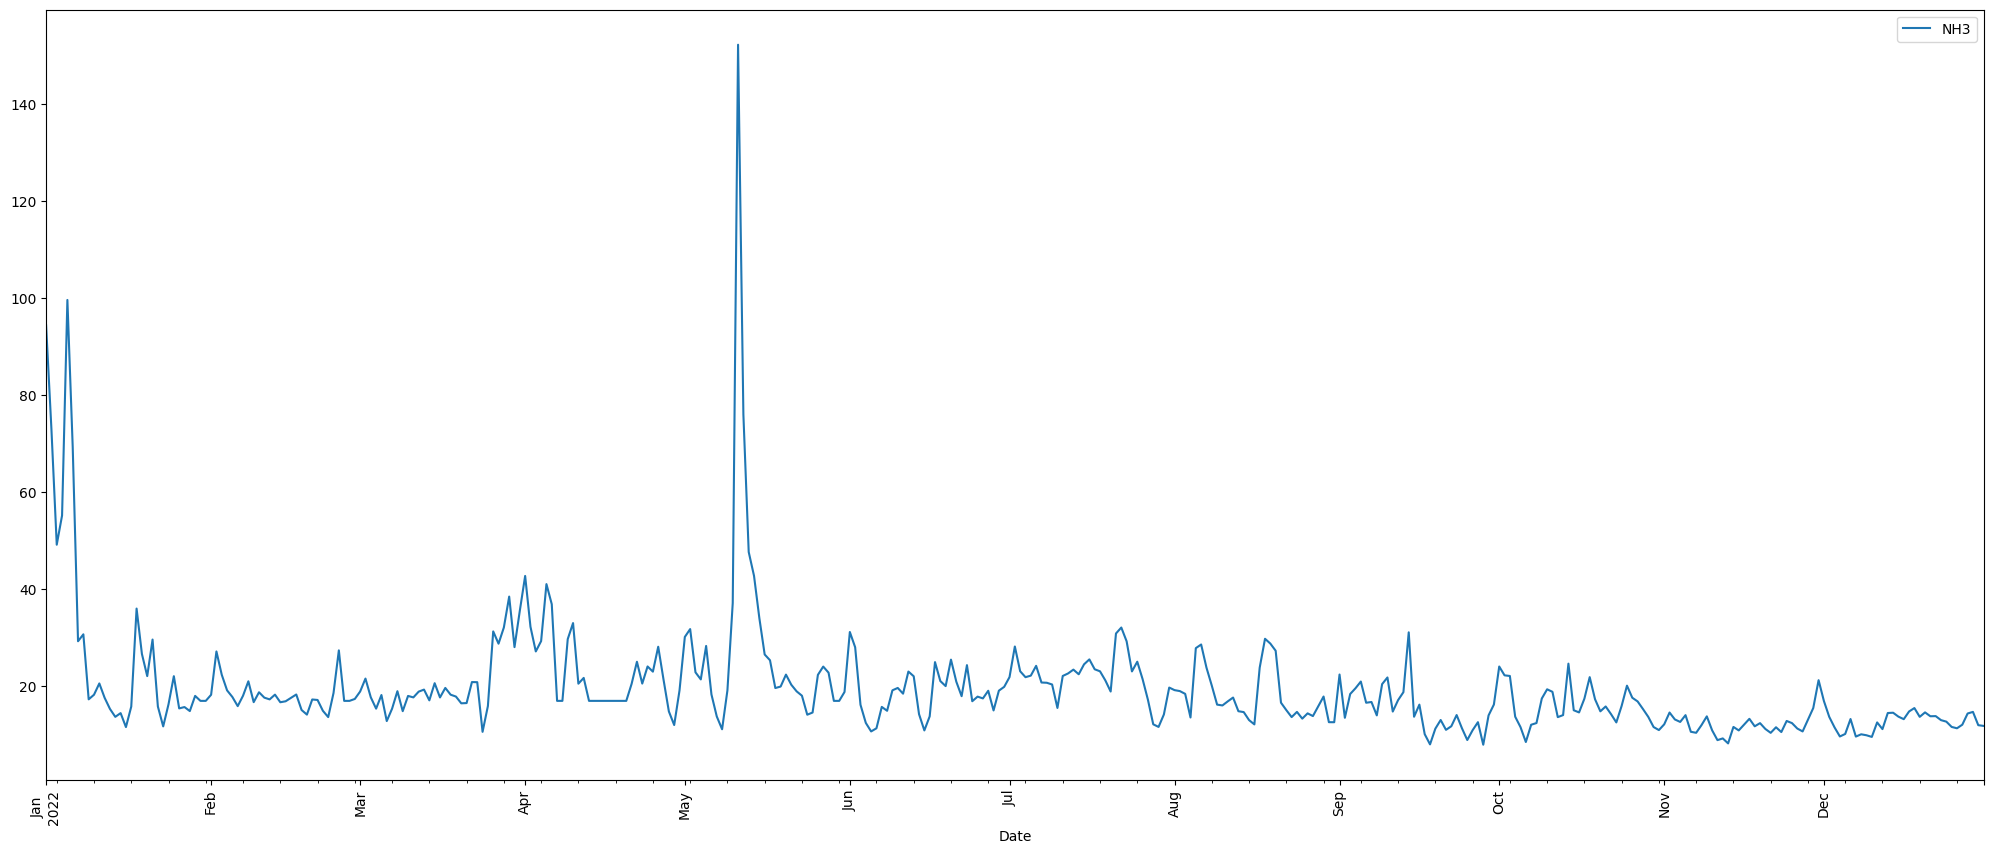

In [89]:
count = 0
for i in range(len(chennai_2022)):
    if (NH3(chennai_2022["NH3"][i]) == chennai_2022["AQI"][i]):
        count = count+1
percent = (count/len(chennai_2022))*100

print ("The highest value of NH3 in the "+str(len(chennai_2022))+
       " days time period was ",chennai_2022["NH3"].loc[chennai_2022['NH3'].idxmax()],
       " recorded on", str(chennai_2022["Date"].loc[chennai_2022['NH3'].idxmax()])[:10],
       '\nand the lowest value was ',chennai_2022["NH3"].loc[chennai_2022['NH3'].idxmin()], 
       " recorded on",str(chennai_2022["Date"].loc[chennai_2022['NH3'].idxmin()])[:10],
       "\nThe average NH3 value was ",str(round(chennai_2022["NH3"].mean(),2)),
       "\nNH3 value had a standard deviation of ",str(round(chennai_2022["NH3"].std(),2)))


a = chennai_2022.plot(x='Date',y='NH3',figsize=(25, 10))
plt.xticks(rotation='vertical')
plt.show()

### Sulfur dioxide (SO2)

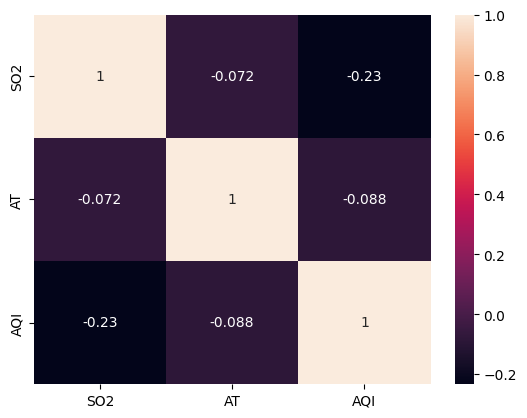

In [90]:
dataplot = sb.heatmap(chennai[['SO2','AT','AQI']].corr(), annot=True)
plt.show()

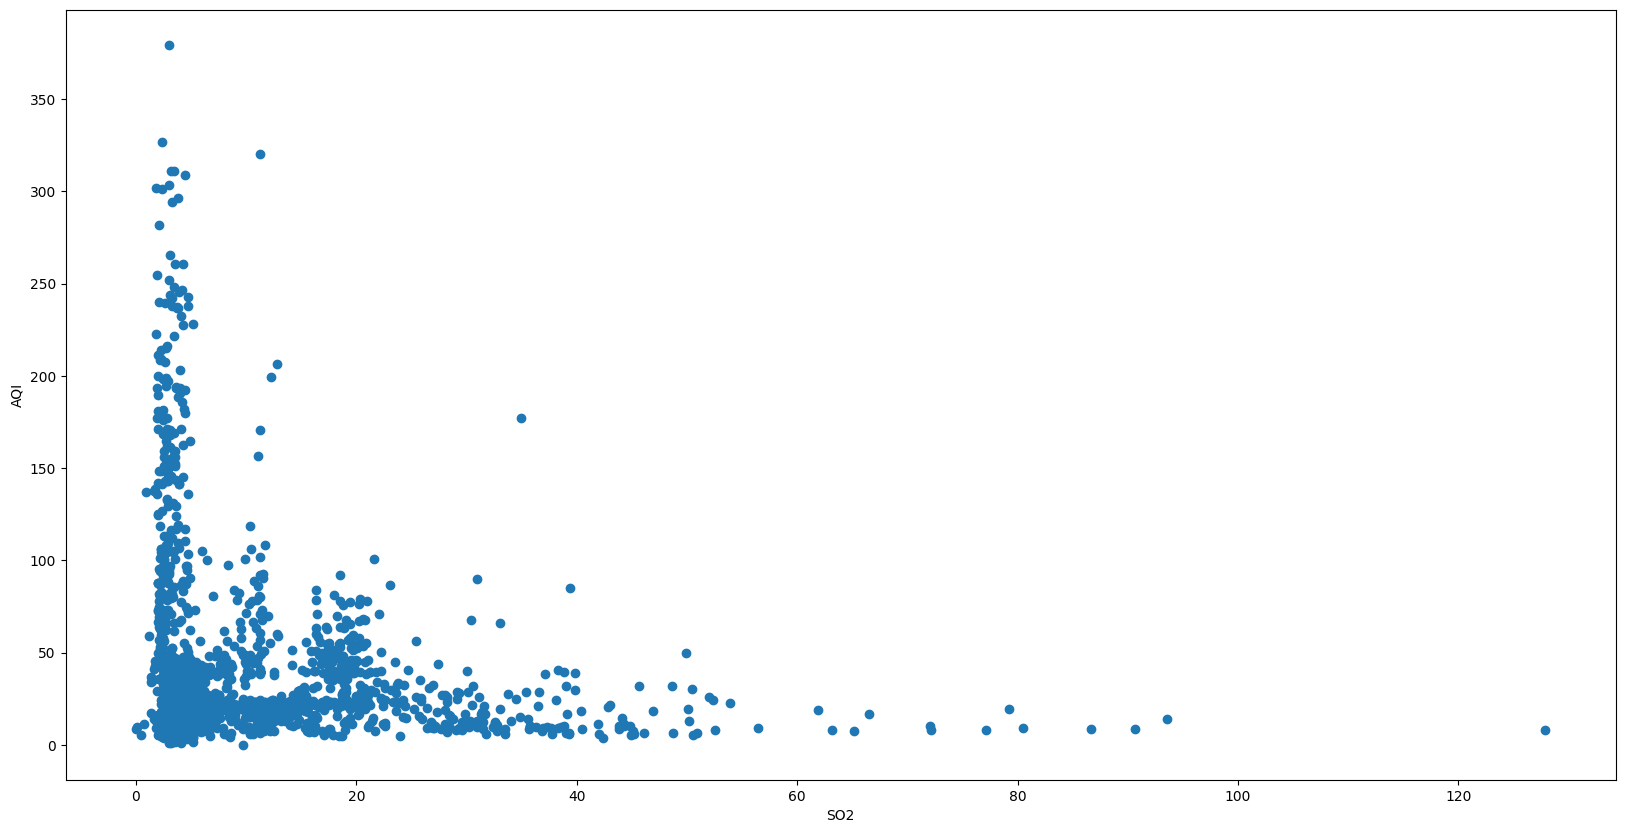

In [91]:
plt.figure(figsize=(20,10))
plt.scatter(x=chennai['SO2'],y=chennai['AQI'])
plt.xlabel("SO2")
plt.ylabel("AQI")
plt.show()

The highest value of SO2 in the 1637 days time period was  127.87  recorded on 2021-06-30 
and the lowest value was  0.01  recorded on 2021-06-29 
The average SO2 value was  11.31 
SO2 value had a standard deviation of  11.58 .
The number of days SO2 was responsible for the AQI value was:- 0 which is around 0.0%


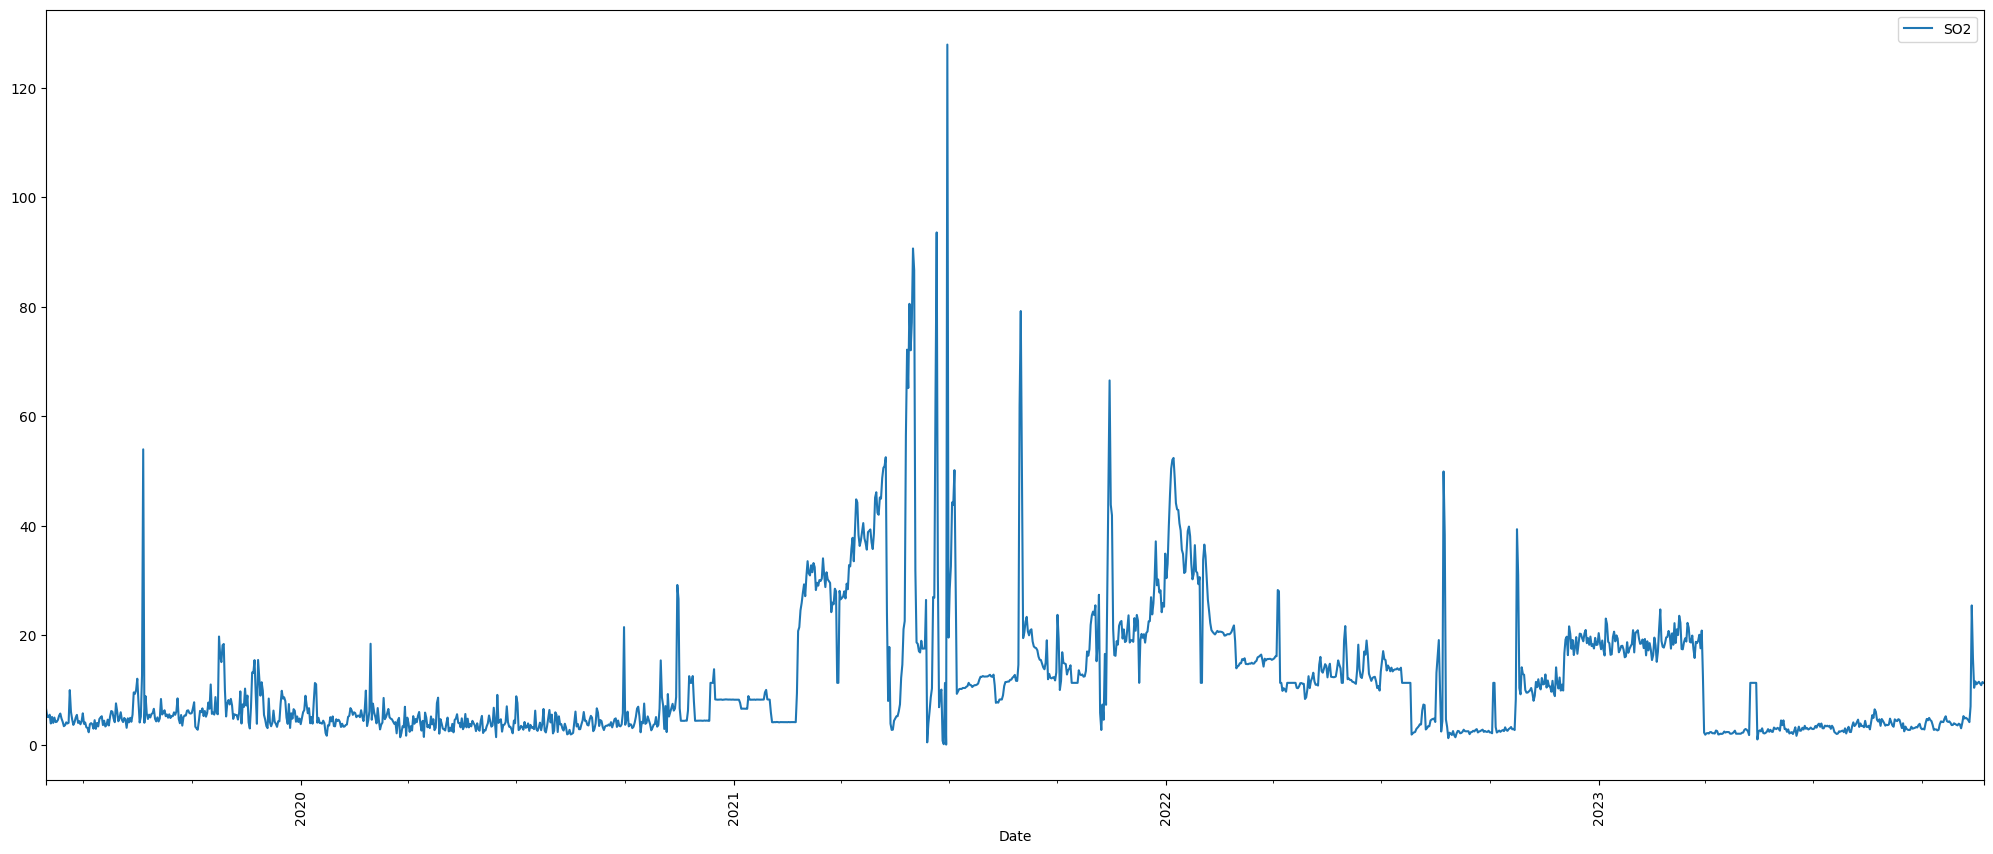

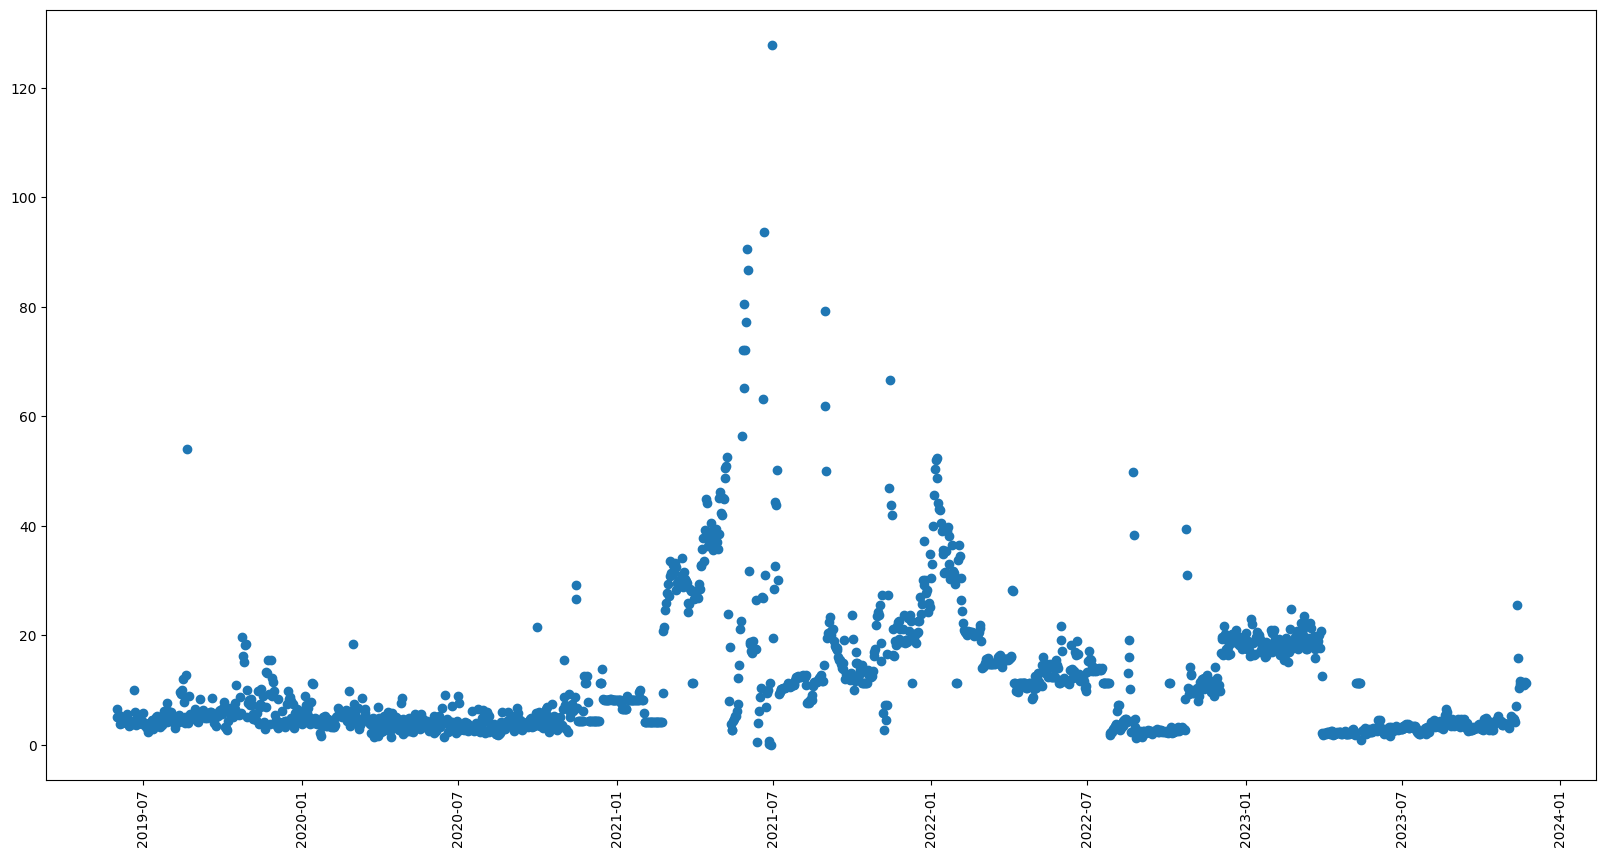

In [92]:
count = 0
for i in range(len(chennai)):
    if (SO2(chennai["SO2"][i]) == chennai["AQI"][i]):
        count = count+1
percent = (count/len(chennai))*100
print ("The highest value of SO2 in the "+str(len(chennai))+
       " days time period was ",chennai["SO2"].loc[chennai['SO2'].idxmax()],
       " recorded on", str(chennai["Date"].loc[chennai['SO2'].idxmax()])[:10],
       '\nand the lowest value was ',chennai["SO2"].loc[chennai['SO2'].idxmin()], 
       " recorded on",str(chennai["Date"].loc[chennai['SO2'].idxmin()])[:10],
       "\nThe average SO2 value was ",str(round(chennai["SO2"].mean(),2)),
       "\nSO2 value had a standard deviation of ",str(round(chennai["SO2"].std(),2)))


a = chennai.plot(x='Date',y='SO2',figsize=(25, 10))
plt.xticks(rotation='vertical')
plt.show()

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.plot_date(chennai['Date'],chennai['SO2'])
plt.xticks(rotation='vertical')
plt.show()

##### SO2 2019

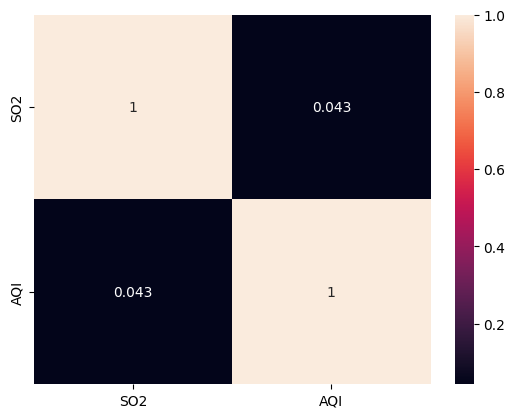

In [93]:
dataplot = sb.heatmap(chennai_2019[['SO2','AQI']].corr(), annot=True)
plt.show()

The highest value of SO2 in the 215 days time period was  53.94  recorded on 2019-08-21 
and the lowest value was  2.26  recorded on 2019-07-06 
The average SO2 value was  6.21 
SO2 value had a standard deviation of  4.37 
In 2019 the number of days SO2 was responsible for the AQI value was:- 0 which is around 0.0%


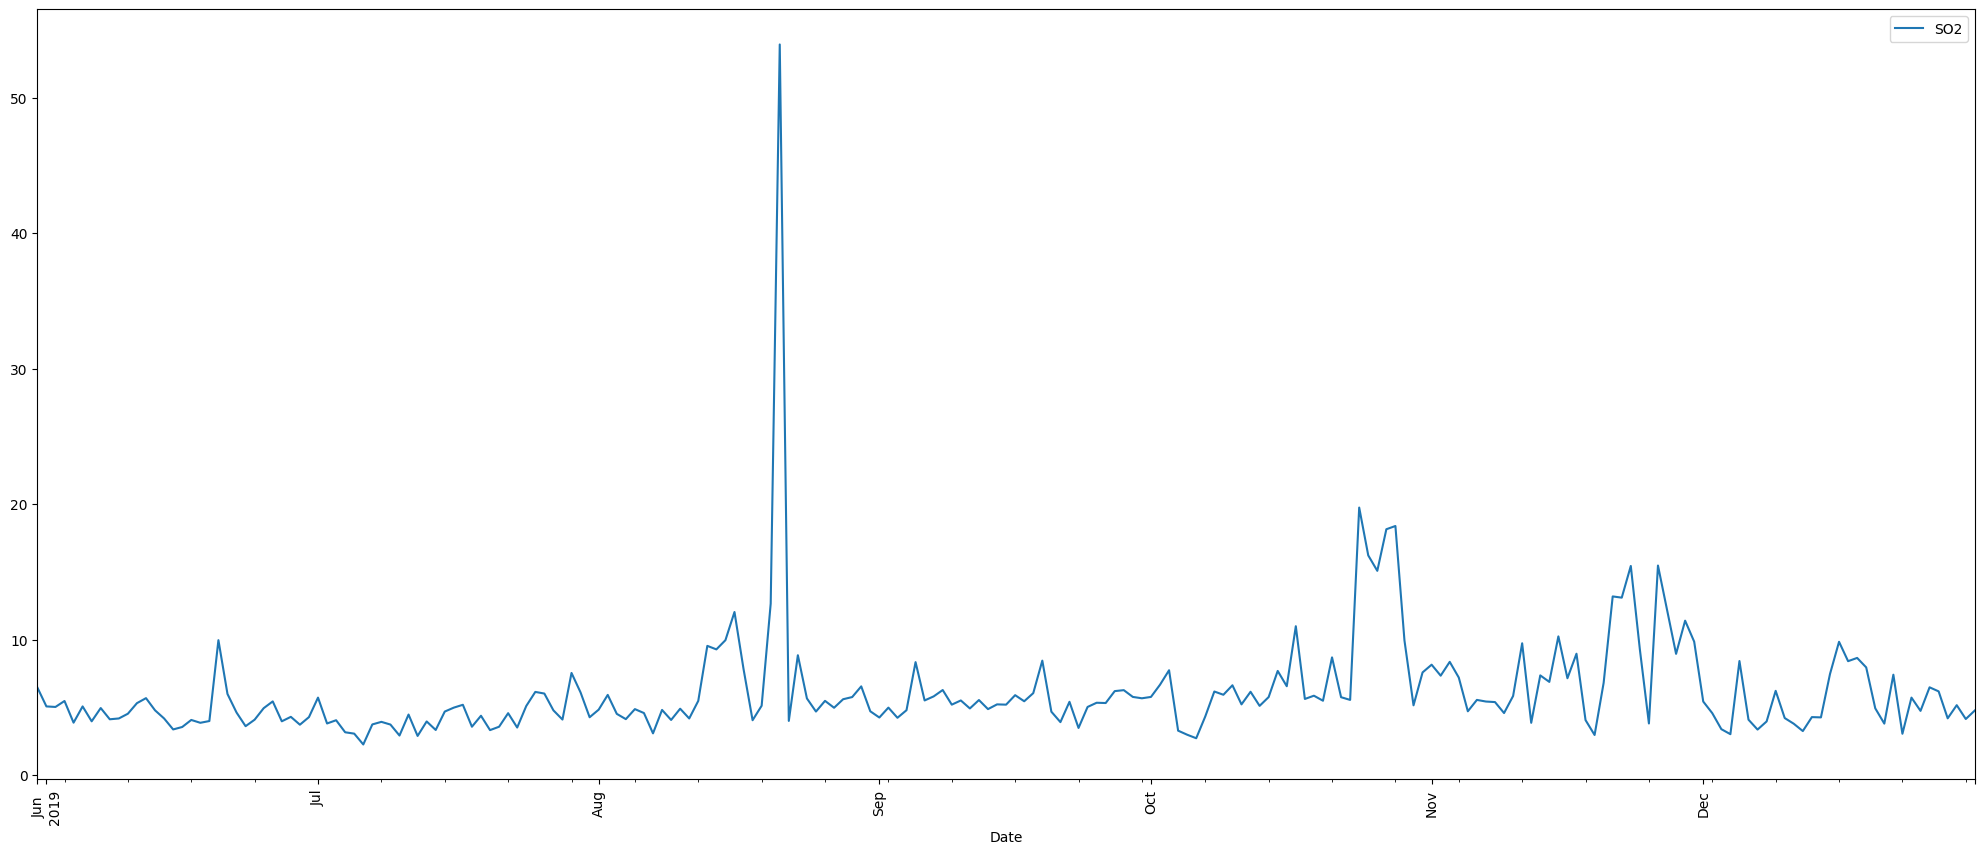

In [94]:
count = 0
for i in range(len(chennai_2019)):
    if (SO2(chennai_2019["SO2"][i]) == chennai_2019["AQI"][i]):
        count = count+1
percent = (count/len(chennai_2019))*100

print ("The highest value of SO2 in the "+str(len(chennai_2019))+
       " days time period was ",chennai_2019["SO2"].loc[chennai_2019['SO2'].idxmax()],
       " recorded on", str(chennai_2019["Date"].loc[chennai_2019['SO2'].idxmax()])[:10],
       '\nand the lowest value was ',chennai_2019["SO2"].loc[chennai_2019['SO2'].idxmin()], 
       " recorded on",str(chennai_2019["Date"].loc[chennai_2019['SO2'].idxmin()])[:10],
       "\nThe average SO2 value was ",str(round(chennai_2019["SO2"].mean(),2)),
       "\nSO2 value had a standard deviation of ",str(round(chennai_2019["SO2"].std(),2)))


a = chennai_2019.plot(x='Date',y='SO2',figsize=(25, 10))
plt.xticks(rotation='vertical')
plt.show()

##### SO2 2020

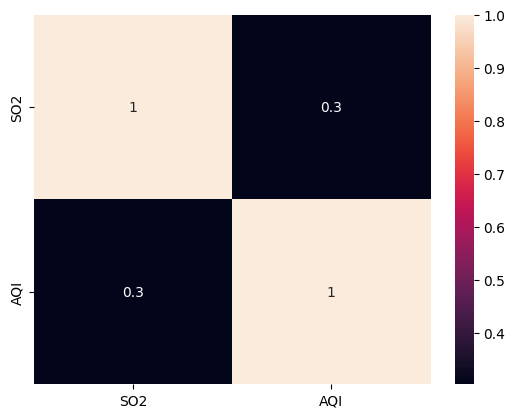

In [95]:
dataplot = sb.heatmap(chennai_2020[['SO2','AQI']].corr(), annot=True)
plt.show()

The highest value of SO2 in the 366 days time period was  29.17  recorded on 2020-11-14 
and the lowest value was  1.35  recorded on 2020-03-25 
The average SO2 value was  4.91 
SO2 value had a standard deviation of  2.96 
In 2020 the number of days SO2 was responsible for the AQI value was:- 0 which is around 0.0%


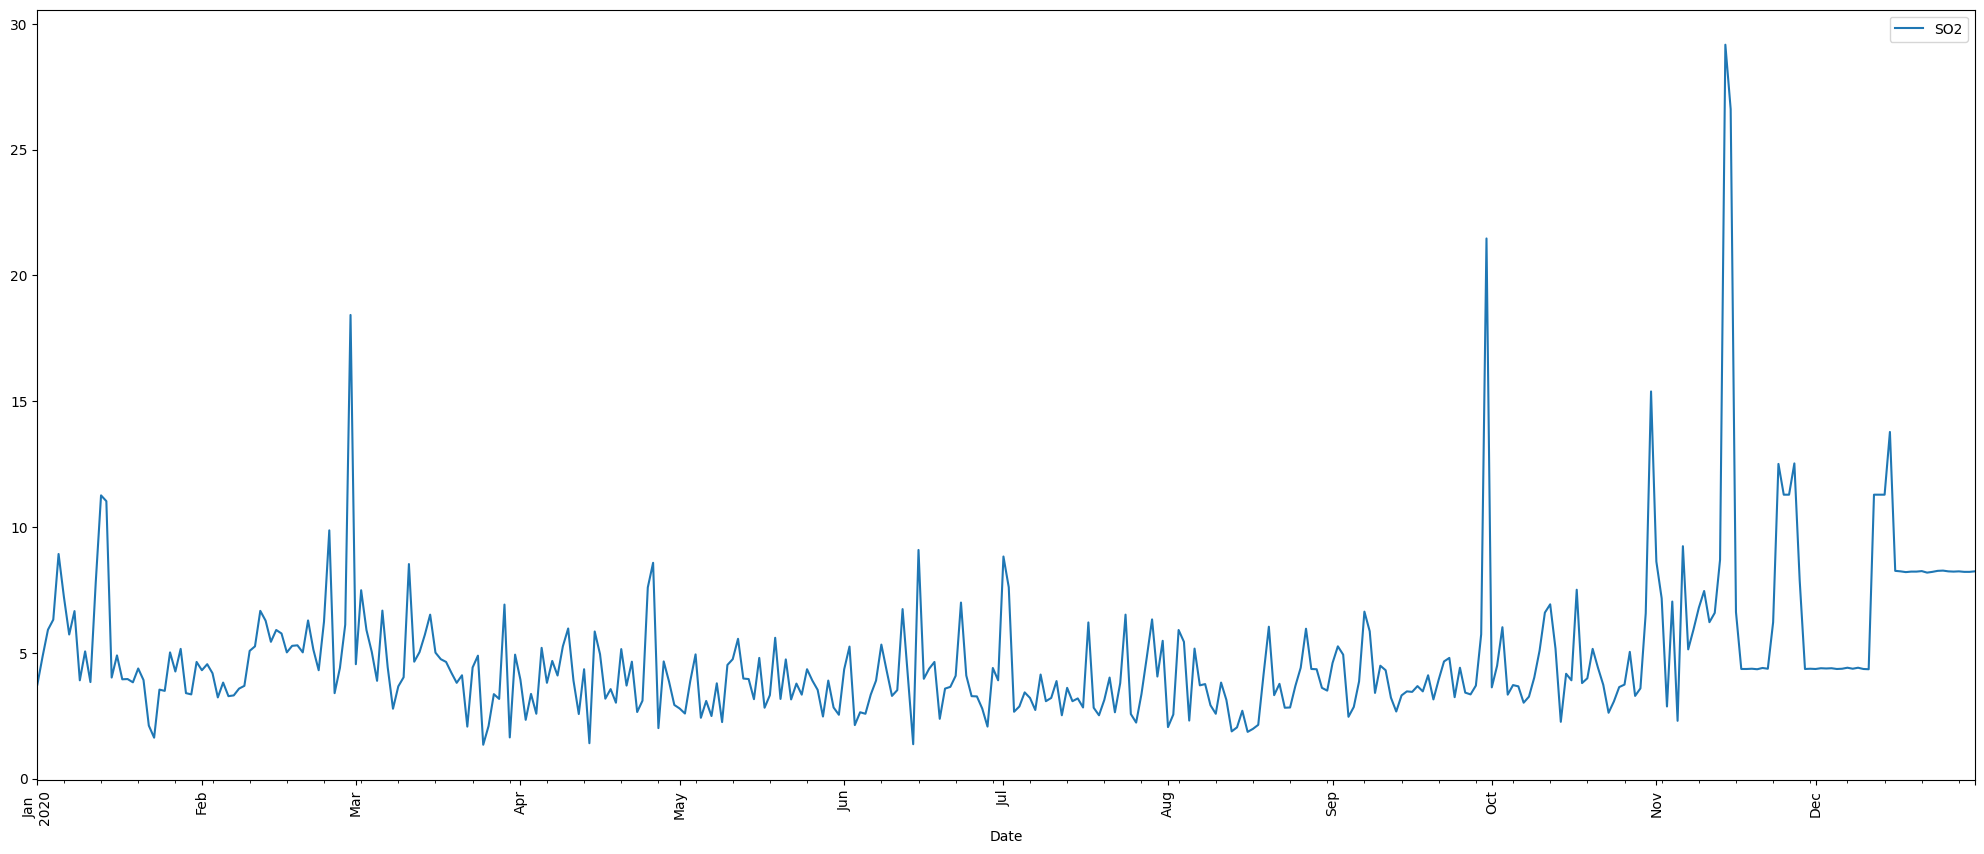

In [96]:
count = 0
for i in range(len(chennai_2020)):
    if (SO2(chennai_2020["SO2"][i]) == chennai_2020["AQI"][i]):
        count = count+1
percent = (count/len(chennai_2020))*100

print ("The highest value of SO2 in the "+str(len(chennai_2020))+
       " days time period was ",chennai_2020["SO2"].loc[chennai_2020['SO2'].idxmax()],
       " recorded on", str(chennai_2020["Date"].loc[chennai_2020['SO2'].idxmax()])[:10],
       '\nand the lowest value was ',chennai_2020["SO2"].loc[chennai_2020['SO2'].idxmin()], 
       " recorded on",str(chennai_2020["Date"].loc[chennai_2020['SO2'].idxmin()])[:10],
       "\nThe average SO2 value was ",str(round(chennai_2020["SO2"].mean(),2)),
       "\nSO2 value had a standard deviation of ",str(round(chennai_2020["SO2"].std(),2)))


a = chennai_2020.plot(x='Date',y='SO2',figsize=(25, 10))
plt.xticks(rotation='vertical')
plt.show()

##### SO2 2021

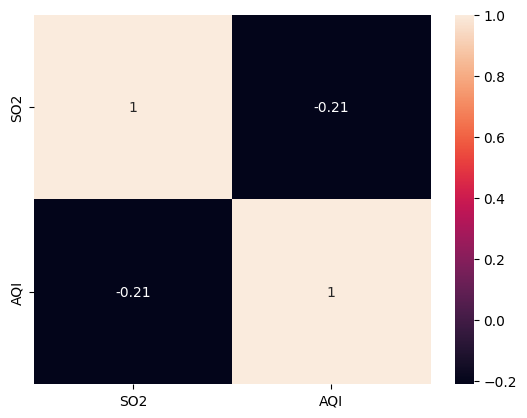

In [97]:
dataplot = sb.heatmap(chennai_2021[['SO2','AQI']].corr(), annot=True)
plt.show()

The highest value of SO2 in the 365 days time period was  127.87  recorded on 2021-06-30 
and the lowest value was  0.01  recorded on 2021-06-29 
The average SO2 value was  20.84 
SO2 value had a standard deviation of  16.48 
In 2021 the number of days SO2 was responsible for the AQI value was:- 0 which is around 0.0%


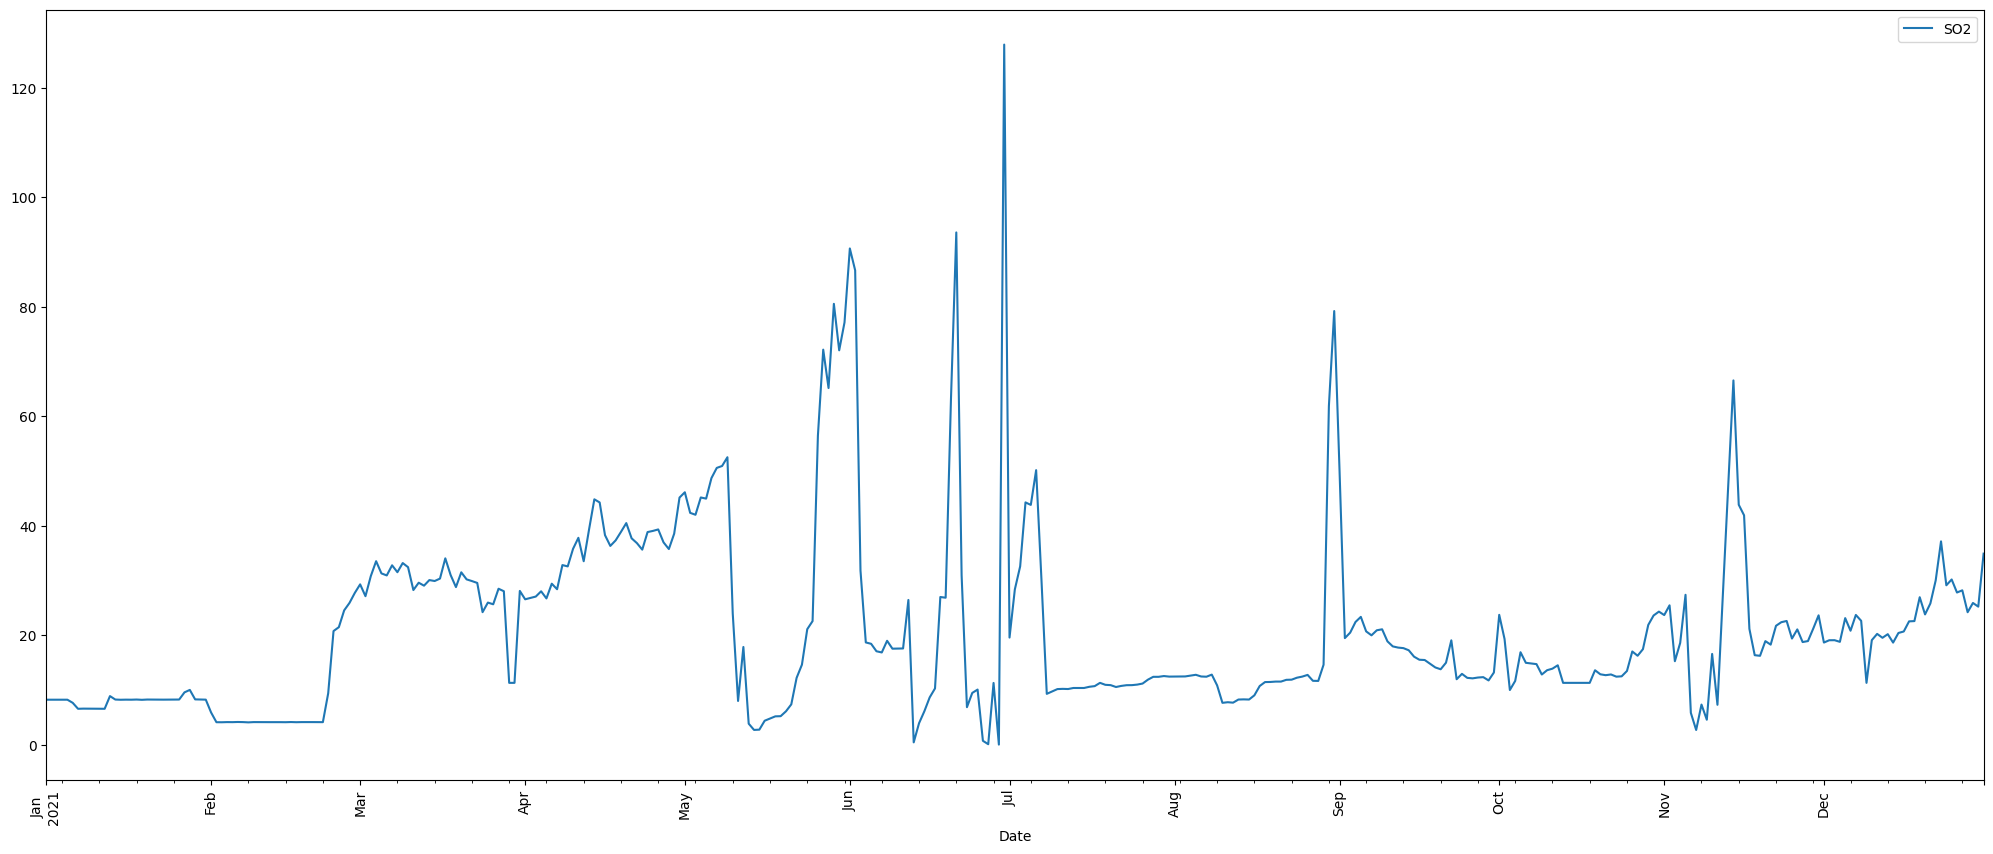

In [98]:
count = 0
for i in range(len(chennai_2021)):
    if (SO2(chennai_2021["SO2"][i]) == chennai_2021["AQI"][i]):
        count = count+1
percent = (count/len(chennai_2021))*100

print ("The highest value of SO2 in the "+str(len(chennai_2021))+
       " days time period was ",chennai_2021["SO2"].loc[chennai_2021['SO2'].idxmax()],
       " recorded on", str(chennai_2021["Date"].loc[chennai_2021['SO2'].idxmax()])[:10],
       '\nand the lowest value was ',chennai_2021["SO2"].loc[chennai_2021['SO2'].idxmin()], 
       " recorded on",str(chennai_2021["Date"].loc[chennai_2021['SO2'].idxmin()])[:10],
       "\nThe average SO2 value was ",str(round(chennai_2021["SO2"].mean(),2)),
       "\nSO2 value had a standard deviation of ",str(round(chennai_2021["SO2"].std(),2)))


a = chennai_2021.plot(x='Date',y='SO2',figsize=(25, 10))
plt.xticks(rotation='vertical')
plt.show()

##### SO2 2022

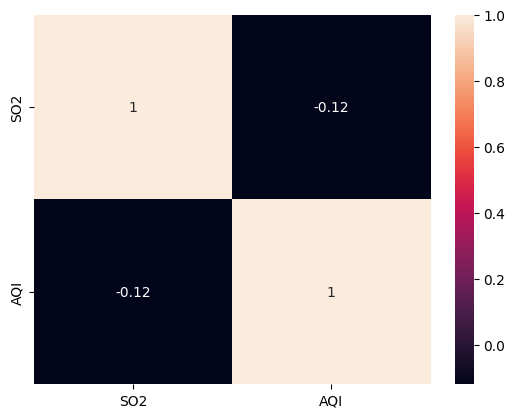

In [99]:
dataplot = sb.heatmap(chennai_2022[['SO2','AQI']].corr(), annot=True)
plt.show()

The highest value of SO2 in the 365 days time period was  52.37  recorded on 2022-01-07 
and the lowest value was  1.19  recorded on 2022-08-27 
The average SO2 value was  14.23 
SO2 value had a standard deviation of  9.97 
In 2022 the number of days SO2 was responsible for the AQI value was:- 0 which is around 0.0%


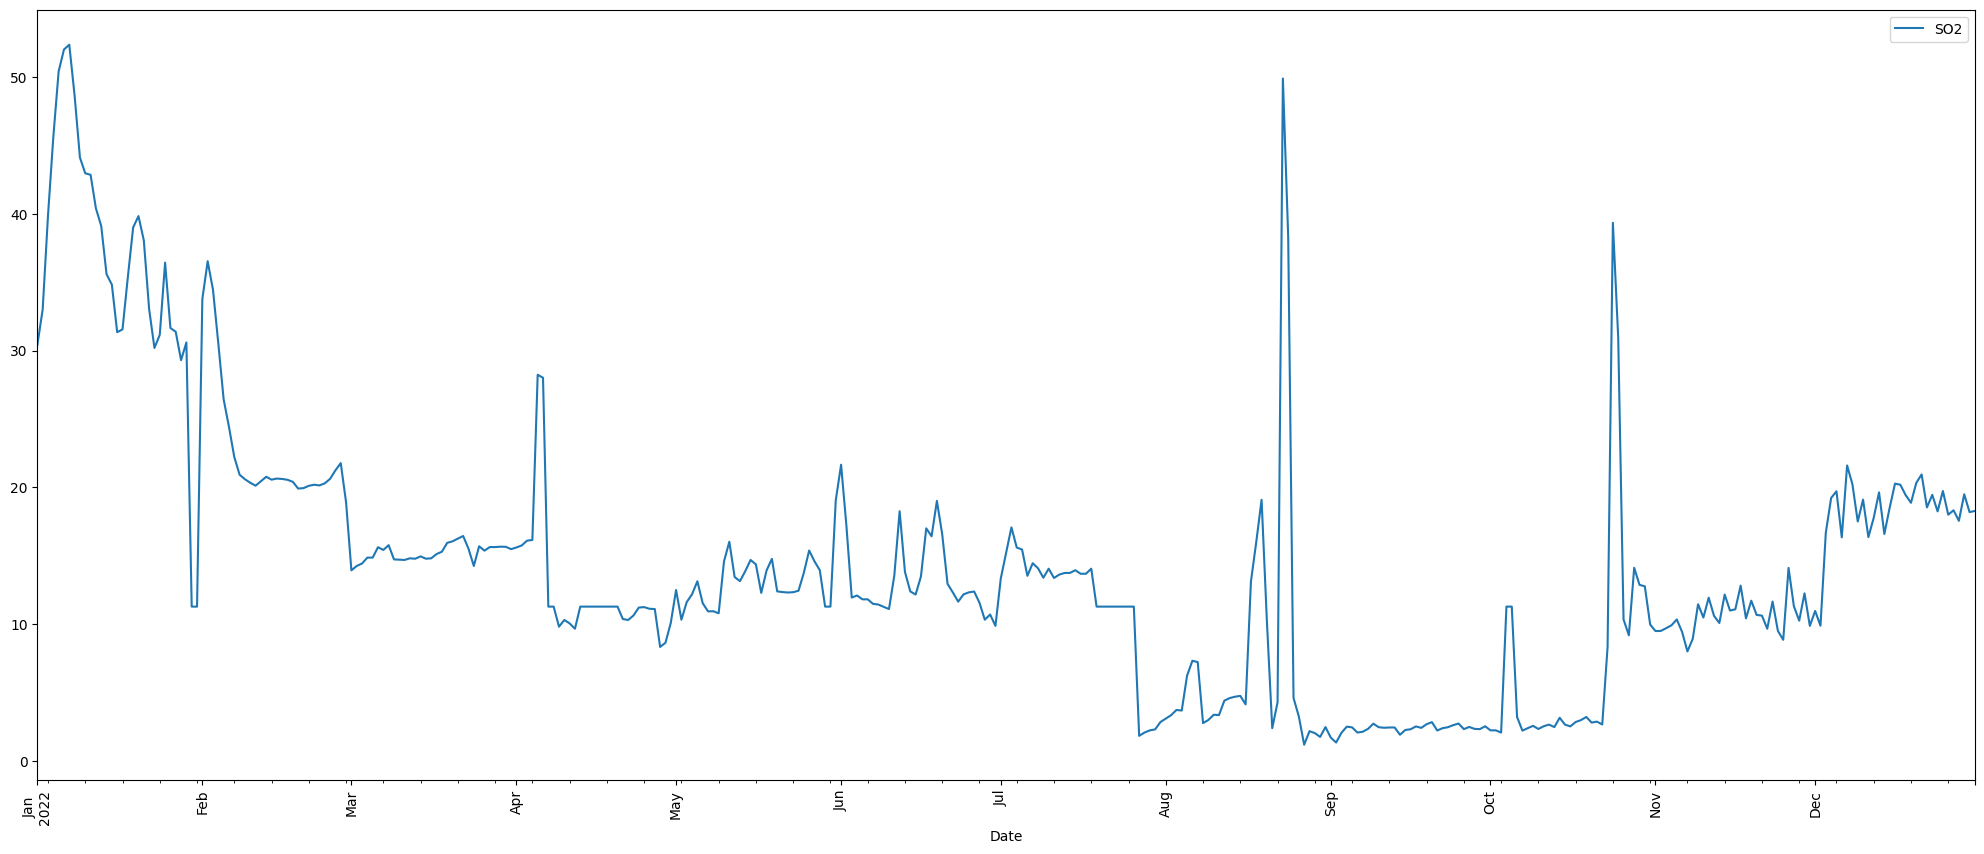

In [100]:
count = 0
for i in range(len(chennai_2022)):
    if (SO2(chennai_2022["SO2"][i]) == chennai_2022["AQI"][i]):
        count = count+1
percent = (count/len(chennai_2022))*100

print ("The highest value of SO2 in the "+str(len(chennai_2022))+
       " days time period was ",chennai_2022["SO2"].loc[chennai_2022['SO2'].idxmax()],
       " recorded on", str(chennai_2022["Date"].loc[chennai_2022['SO2'].idxmax()])[:10],
       '\nand the lowest value was ',chennai_2022["SO2"].loc[chennai_2022['SO2'].idxmin()], 
       " recorded on",str(chennai_2022["Date"].loc[chennai_2022['SO2'].idxmin()])[:10],
       "\nThe average SO2 value was ",str(round(chennai_2022["SO2"].mean(),2)),
       "\nSO2 value had a standard deviation of ",str(round(chennai_2022["SO2"].std(),2)))


a = chennai_2022.plot(x='Date',y='SO2',figsize=(25, 10))
plt.xticks(rotation='vertical')
plt.show()

### Carbon Monoxide (CO)

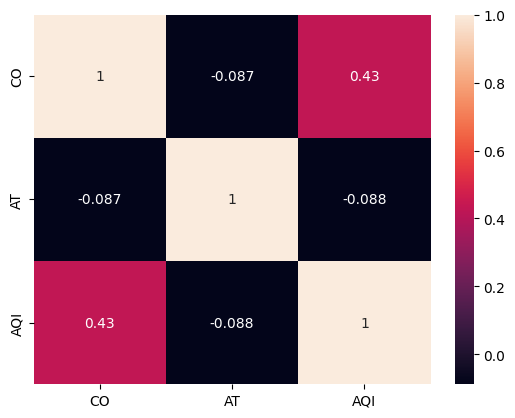

In [101]:
dataplot = sb.heatmap(chennai[['CO','AT','AQI']].corr(), annot=True)
plt.show()

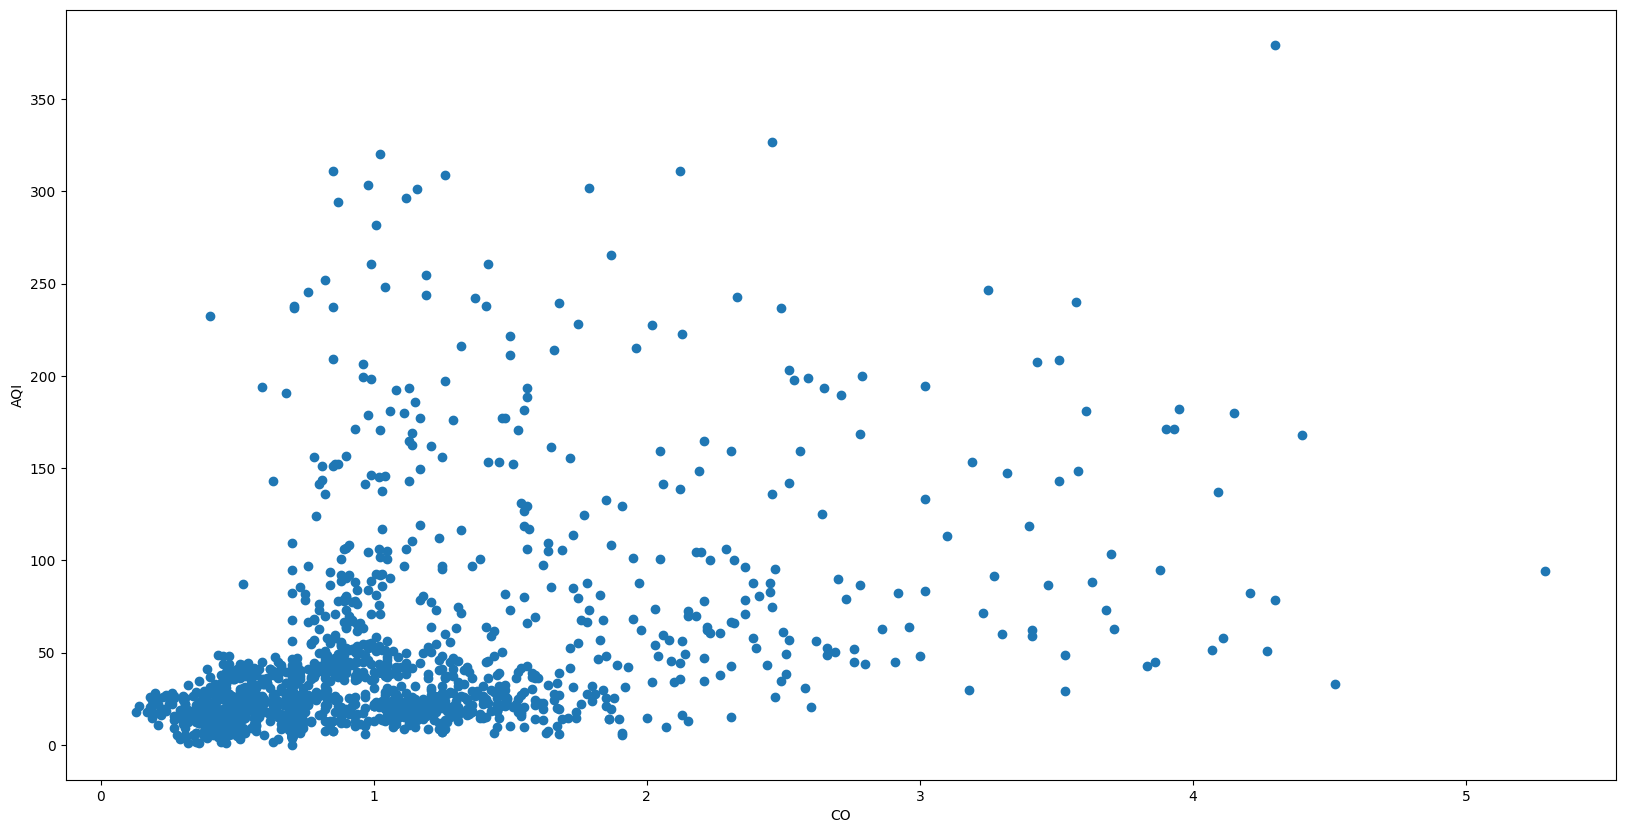

In [102]:
plt.figure(figsize=(20,10))
plt.scatter(x=chennai['CO'],y=chennai['AQI'])
plt.xlabel("CO")
plt.ylabel("AQI")
plt.show()

The highest value of CO in the 1637 days time period was  5.29  recorded on 2023-05-22 
and the lowest value was  0.13  recorded on 2020-10-13 
The average CO value was  1.03 
CO value had a standard deviation of  0.68 .
The number of days CO was responsible for the AQI value was:- 0 which is around 0.0%


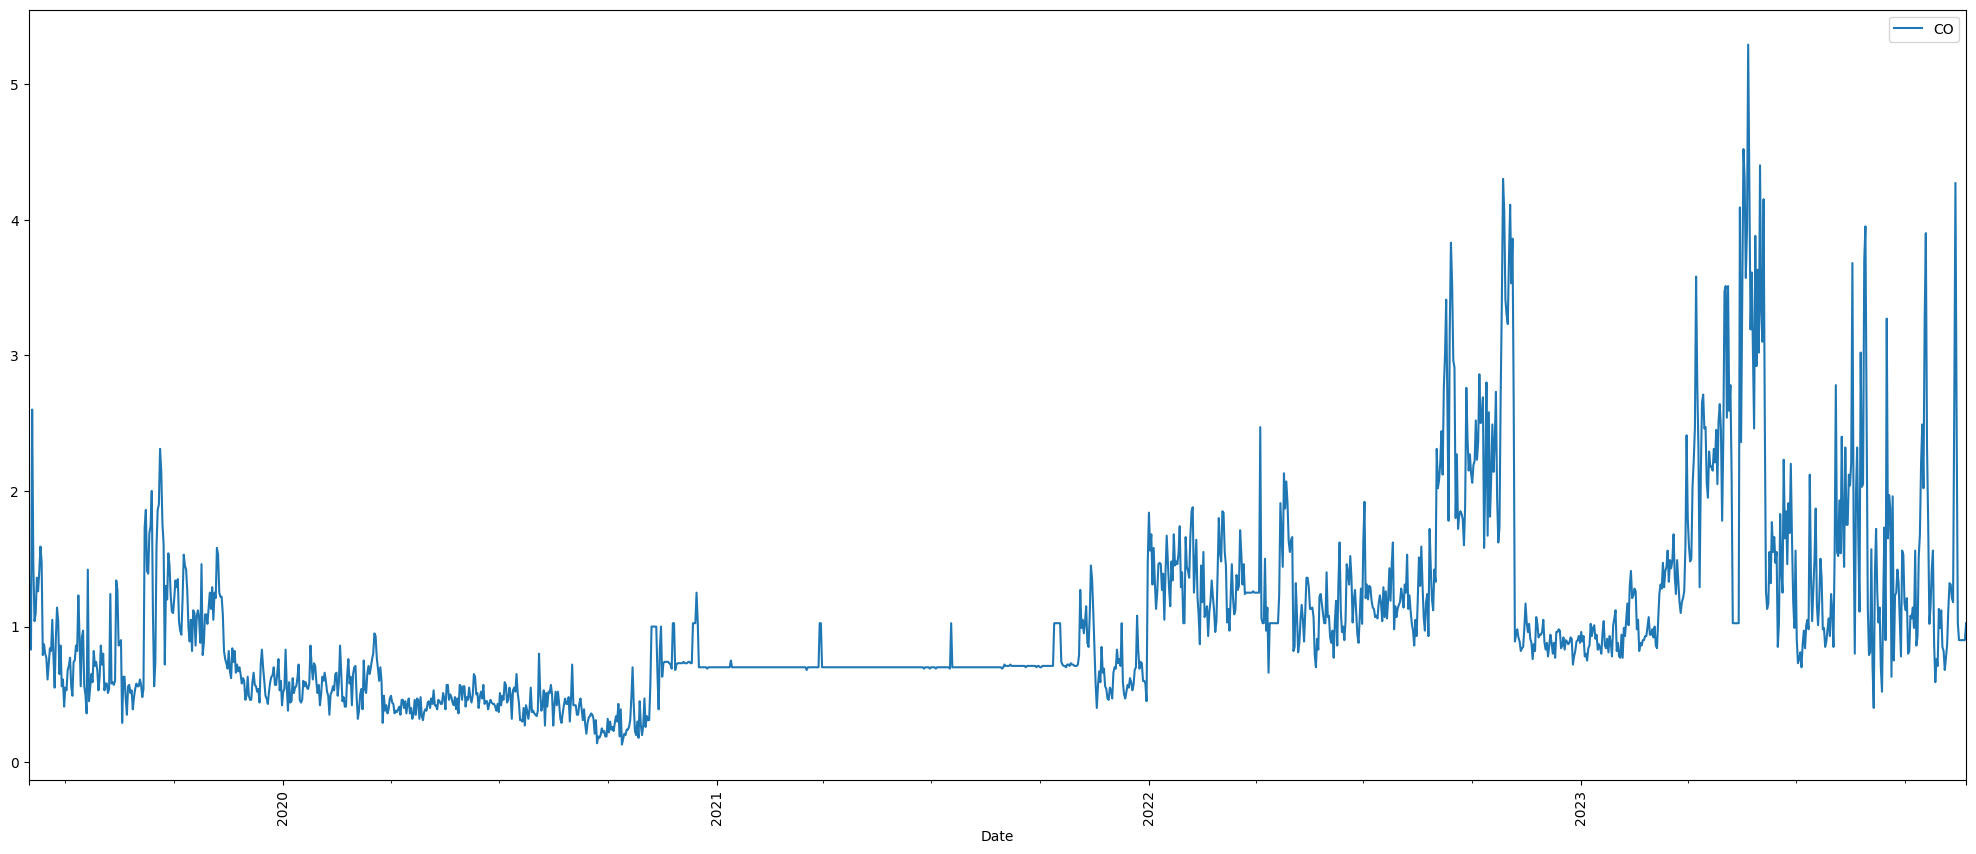

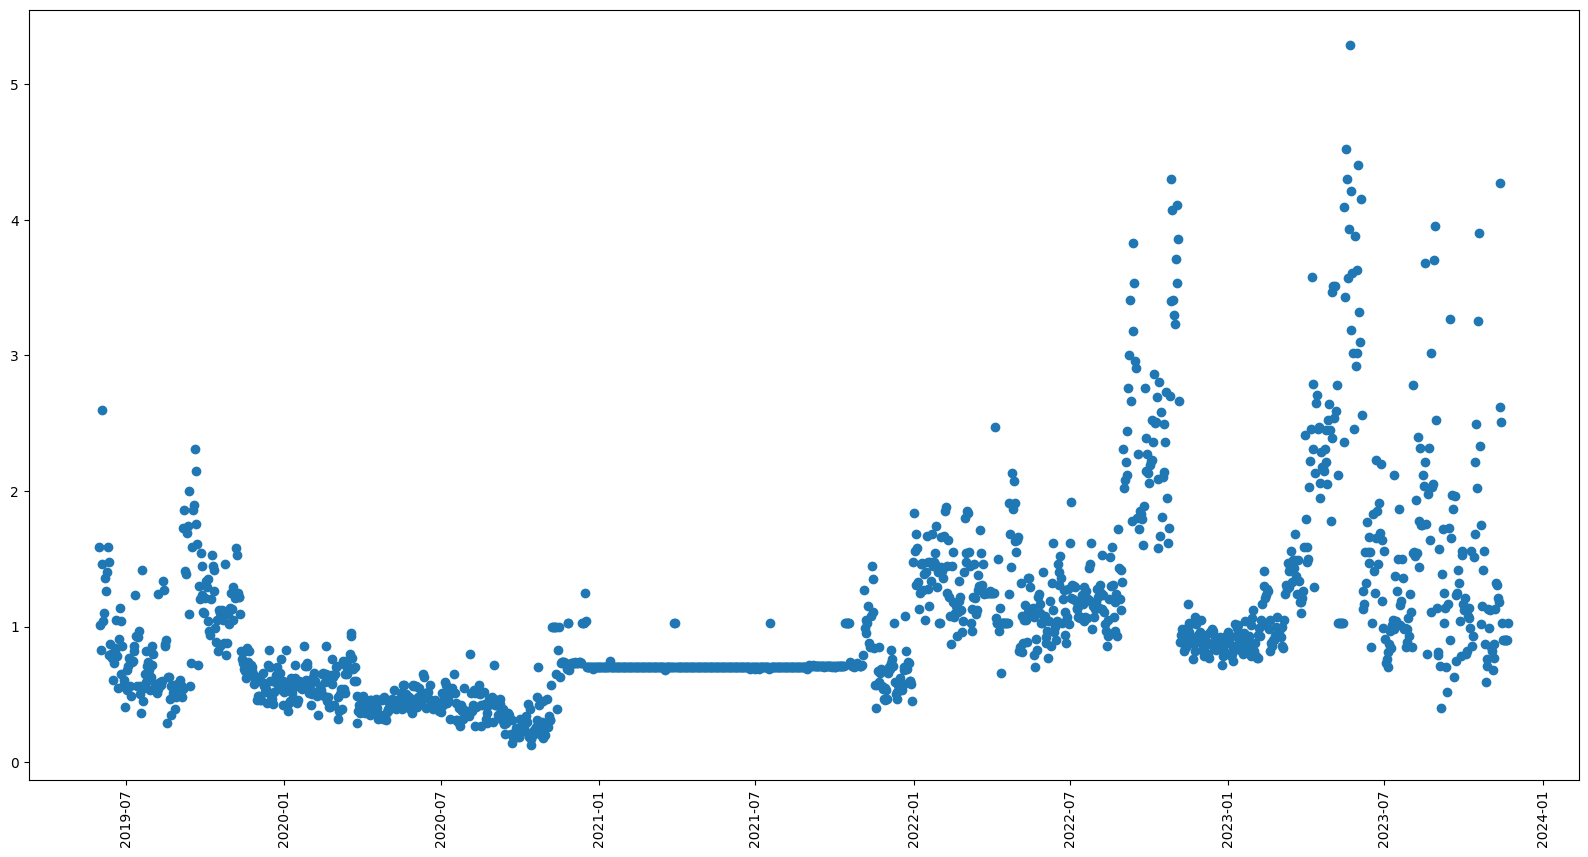

In [103]:
count = 0
for i in range(len(chennai)):
    if (CO(chennai["CO"][i]) == chennai["AQI"][i]):
        count = count+1
percent = (count/len(chennai))*100
print ("The highest value of CO in the "+str(len(chennai))+
       " days time period was ",chennai["CO"].loc[chennai['CO'].idxmax()],
       " recorded on", str(chennai["Date"].loc[chennai['CO'].idxmax()])[:10],
       '\nand the lowest value was ',chennai["CO"].loc[chennai['CO'].idxmin()], 
       " recorded on",str(chennai["Date"].loc[chennai['CO'].idxmin()])[:10],
       "\nThe average CO value was ",str(round(chennai["CO"].mean(),2)),
       "\nCO value had a standard deviation of ",str(round(chennai["CO"].std(),2)))


a = chennai.plot(x='Date',y='CO',figsize=(25, 10))
plt.xticks(rotation='vertical')
plt.show()

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.plot_date(chennai['Date'],chennai['CO'])
plt.xticks(rotation='vertical')
plt.show()

##### CO 2019

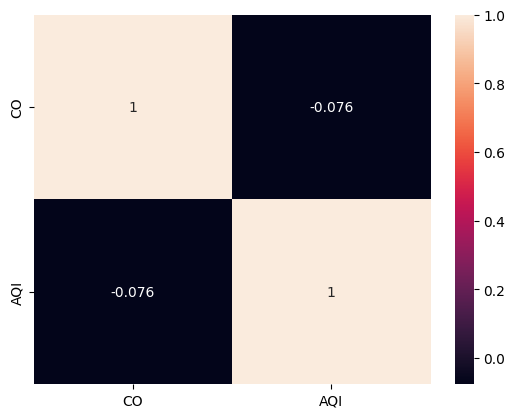

In [104]:
dataplot = sb.heatmap(chennai_2019[['CO','AQI']].corr(), annot=True)
plt.show()

The highest value of CO in the 215 days time period was  2.6  recorded on 2019-06-03 
and the lowest value was  0.29  recorded on 2019-08-18 
The average CO value was  0.9 
CO value had a standard deviation of  0.41 
In 2019 the number of days CO was responsible for the AQI value was:- 0 which is around 0.0%


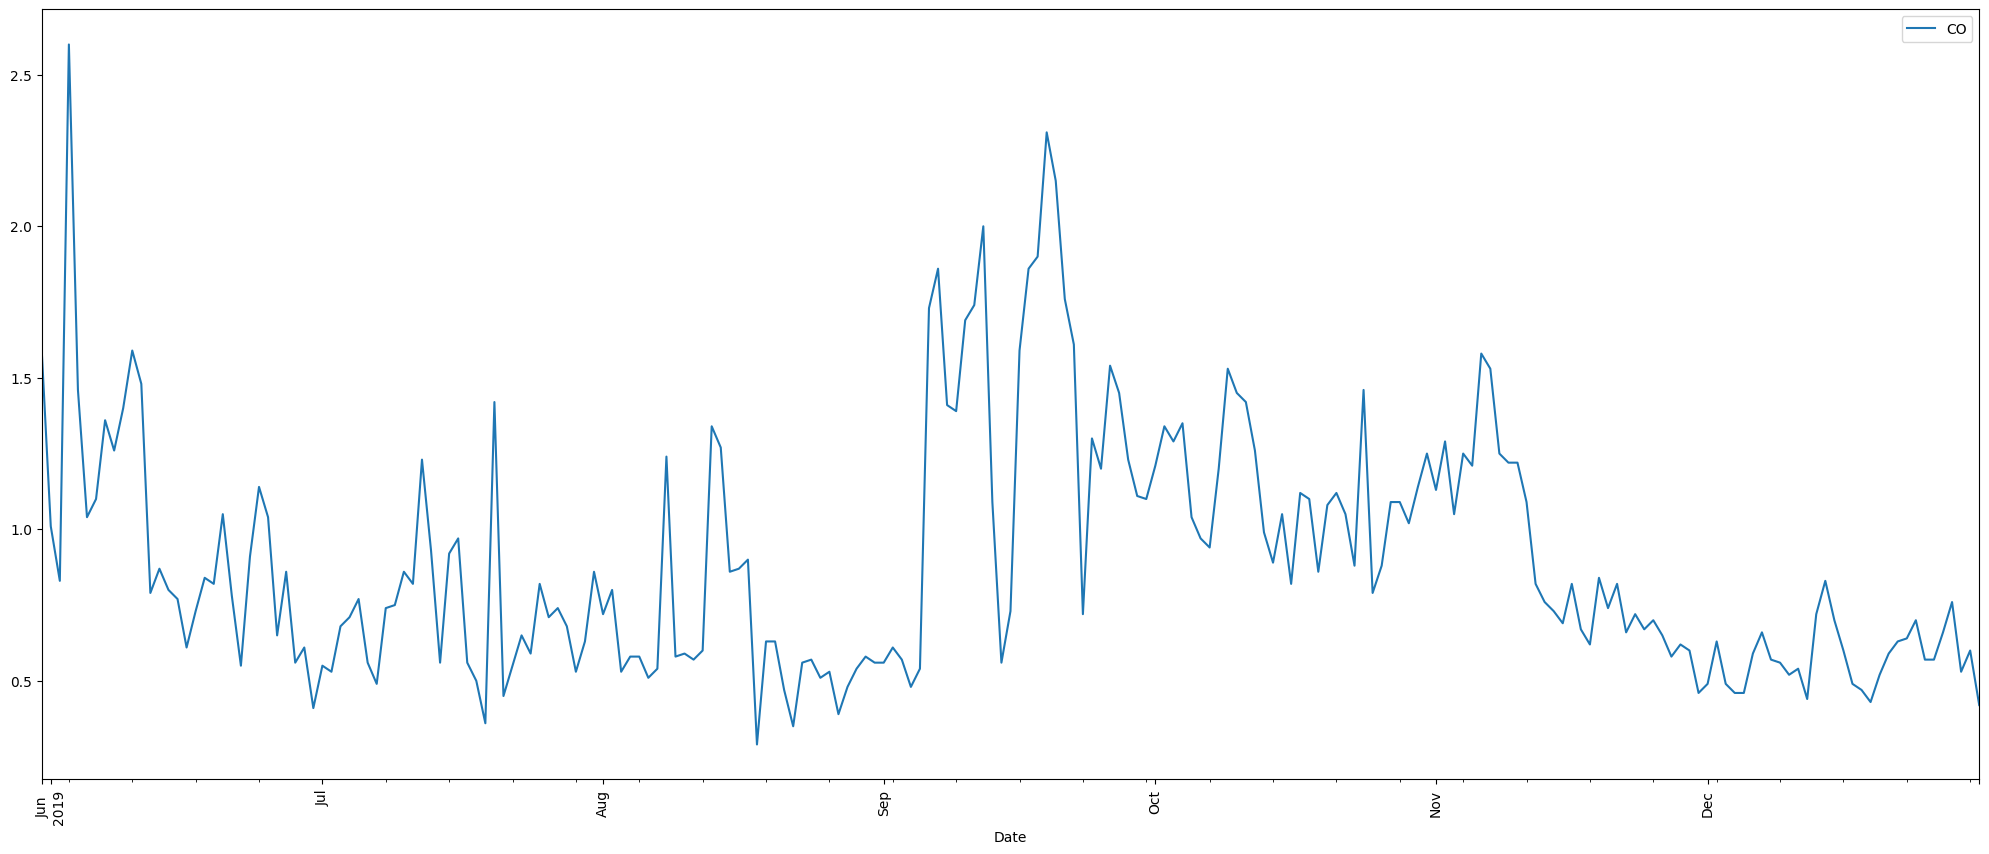

In [105]:
count = 0
for i in range(len(chennai_2019)):
    if (CO(chennai_2019["CO"][i]) == chennai_2019["AQI"][i]):
        count = count+1
percent = (count/len(chennai_2019))*100

print ("The highest value of CO in the "+str(len(chennai_2019))+
       " days time period was ",chennai_2019["CO"].loc[chennai_2019['CO'].idxmax()],
       " recorded on", str(chennai_2019["Date"].loc[chennai_2019['CO'].idxmax()])[:10],
       '\nand the lowest value was ',chennai_2019["CO"].loc[chennai_2019['CO'].idxmin()], 
       " recorded on",str(chennai_2019["Date"].loc[chennai_2019['CO'].idxmin()])[:10],
       "\nThe average CO value was ",str(round(chennai_2019["CO"].mean(),2)),
       "\nCO value had a standard deviation of ",str(round(chennai_2019["CO"].std(),2)))


a = chennai_2019.plot(x='Date',y='CO',figsize=(25, 10))
plt.xticks(rotation='vertical')
plt.show()

##### CO 2020

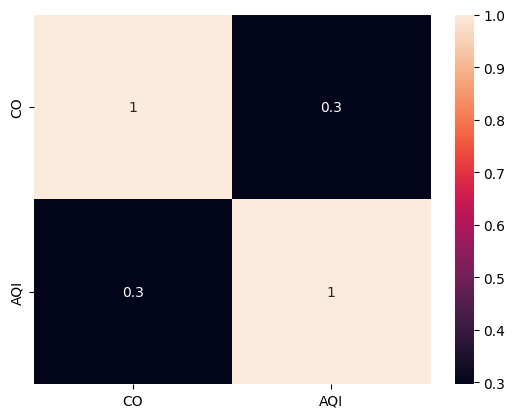

In [106]:
dataplot = sb.heatmap(chennai_2020[['CO','AQI']].corr(), annot=True)
plt.show()

The highest value of CO in the 366 days time period was  1.25  recorded on 2020-12-15 
and the lowest value was  0.13  recorded on 2020-10-13 
The average CO value was  0.5 
CO value had a standard deviation of  0.19 
In 2020 the number of days CO was responsible for the AQI value was:- 0 which is around 0.0%


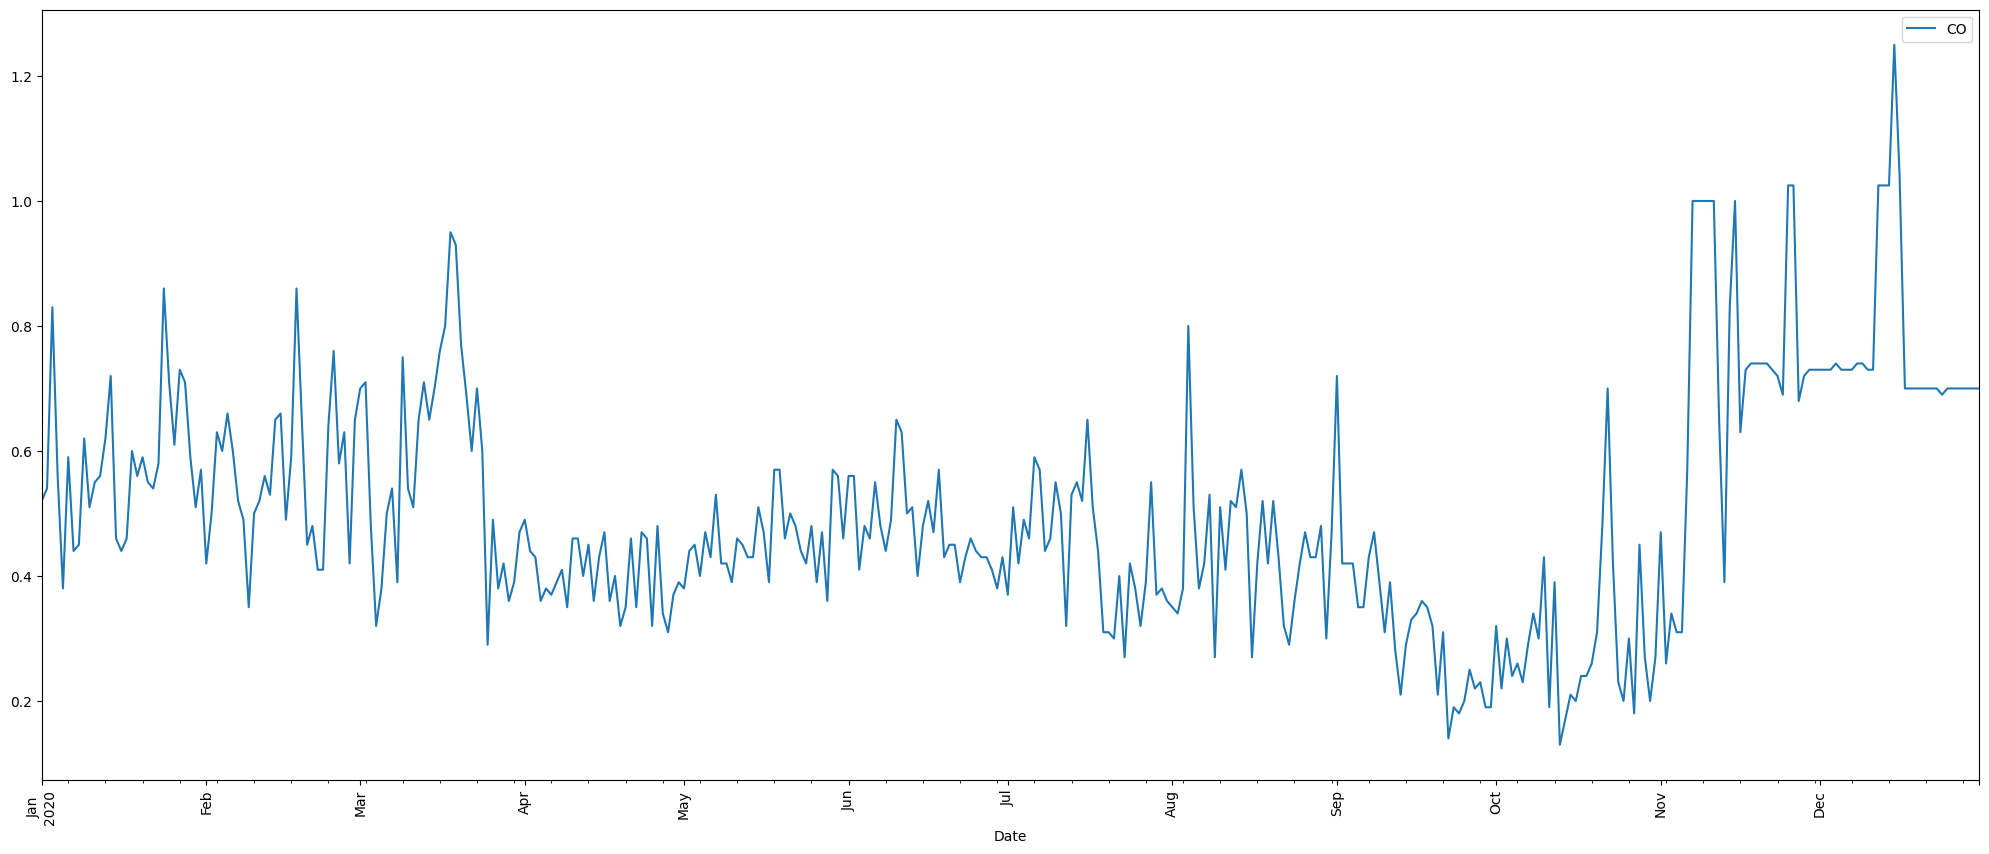

In [107]:
count = 0
for i in range(len(chennai_2020)):
    if (CO(chennai_2020["CO"][i]) == chennai_2020["AQI"][i]):
        count = count+1
percent = (count/len(chennai_2020))*100

print ("The highest value of CO in the "+str(len(chennai_2020))+
       " days time period was ",chennai_2020["CO"].loc[chennai_2020['CO'].idxmax()],
       " recorded on", str(chennai_2020["Date"].loc[chennai_2020['CO'].idxmax()])[:10],
       '\nand the lowest value was ',chennai_2020["CO"].loc[chennai_2020['CO'].idxmin()], 
       " recorded on",str(chennai_2020["Date"].loc[chennai_2020['CO'].idxmin()])[:10],
       "\nThe average CO value was ",str(round(chennai_2020["CO"].mean(),2)),
       "\nCO value had a standard deviation of ",str(round(chennai_2020["CO"].std(),2)))


a = chennai_2020.plot(x='Date',y='CO',figsize=(25, 10))
plt.xticks(rotation='vertical')
plt.show()

##### CO 2021

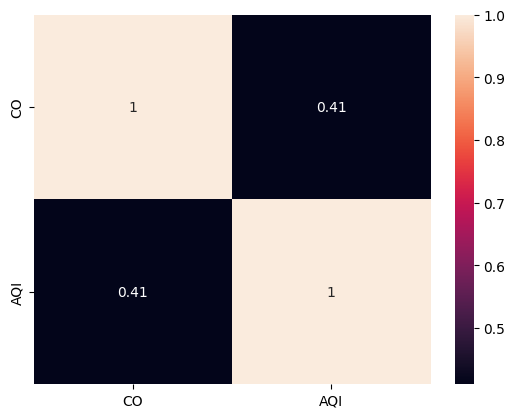

In [108]:
dataplot = sb.heatmap(chennai_2021[['CO','AQI']].corr(), annot=True)
plt.show()

The highest value of CO in the 365 days time period was  1.48  recorded on 2021-12-31 
and the lowest value was  0.4  recorded on 2021-11-18 
The average CO value was  0.72 
CO value had a standard deviation of  0.11 
In 2021 the number of days CO was responsible for the AQI value was:- 0 which is around 0.0%


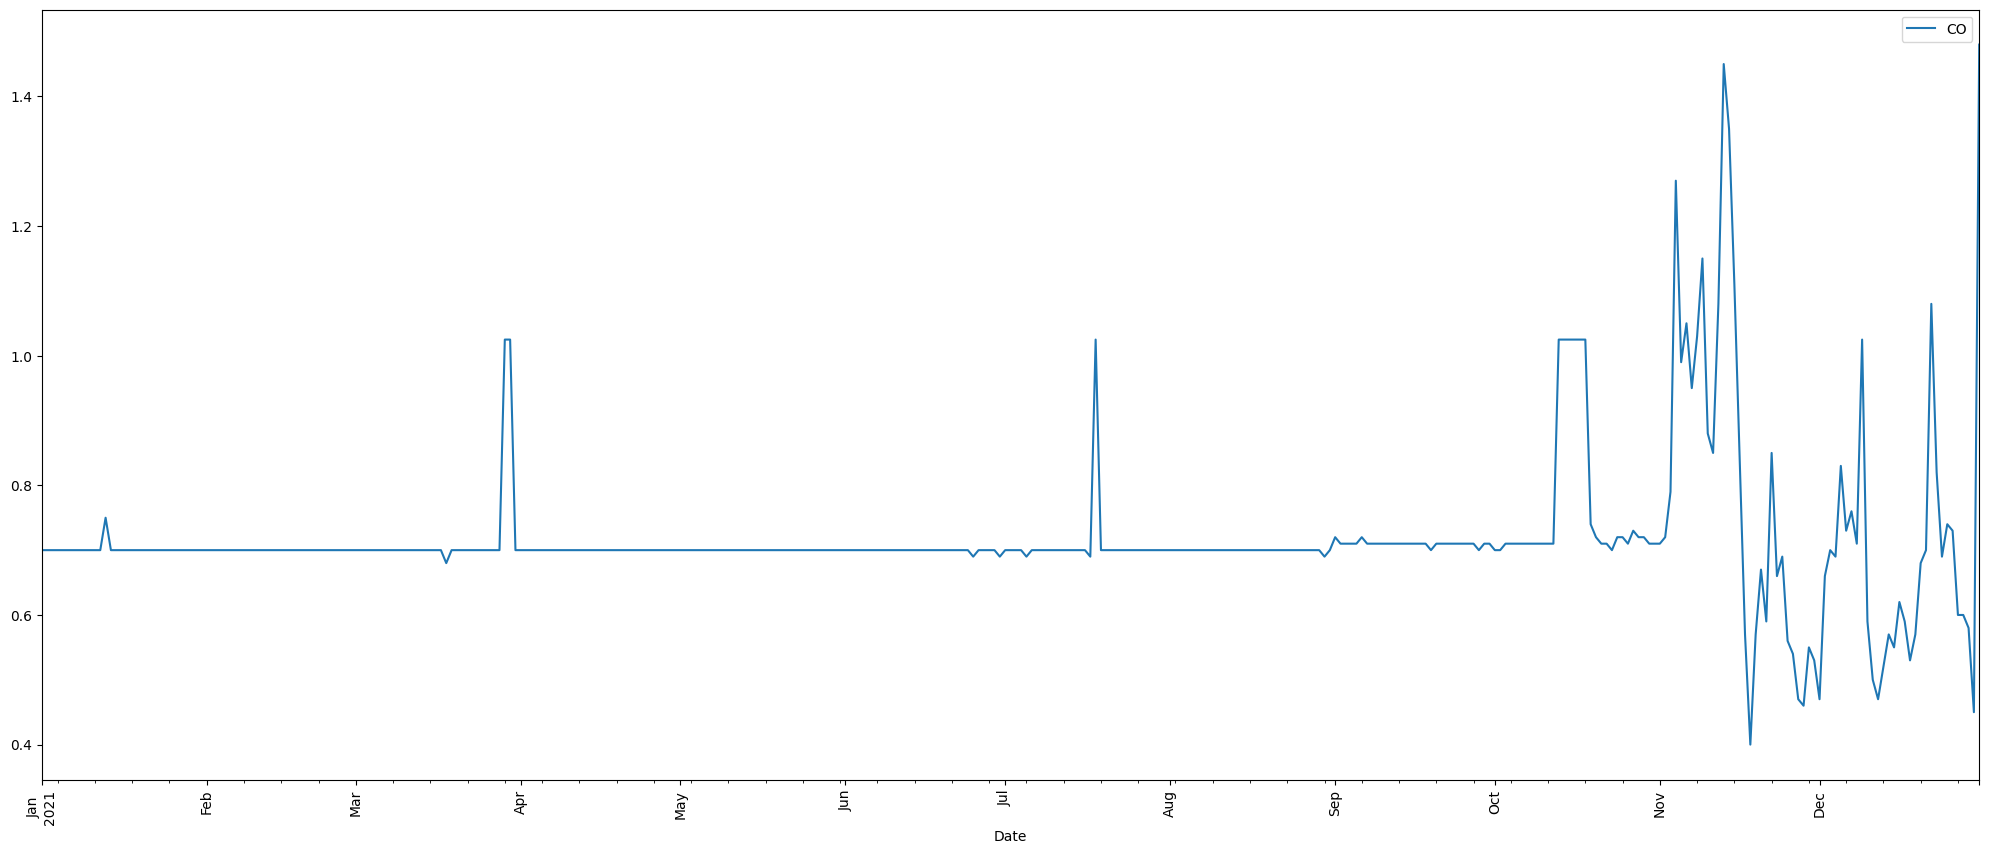

In [109]:
count = 0
for i in range(len(chennai_2021)):
    if (CO(chennai_2021["CO"][i]) == chennai_2021["AQI"][i]):
        count = count+1
percent = (count/len(chennai_2021))*100

print ("The highest value of CO in the "+str(len(chennai_2021))+
       " days time period was ",chennai_2021["CO"].loc[chennai_2021['CO'].idxmax()],
       " recorded on", str(chennai_2021["Date"].loc[chennai_2021['CO'].idxmax()])[:10],
       '\nand the lowest value was ',chennai_2021["CO"].loc[chennai_2021['CO'].idxmin()], 
       " recorded on",str(chennai_2021["Date"].loc[chennai_2021['CO'].idxmin()])[:10],
       "\nThe average CO value was ",str(round(chennai_2021["CO"].mean(),2)),
       "\nCO value had a standard deviation of ",str(round(chennai_2021["CO"].std(),2)))


a = chennai_2021.plot(x='Date',y='CO',figsize=(25, 10))
plt.xticks(rotation='vertical')
plt.show()

##### CO 2022

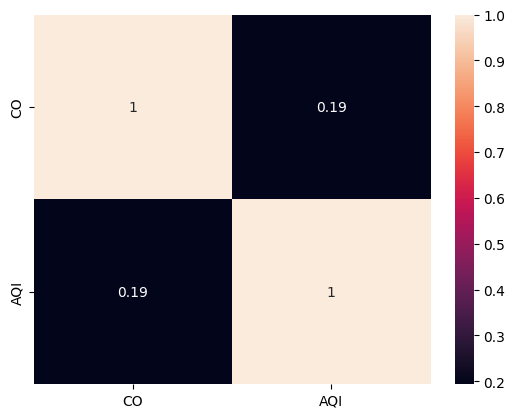

In [110]:
dataplot = sb.heatmap(chennai_2022[['CO','AQI']].corr(), annot=True)
plt.show()

The highest value of CO in the 365 days time period was  4.3  recorded on 2022-10-27 
and the lowest value was  0.66  recorded on 2022-04-12 
The average CO value was  1.44 
CO value had a standard deviation of  0.65 
In 2022 the number of days CO was responsible for the AQI value was:- 0 which is around 0.0%


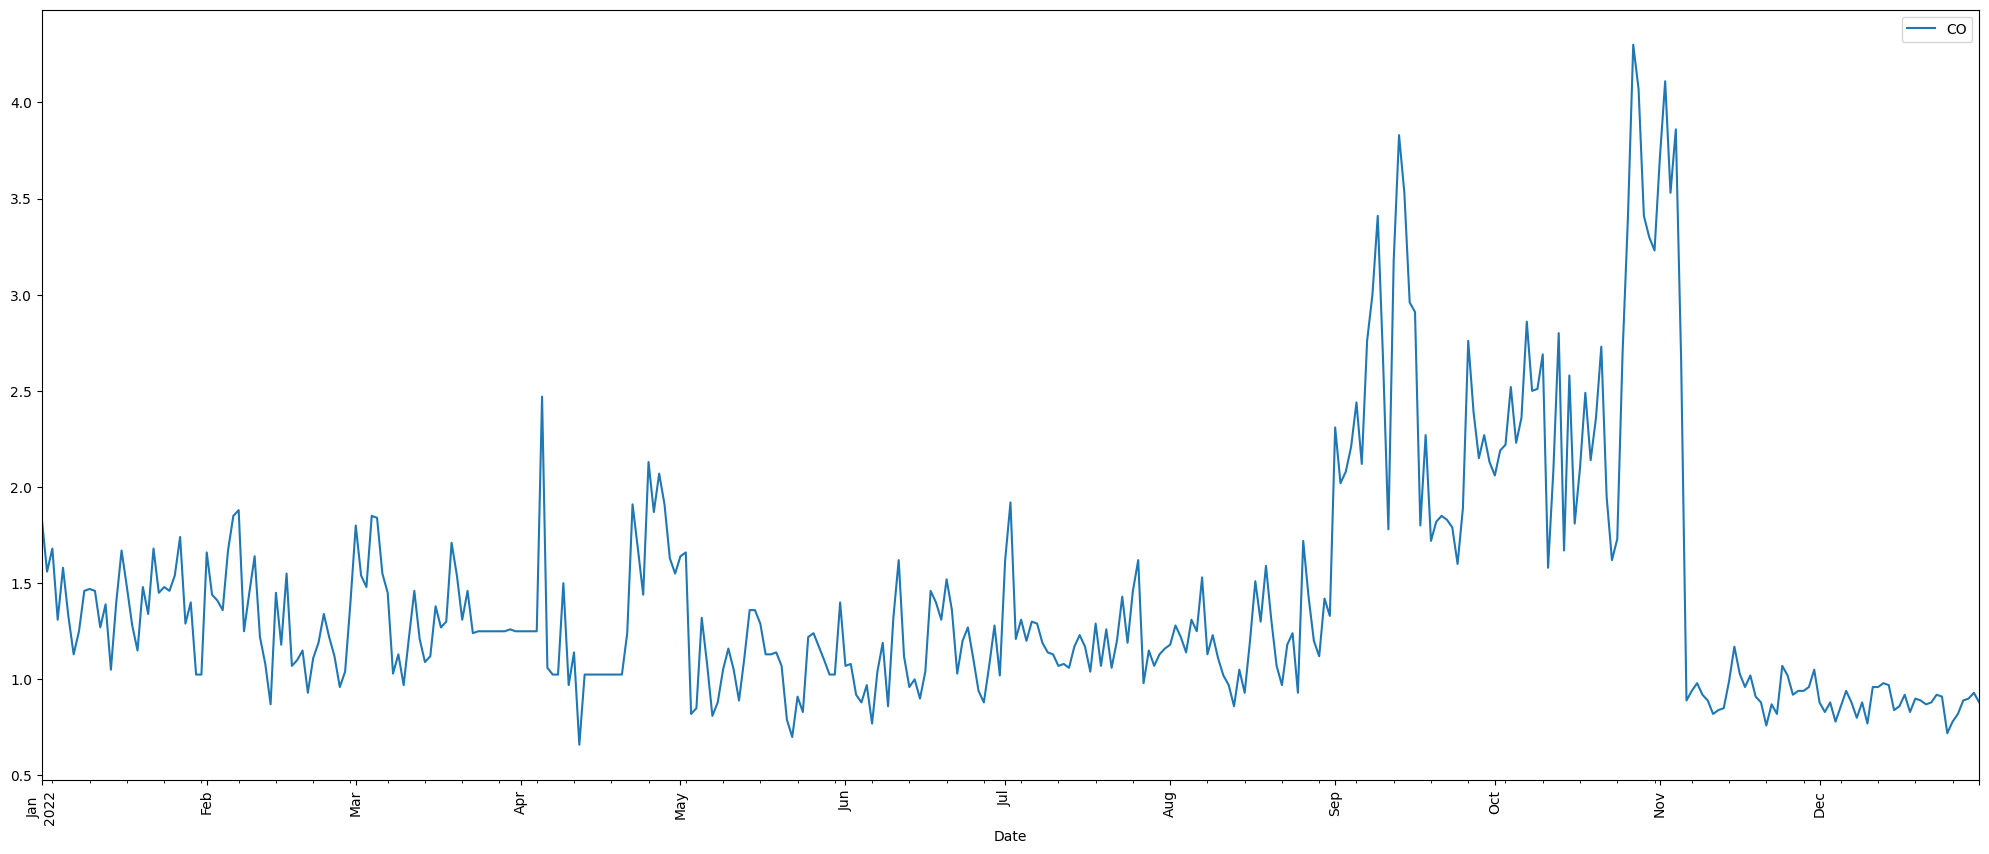

In [111]:
count = 0
for i in range(len(chennai_2022)):
    if (CO(chennai_2022["CO"][i]) == chennai_2022["AQI"][i]):
        count = count+1
percent = (count/len(chennai_2022))*100

print ("The highest value of CO in the "+str(len(chennai_2022))+
       " days time period was ",chennai_2022["CO"].loc[chennai_2022['CO'].idxmax()],
       " recorded on", str(chennai_2022["Date"].loc[chennai_2022['CO'].idxmax()])[:10],
       '\nand the lowest value was ',chennai_2022["CO"].loc[chennai_2022['CO'].idxmin()], 
       " recorded on",str(chennai_2022["Date"].loc[chennai_2022['CO'].idxmin()])[:10],
       "\nThe average CO value was ",str(round(chennai_2022["CO"].mean(),2)),
       "\nCO value had a standard deviation of ",str(round(chennai_2022["CO"].std(),2)))


a = chennai_2022.plot(x='Date',y='CO',figsize=(25, 10))
plt.xticks(rotation='vertical')
plt.show()

### Ozone (O3)

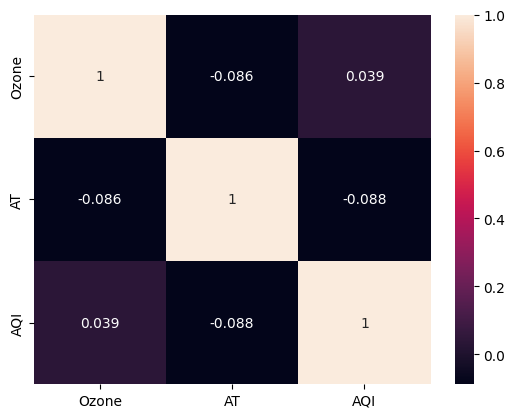

In [112]:
dataplot = sb.heatmap(chennai[['Ozone','AT','AQI']].corr(), annot=True)
plt.show()

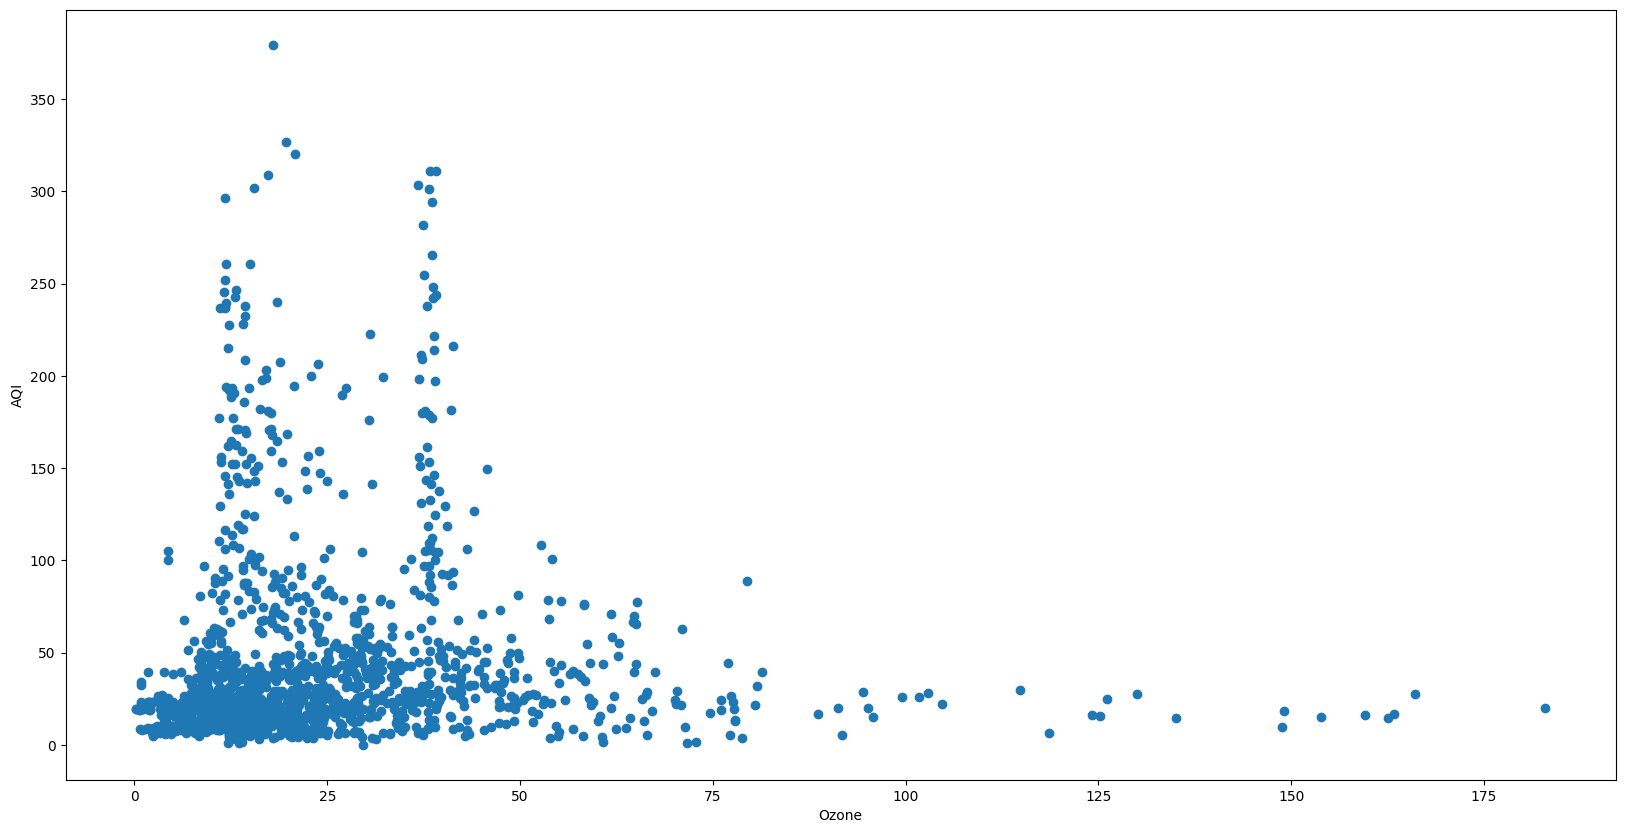

In [113]:
plt.figure(figsize=(20,10))
plt.scatter(x=chennai['Ozone'],y=chennai['AQI'])
plt.xlabel("Ozone")
plt.ylabel("AQI")
plt.show()

The highest value of Ozone in the 1637 days time period was  182.94  recorded on 2022-02-21 
and the lowest value was  0.21  recorded on 2021-09-01 
The average Ozone value was  23.54 
Ozone value had a standard deviation of  19.79 .
The number of days Ozone was responsible for the AQI value was:- 0 which is around 0.0%


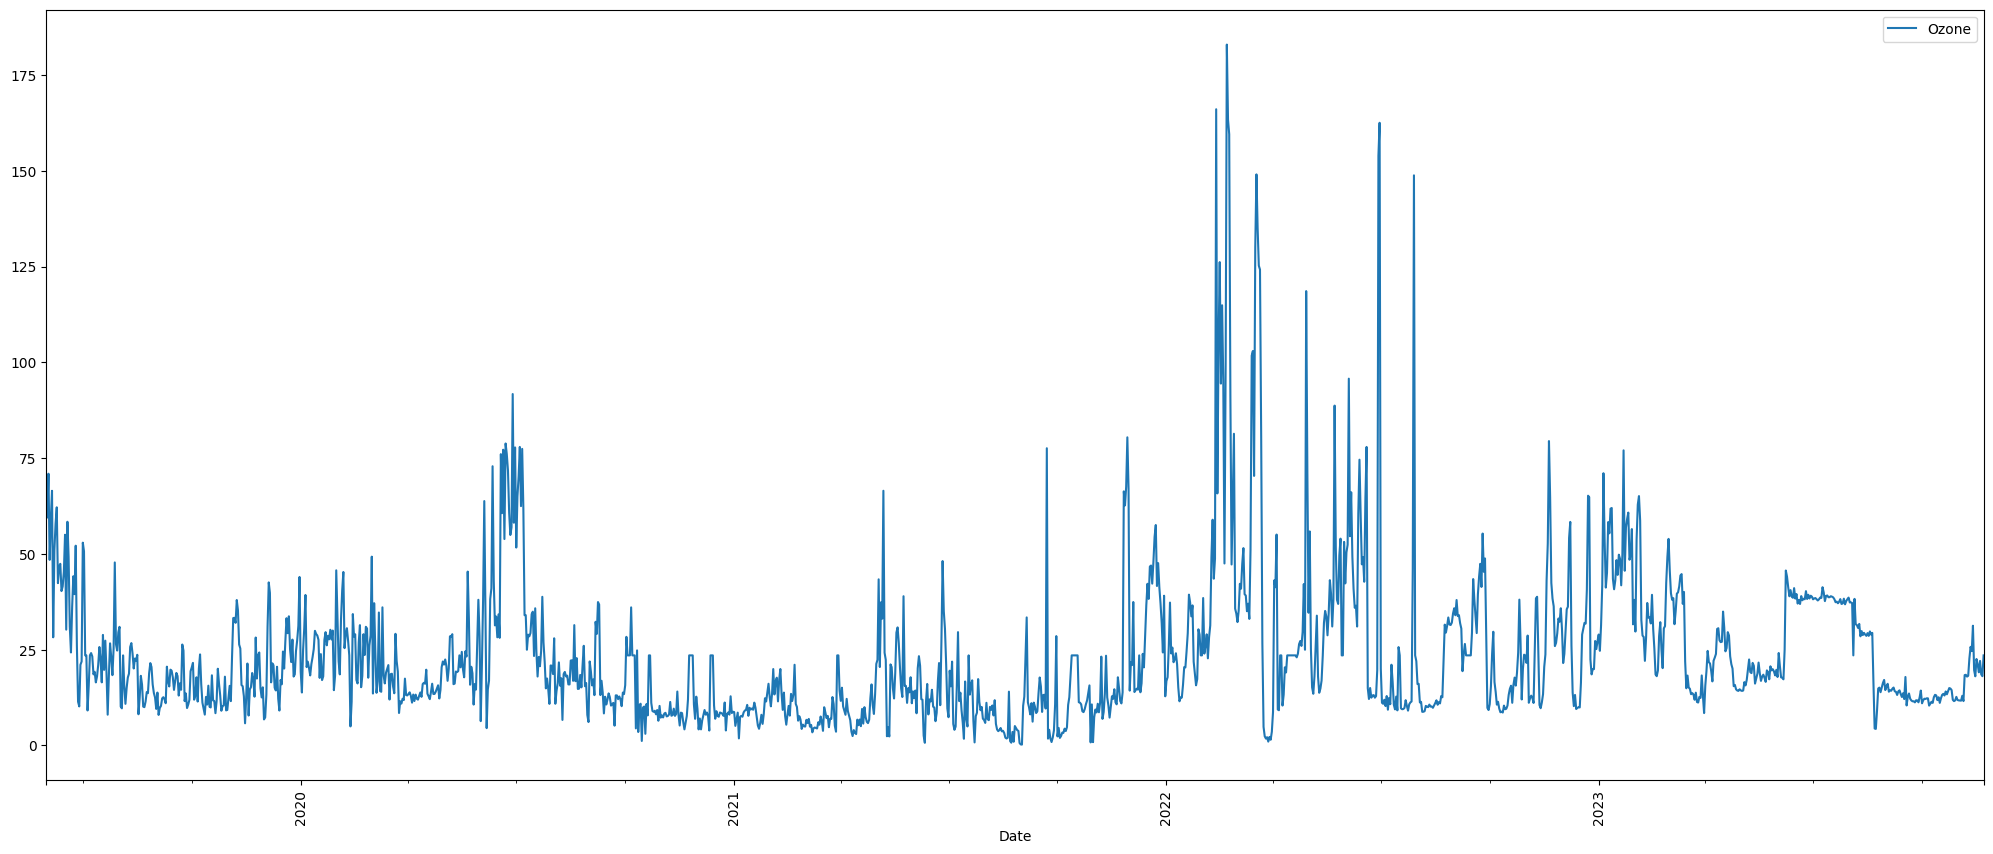

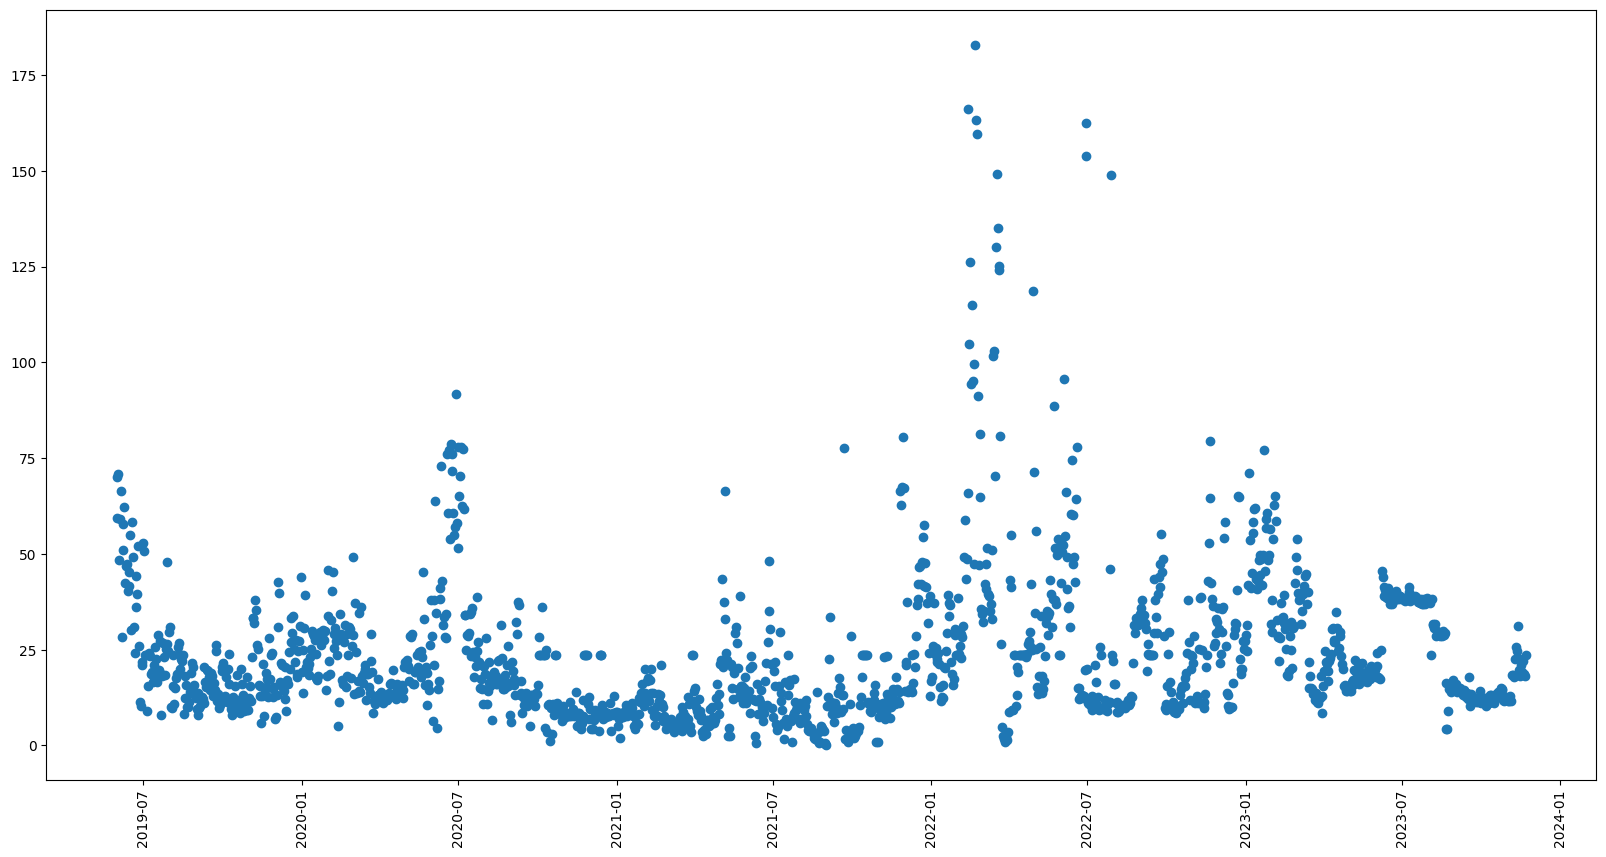

In [114]:
count = 0
for i in range(len(chennai)):
    if (Ozone(chennai["Ozone"][i]) == chennai["AQI"][i]):
        count = count+1
percent = (count/len(chennai))*100
print ("The highest value of Ozone in the "+str(len(chennai))+
       " days time period was ",chennai["Ozone"].loc[chennai['Ozone'].idxmax()],
       " recorded on", str(chennai["Date"].loc[chennai['Ozone'].idxmax()])[:10],
       '\nand the lowest value was ',chennai["Ozone"].loc[chennai['Ozone'].idxmin()], 
       " recorded on",str(chennai["Date"].loc[chennai['Ozone'].idxmin()])[:10],
       "\nThe average Ozone value was ",str(round(chennai["Ozone"].mean(),2)),
       "\nOzone value had a standard deviation of ",str(round(chennai["Ozone"].std(),2)))


a = chennai.plot(x='Date',y='Ozone',figsize=(25, 10))
plt.xticks(rotation='vertical')
plt.show()

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.plot_date(chennai['Date'],chennai['Ozone'])
plt.xticks(rotation='vertical')
plt.show()

##### Ozone 2019

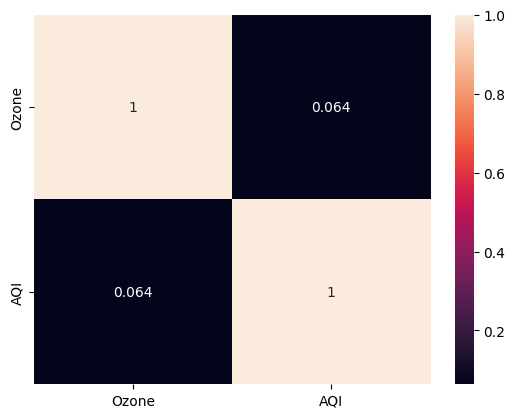

In [115]:
dataplot = sb.heatmap(chennai_2019[['Ozone','AQI']].corr(), annot=True)
plt.show()

The highest value of Ozone in the 215 days time period was  70.92  recorded on 2019-06-02 
and the lowest value was  5.77  recorded on 2019-11-15 
The average Ozone value was  22.33 
Ozone value had a standard deviation of  13.19 
In 2019 the number of days Ozone was responsible for the AQI value was:- 0 which is around 0.0%


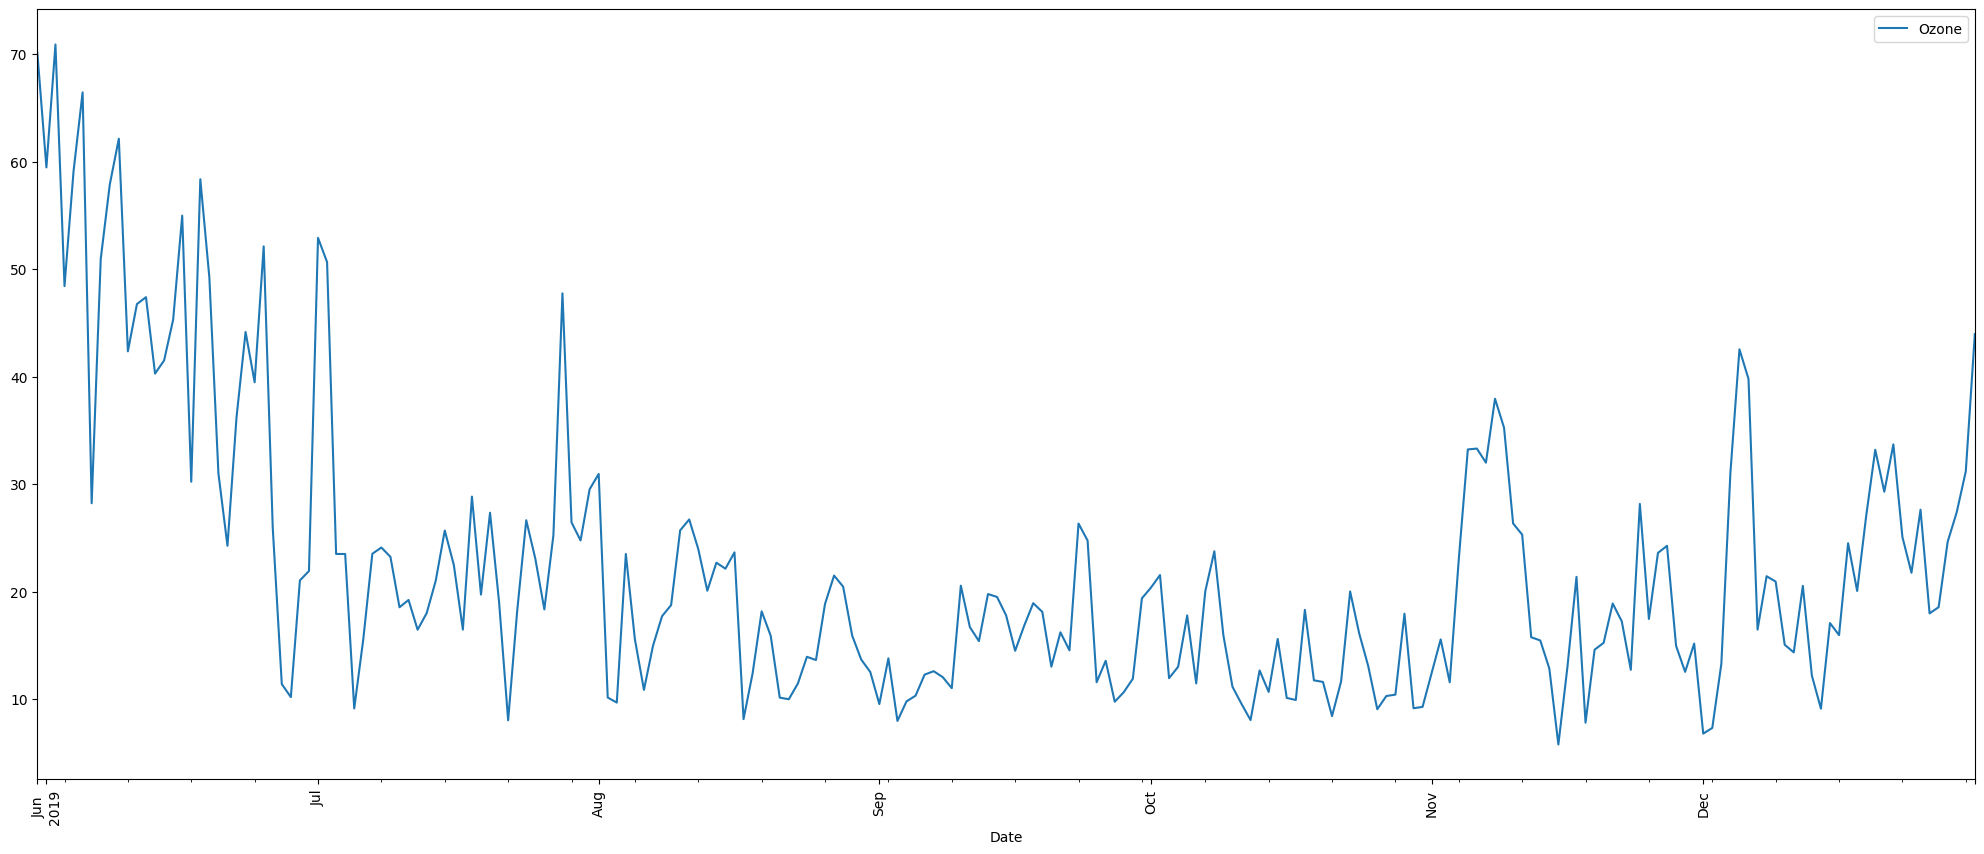

In [116]:
count = 0
for i in range(len(chennai_2019)):
    if (Ozone(chennai_2019["Ozone"][i]) == chennai_2019["AQI"][i]):
        count = count+1
percent = (count/len(chennai_2019))*100

print ("The highest value of Ozone in the "+str(len(chennai_2019))+
       " days time period was ",chennai_2019["Ozone"].loc[chennai_2019['Ozone'].idxmax()],
       " recorded on", str(chennai_2019["Date"].loc[chennai_2019['Ozone'].idxmax()])[:10],
       '\nand the lowest value was ',chennai_2019["Ozone"].loc[chennai_2019['Ozone'].idxmin()], 
       " recorded on",str(chennai_2019["Date"].loc[chennai_2019['Ozone'].idxmin()])[:10],
       "\nThe average Ozone value was ",str(round(chennai_2019["Ozone"].mean(),2)),
       "\nOzone value had a standard deviation of ",str(round(chennai_2019["Ozone"].std(),2)))


a = chennai_2019.plot(x='Date',y='Ozone',figsize=(25, 10))
plt.xticks(rotation='vertical')
plt.show()

##### Ozone 2020

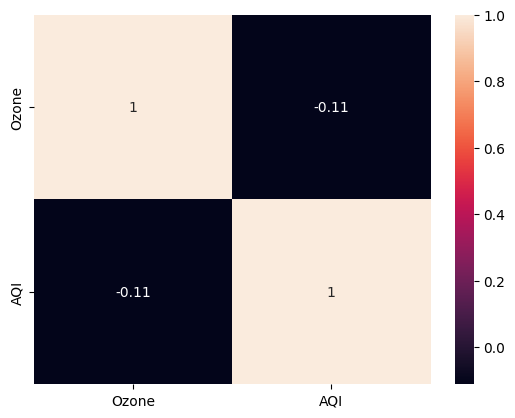

In [117]:
dataplot = sb.heatmap(chennai_2020[['Ozone','AQI']].corr(), annot=True)
plt.show()

The highest value of Ozone in the 366 days time period was  91.72  recorded on 2020-06-28 
and the lowest value was  1.16  recorded on 2020-10-15 
The average Ozone value was  21.39 
Ozone value had a standard deviation of  15.06 
In 2020 the number of days Ozone was responsible for the AQI value was:- 0 which is around 0.0%


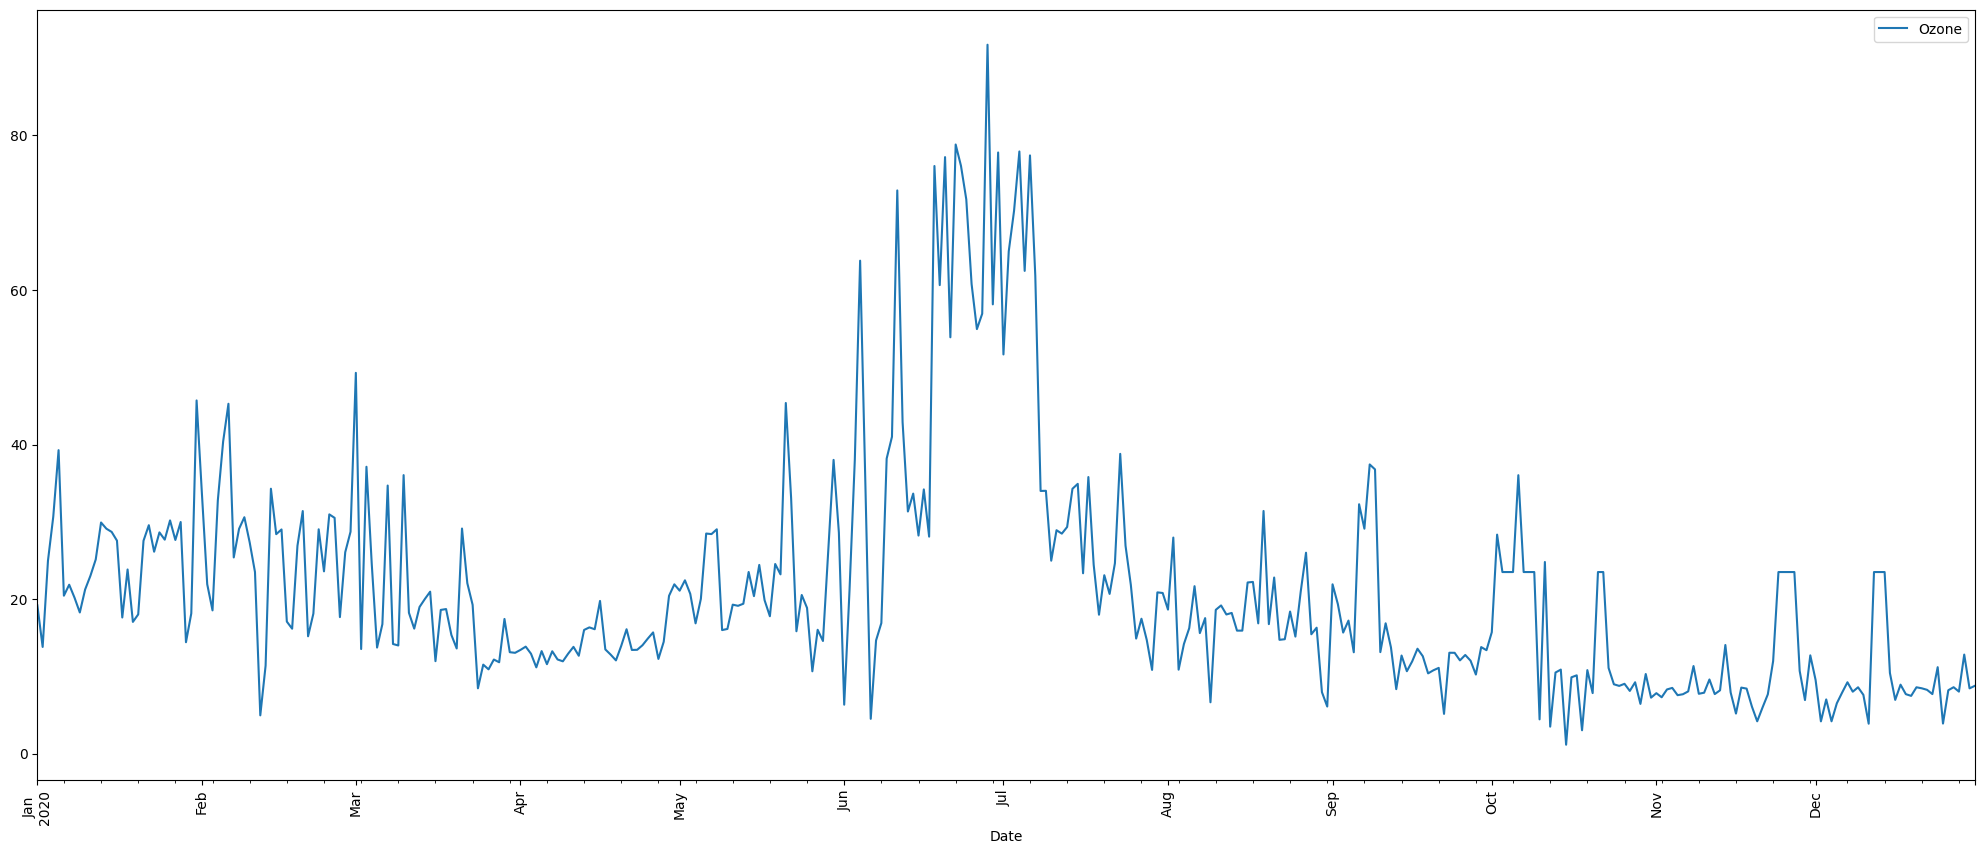

In [118]:
count = 0
for i in range(len(chennai_2020)):
    if (Ozone(chennai_2020["Ozone"][i]) == chennai_2020["AQI"][i]):
        count = count+1
percent = (count/len(chennai_2020))*100

print ("The highest value of Ozone in the "+str(len(chennai_2020))+
       " days time period was ",chennai_2020["Ozone"].loc[chennai_2020['Ozone'].idxmax()],
       " recorded on", str(chennai_2020["Date"].loc[chennai_2020['Ozone'].idxmax()])[:10],
       '\nand the lowest value was ',chennai_2020["Ozone"].loc[chennai_2020['Ozone'].idxmin()], 
       " recorded on",str(chennai_2020["Date"].loc[chennai_2020['Ozone'].idxmin()])[:10],
       "\nThe average Ozone value was ",str(round(chennai_2020["Ozone"].mean(),2)),
       "\nOzone value had a standard deviation of ",str(round(chennai_2020["Ozone"].std(),2)))


a = chennai_2020.plot(x='Date',y='Ozone',figsize=(25, 10))
plt.xticks(rotation='vertical')
plt.show()

##### Ozone 2021

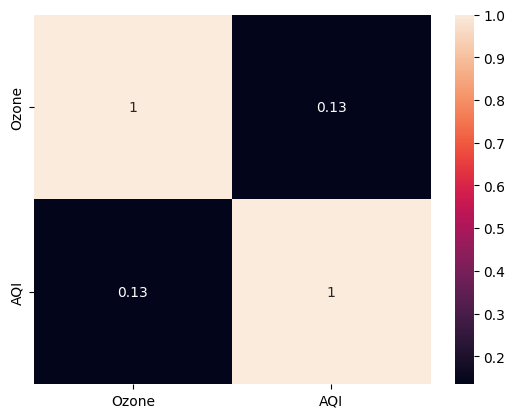

In [119]:
dataplot = sb.heatmap(chennai_2021[['Ozone','AQI']].corr(), annot=True)
plt.show()

The highest value of Ozone in the 365 days time period was  80.42  recorded on 2021-11-29 
and the lowest value was  0.21  recorded on 2021-09-01 
The average Ozone value was  13.83 
Ozone value had a standard deviation of  12.62 
In 2021 the number of days Ozone was responsible for the AQI value was:- 0 which is around 0.0%


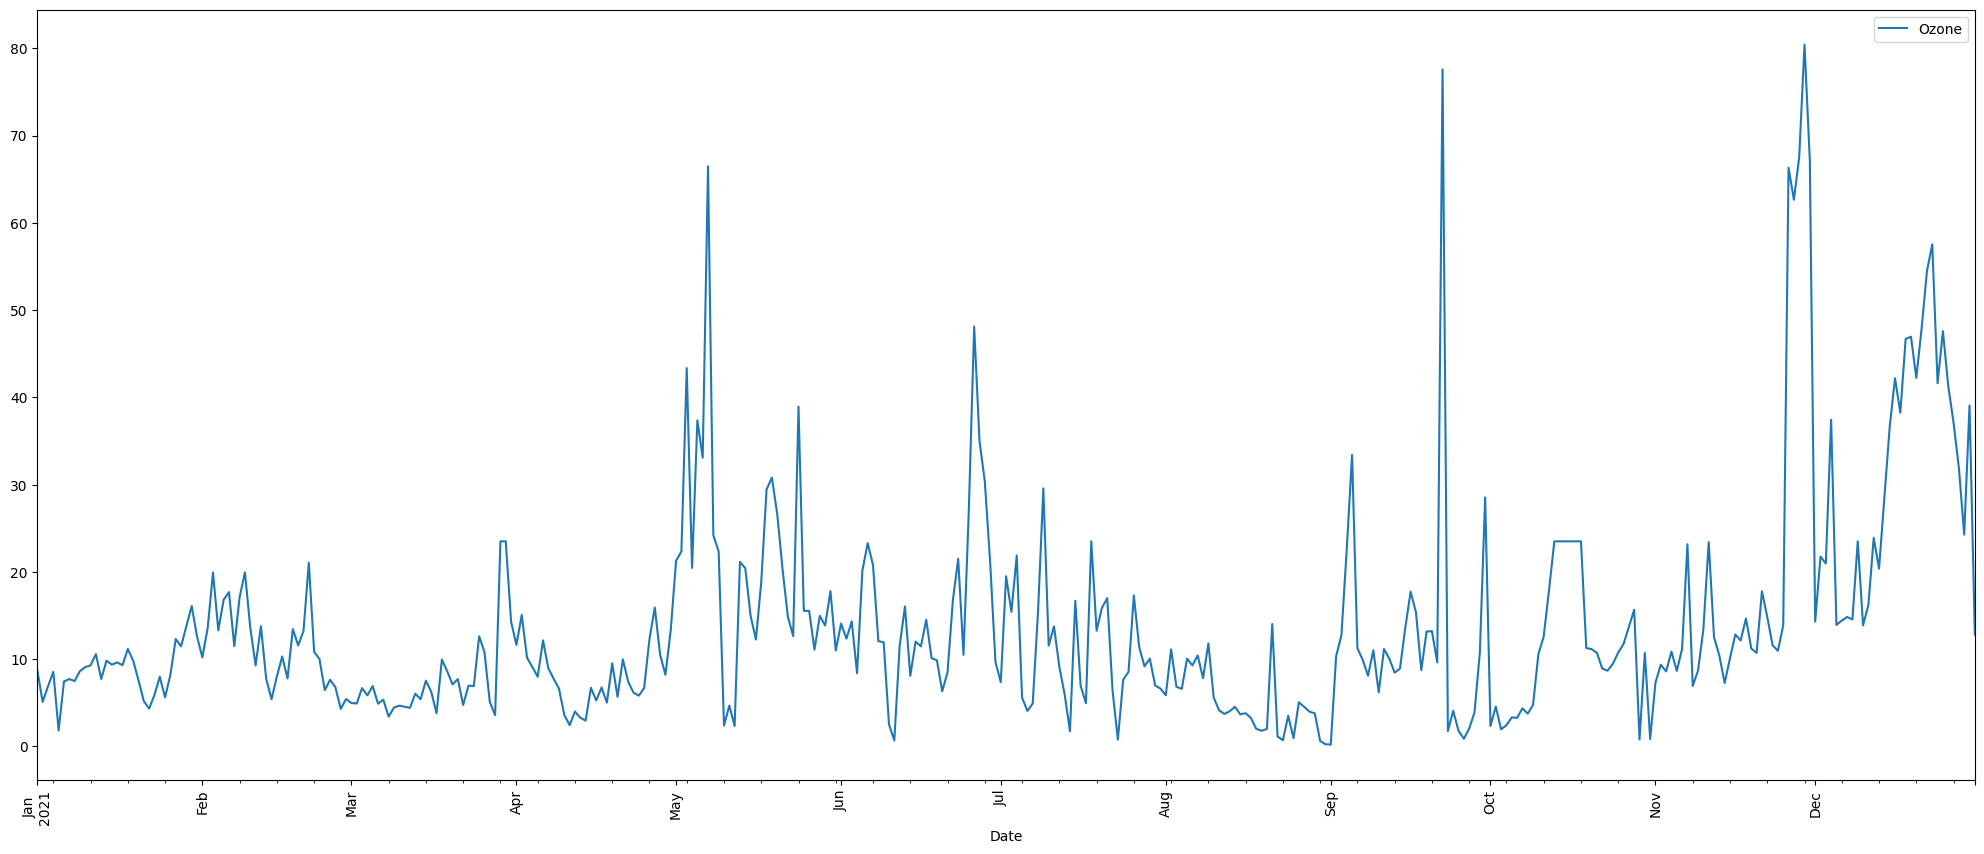

In [120]:
count = 0
for i in range(len(chennai_2021)):
    if (Ozone(chennai_2021["Ozone"][i]) == chennai_2021["AQI"][i]):
        count = count+1
percent = (count/len(chennai_2021))*100

print ("The highest value of Ozone in the "+str(len(chennai_2021))+
       " days time period was ",chennai_2021["Ozone"].loc[chennai_2021['Ozone'].idxmax()],
       " recorded on", str(chennai_2021["Date"].loc[chennai_2021['Ozone'].idxmax()])[:10],
       '\nand the lowest value was ',chennai_2021["Ozone"].loc[chennai_2021['Ozone'].idxmin()], 
       " recorded on",str(chennai_2021["Date"].loc[chennai_2021['Ozone'].idxmin()])[:10],
       "\nThe average Ozone value was ",str(round(chennai_2021["Ozone"].mean(),2)),
       "\nOzone value had a standard deviation of ",str(round(chennai_2021["Ozone"].std(),2)))


a = chennai_2021.plot(x='Date',y='Ozone',figsize=(25, 10))
plt.xticks(rotation='vertical')
plt.show()

##### Ozone 2022

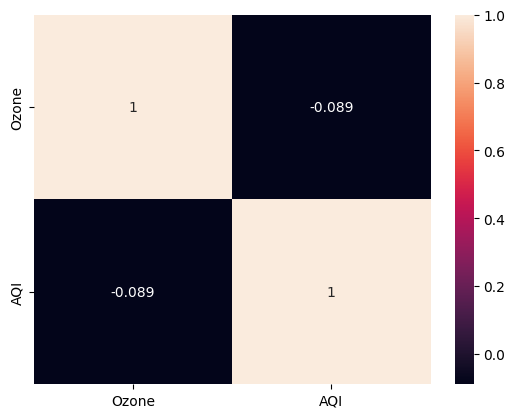

In [121]:
dataplot = sb.heatmap(chennai_2022[['Ozone','AQI']].corr(), annot=True)
plt.show()

The highest value of Ozone in the 365 days time period was  182.94  recorded on 2022-02-21 
and the lowest value was  0.99  recorded on 2022-03-28 
The average Ozone value was  33.27 
Ozone value had a standard deviation of  30.05 
In 2022 the number of days Ozone was responsible for the AQI value was:- 0 which is around 0.0%


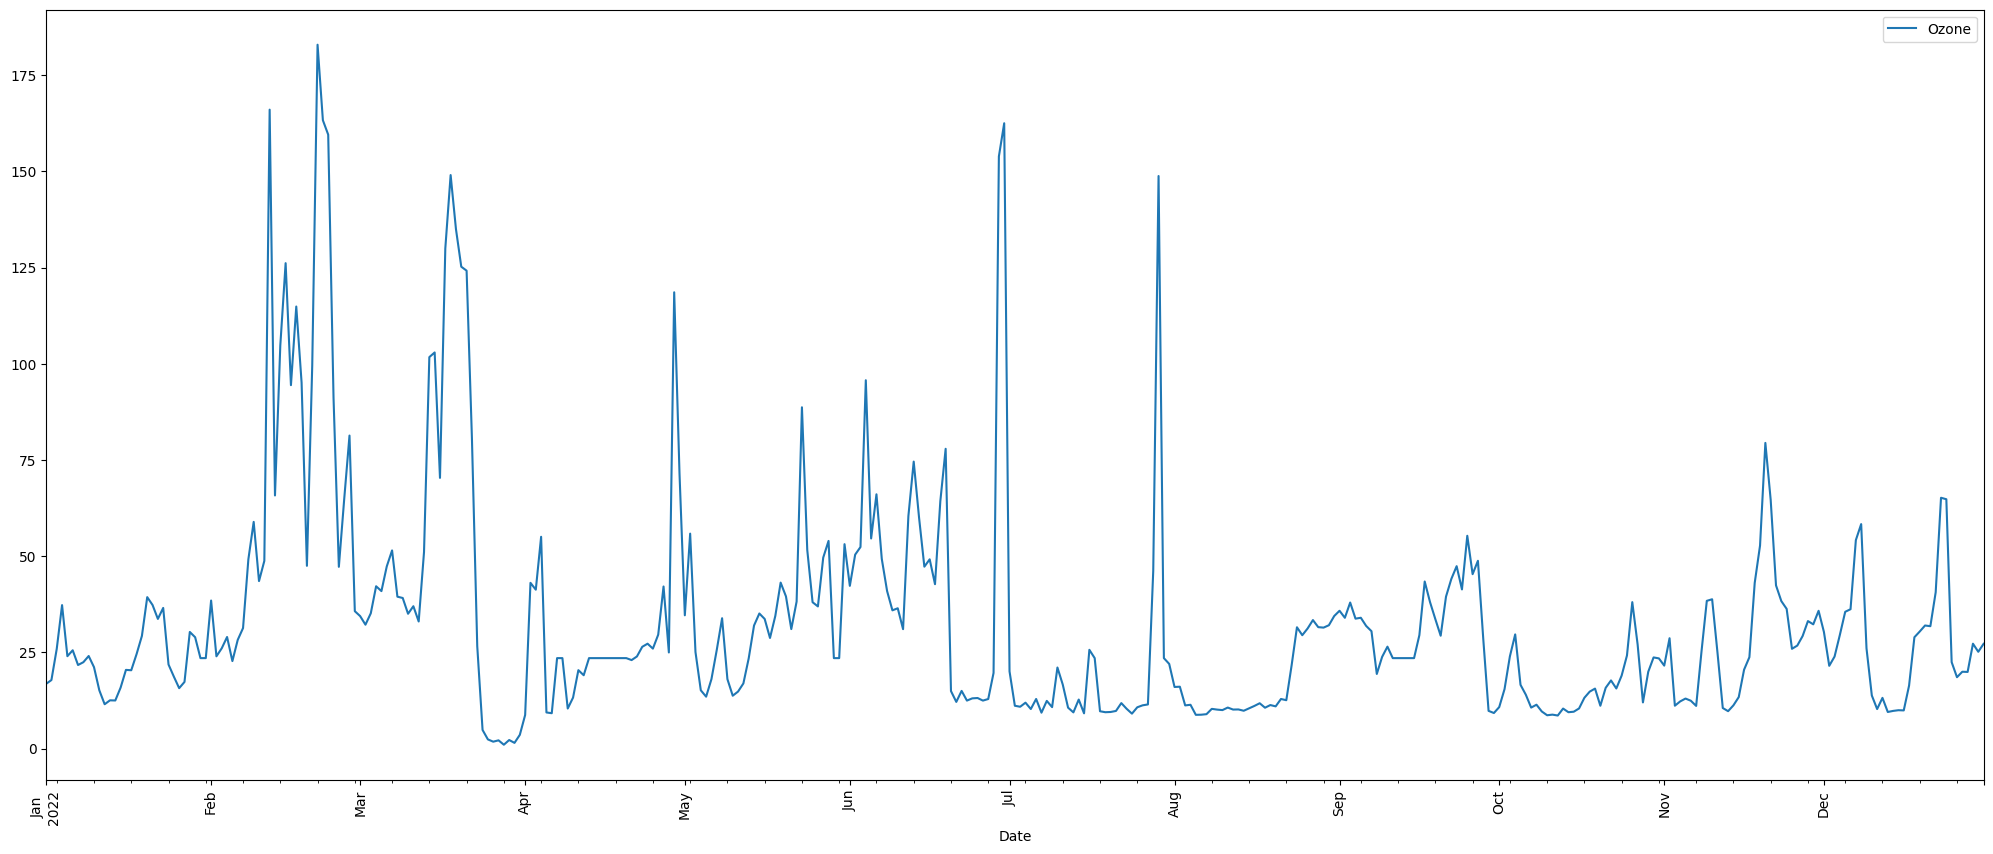

In [122]:
count = 0
for i in range(len(chennai_2022)):
    if (Ozone(chennai_2022["Ozone"][i]) == chennai_2022["AQI"][i]):
        count = count+1
percent = (count/len(chennai_2022))*100

print ("The highest value of Ozone in the "+str(len(chennai_2022))+
       " days time period was ",chennai_2022["Ozone"].loc[chennai_2022['Ozone'].idxmax()],
       " recorded on", str(chennai_2022["Date"].loc[chennai_2022['Ozone'].idxmax()])[:10],
       '\nand the lowest value was ',chennai_2022["Ozone"].loc[chennai_2022['Ozone'].idxmin()], 
       " recorded on",str(chennai_2022["Date"].loc[chennai_2022['Ozone'].idxmin()])[:10],
       "\nThe average Ozone value was ",str(round(chennai_2022["Ozone"].mean(),2)),
       "\nOzone value had a standard deviation of ",str(round(chennai_2022["Ozone"].std(),2)))


a = chennai_2022.plot(x='Date',y='Ozone',figsize=(25, 10))
plt.xticks(rotation='vertical')
plt.show()